# Data Description

In [1]:
import pandas as pd
import scipy.stats
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
start_time = dt.datetime.now()
print('LOAD DURATION: ', dt.datetime.now() - start_time)

LOAD DURATION:  0:00:00.000038


In [2]:
%%time
data = pd.read_csv('NY property data.csv')

CPU times: user 3.2 s, sys: 883 ms, total: 4.08 s
Wall time: 5.56 s


In [3]:
data.dropna(how='all', axis=1, inplace=True) # drop any empty columns
print('data.shape=',data.shape)
print(data.info())
data.head().transpose()

data.shape= (1070994, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070994 entries, 0 to 1070993
Data columns (total 32 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   RECORD    1070994 non-null  int64  
 1   BBLE      1070994 non-null  object 
 2   BORO      1070994 non-null  int64  
 3   BLOCK     1070994 non-null  int64  
 4   LOT       1070994 non-null  int64  
 5   EASEMENT  4636 non-null     object 
 6   OWNER     1039249 non-null  object 
 7   BLDGCL    1070994 non-null  object 
 8   TAXCLASS  1070994 non-null  object 
 9   LTFRONT   1070994 non-null  int64  
 10  LTDEPTH   1070994 non-null  int64  
 11  EXT       354305 non-null   object 
 12  STORIES   1014730 non-null  float64
 13  FULLVAL   1070994 non-null  float64
 14  AVLAND    1070994 non-null  float64
 15  AVTOT     1070994 non-null  float64
 16  EXLAND    1070994 non-null  float64
 17  EXTOT     1070994 non-null  float64
 18  EXCD1     638488 non-null   float64


0                      1                      2  \
RECORD                        1                      2                      3   
BBLE                 1000010101             1000010201             1000020001   
BORO                          1                      1                      1   
BLOCK                         1                      1                      2   
LOT                         101                    201                      1   
EASEMENT                    NaN                    NaN                    NaN   
OWNER     U S GOVT LAND & BLDGS  U S GOVT LAND & BLDGS  DEPT OF GENERAL SERVI   
BLDGCL                       P7                     Z9                     Y7   
TAXCLASS                      4                      4                      4   
LTFRONT                     500                     27                    709   
LTDEPTH                    1046                      0                    564   
EXT                         NaN                    NaN                      E   
STORIES                     NaN                    NaN                    3.0   
FULLVAL              21400000.0            193800000.0            104686000.0   
AVLAND                4225500.0             14310000.0             39008700.0   
AVTOT                 9630000.0             87210000.0             47108700.0   
EXLAND                4225500.0             14310000.0             39008700.0   
EXTOT                 9630000.0             87210000.0             47108700.0   
EXCD1                    4600.0                 4600.0                 2191.0   
STADDR         1 LIBERTY ISLAND         1 ELLIS ISLAND        MARGINAL STREET   
ZIP                     10004.0                10004.0                10004.0   
EXMPTCL                      X3                     X3                     X1   
BLDFRONT                      0                      0                    709   
BLDDEPTH                      0                      0                    564   
AVLAND2               3775500.0             11111400.0             32321790.0   
AVTOT2                8613000.0             80690400.0             40179510.0   
EXLAND2               3775500.0             11111400.0             32321790.0   
EXTOT2                8613000.0             80690400.0             40179510.0   
EXCD2                       NaN                    NaN                    NaN   
PERIOD                    FINAL                  FINAL                  FINAL   
YEAR                    2010/11                2010/11                2010/11   
VALTYPE                   AC-TR                  AC-TR                  AC-TR   

                              3                     4  
RECORD                        4                     5  
BBLE                 1000020023            1000030001  
BORO                          1                     1  
BLOCK                         2                     3  
LOT                          23                     1  
EASEMENT                    NaN                   NaN  
OWNER     DEPARTMENT OF BUSINES  PARKS AND RECREATION  
BLDGCL                       T2                    Q1  
TAXCLASS                      4                     4  
LTFRONT                     793                   323  
LTDEPTH                     551                  1260  
EXT                         NaN                   NaN  
STORIES                     2.0                   1.0  
FULLVAL              39200000.0           272300000.0  
AVLAND               15255000.0           121050000.0  
AVTOT                17640000.0           122535000.0  
EXLAND               15255000.0           121050000.0  
EXTOT                17640000.0           122535000.0  
EXCD1                    2191.0                2231.0  
STADDR                   PIER 6          BATTERY PARK  
ZIP                     10004.0               10004.0  
EXMPTCL                      X1                    X1  
BLDFRONT                     85                    89  
BLDDEPTH    

In [4]:
data.tail().transpose()

1070989             1070990             1070991  \
RECORD               1070990             1070991             1070992   
BBLE              5080500083          5080500086          5080500089   
BORO                       5                   5                   5   
BLOCK                   8050                8050                8050   
LOT                       83                  86                  89   
EASEMENT                 NaN                 NaN                 NaN   
OWNER            TOBIN, GALE    SHERRI MILINAZZO        JOHN GERVASI   
BLDGCL                    A1                  A1                  A1   
TAXCLASS                   1                   1                   1   
LTFRONT                   60                  62                  53   
LTDEPTH                  120                 228                 273   
EXT                      NaN                 NaN                   G   
STORIES                  2.5                 2.5                 2.0   
FULLVAL             438000.0            544000.0            480000.0   
AVLAND               14536.0              9303.0             14790.0   
AVTOT                23322.0             14929.0             22975.0   
EXLAND                1620.0              1620.0             14728.0   
EXTOT                 1620.0              1620.0             14728.0   
EXCD1                 1017.0              1017.0              1015.0   
STADDR    142 BENTLEY STREET  146 BENTLEY STREET  150 BENTLEY STREET   
ZIP                  10307.0             10307.0             10307.0   
EXMPTCL                  NaN                 NaN                 NaN   
BLDFRONT                  30                  32                  24   
BLDDEPTH                  26                  26                  32   
AVLAND2                  NaN                 NaN                 NaN   
AVTOT2                   NaN                 NaN                 NaN   
EXLAND2                  NaN                 NaN                 NaN   
EXTOT2                   NaN                 NaN                 NaN   
EXCD2                    NaN                 NaN              1017.0   
PERIOD                 FINAL               FINAL               FINAL   
YEAR                 2010/11             2010/11             2010/11   
VALTYPE                AC-TR               AC-TR               AC-TR   

                     1070992             1070993  
RECORD               1070993             1070994  
BBLE              5080500092          5080500094  
BORO                       5                   5  
BLOCK                   8050                8050  
LOT                       92                  94  
EASEMENT                 NaN                 NaN  
OWNER            RITA M MOOG      EDWARD DONOHUE  
BLDGCL                    A1                  A1  
TAXCLASS                   1                   1  
LTFRONT                   52                  50  
LTDEPTH                  136                  80  
EXT                      NaN                 NaN  
STORIES                  2.0                 2.0  
FULLVAL             543000.0            473000.0  
AVLAND               12388.0             14061.0  
AVTOT                23037.0             22394.0  
EXLAND                1620.0              1620.0  
EXTOT                 1620.0              1620.0  
EXCD1                 1017.0              1017.0  
STADDR    156 BENTLEY STREET  162 BENTLEY STREET  
ZIP                  10307.0             10307.0  
EXMPTCL                  NaN                 NaN  
BLDFRONT                  32                  30  
BLDDEPTH                  21                  24  
AVLAND2                  NaN                 NaN  
AVTOT2                   NaN                 NaN  
EXLAND2                  NaN                 NaN  
EXTOT2                   NaN                 NaN  
EXCD2                    NaN                 NaN  
PERIOD                 FINAL               FINAL  
YEAR                 2010/11             2010/11  
VALTYPE     

In [5]:
data.shape

(1070994, 32)

In [6]:
# add a dummy categorical column for the case the fields all look numeric
data['dummy'] = 'temp'

In [7]:
df_stats = pd.DataFrame(data.count(),columns=['count'])
df_stats['isna'] = data.isna().sum()
df_stats['% pop'] = 1 - data.isna().sum()/len(data)
df_stats

count     isna     % pop
RECORD    1070994        0  1.000000
BBLE      1070994        0  1.000000
BORO      1070994        0  1.000000
BLOCK     1070994        0  1.000000
LOT       1070994        0  1.000000
EASEMENT     4636  1066358  0.004329
OWNER     1039249    31745  0.970359
BLDGCL    1070994        0  1.000000
TAXCLASS  1070994        0  1.000000
LTFRONT   1070994        0  1.000000
LTDEPTH   1070994        0  1.000000
EXT        354305   716689  0.330819
STORIES   1014730    56264  0.947466
FULLVAL   1070994        0  1.000000
AVLAND    1070994        0  1.000000
AVTOT     1070994        0  1.000000
EXLAND    1070994        0  1.000000
EXTOT     1070994        0  1.000000
EXCD1      638488   432506  0.596164
STADDR    1070318      676  0.999369
ZIP       1041104    29890  0.972091
EXMPTCL     15579  1055415  0.014546
BLDFRONT  1070994        0  1.000000
BLDDEPTH  1070994        0  1.000000
AVLAND2    282726   788268  0.263985
AVTOT2     282732   788262  0.263990
EXLAND2     87449   983545  0.081652
EXTOT2     130828   940166  0.122156
EXCD2       92948   978046  0.086787
PERIOD    1070994        0  1.000000
YEAR      1070994        0  1.000000
VALTYPE   1070994        0  1.000000
dummy     1070994        0  1.000000

In [8]:
data.describe(include = 'all').transpose()

count   unique                    top     freq           mean  \
RECORD    1070994.0      NaN                    NaN      NaN       535497.5   
BBLE        1070994  1070994             5080500094        1            NaN   
BORO      1070994.0      NaN                    NaN      NaN       3.215427   
BLOCK     1070994.0      NaN                    NaN      NaN    4757.239213   
LOT       1070994.0      NaN                    NaN      NaN     364.722117   
EASEMENT       4636       12                      E     4148            NaN   
OWNER       1039249   863347  PARKCHESTER PRESERVAT     6021            NaN   
BLDGCL      1070994      200                     R4   139879            NaN   
TAXCLASS    1070994       11                      1   660721            NaN   
LTFRONT   1070994.0      NaN                    NaN      NaN      36.635301   
LTDEPTH   1070994.0      NaN                    NaN      NaN      88.861594   
EXT          354305        3                      G   266970            NaN   
STORIES   1014730.0      NaN                    NaN      NaN       5.006918   
FULLVAL   1070994.0      NaN                    NaN      NaN  874264.505434   
AVLAND    1070994.0      NaN                    NaN      NaN   85067.918672   
AVTOT     1070994.0      NaN                    NaN      NaN  227238.168711   
EXLAND    1070994.0      NaN                    NaN      NaN   36423.890692   
EXTOT     1070994.0      NaN                    NaN      NaN   91186.981682   
EXCD1      638488.0      NaN                    NaN      NaN    1602.014232   
STADDR      1070318   839280        501 SURF AVENUE      902            NaN   
ZIP       1041104.0      NaN                    NaN      NaN   10923.963366   
EXMPTCL       15579       14                     X1     6912            NaN   
BLDFRONT  1070994.0      NaN                    NaN      NaN       23.04277   
BLDDEPTH  1070994.0      NaN                    NaN      NaN      39.922836   
AVLAND2    282726.0      NaN                    NaN      NaN  246235.719265   
AVTOT2     282732.0      NaN                    NaN      NaN  713911.436173   
EXLAND2     87449.0      NaN                    NaN      NaN  351235.684273   
EXTOT2     130828.0      NaN                    NaN      NaN  656768.281904   
EXCD2       92948.0      NaN                    NaN      NaN    1364.041679   
PERIOD      1070994        1                  FINAL  1070994            NaN   
YEAR        1070994        1                2010/11  1070994            NaN   
VALTYPE     1070994        1                  AC-TR  1070994            NaN   
dummy       1070994        1                   temp  1070994            NaN   

                      std      min        25%       50%        75%  \
RECORD      309169.481439      1.0  267749.25  535497.5  803245.75   
BBLE                  NaN      NaN        NaN       NaN        NaN   
BORO             1.201197      1.0        3.0       3.0        4.0   
BLOCK         3676.579035      1.0     1555.0    4047.0     6898.0   
LOT            853.215243      1.0       23.0      49.0      143.0   
EASEMENT              NaN      NaN        NaN       NaN        NaN   
OWNER                 NaN      NaN        NaN       NaN        NaN   
BLDGCL                NaN      NaN        NaN       NaN        NaN   
TAXCLASS              NaN      NaN        NaN       NaN        NaN   
LTFRONT         74.032839      0.0       19.0      25.0       40.0   
LTDEPTH         76.396281      0.0       80.0     100.0      100.0   
EXT                   NaN      NaN        NaN       NaN        NaN   
STORIES          8.365707      1.0        2.0       2.0        3.0   
FULLVAL   11582430.990667      0.0   304000.0  447000.0   619000.0   
AVLAND     4057260.055506      0.0     9180.0   13678.0    19740.0   
AVTOT      6877529.305571      0.0    18374.0   25340.0    45438.0   
EXLAND     3981575.791401      0.0        0.0    1620.0     1620.0   
EXTOT      6508402.818807      0.0        0.0    1620.0     2090.0 

In [9]:
data.shape

(1070994, 33)

In [10]:
def count_zeros(data):
    count = 0
    for i in data:
        if i == 0:
            count += 1
    return count

In [11]:
numrecords = len(data)
df = data.describe(include='all')
frac_unique = df.loc['unique']/ df.loc['count']
s1 = frac_unique.isna()
s2 = np.where(s1)[0]
s3 = np.where(s1 == False)[0]
numerics = data.columns[s2].tolist()
categoricals = data.columns[s3].tolist()


In [12]:
columns_to_describe = ['LTFRONT', 'LTDEPTH', 'STORIES', 'FULLVAL', 'AVLAND', 'AVTOT', 'EXLAND', 'EXTOT', 'BLDFRONT', 'BLDDEPTH',
                       'AVLAND2', 'AVTOT2', 'EXLAND2', 'EXTOT2']

statistics_of_data2 = []
for col in columns_to_describe:
    num_zeros = count_zeros(data[col])
    percent_populated = f'{data[col].notnull().sum() / numrecords * 100:,.3f}%'
    num_missing = data[col].isna().sum()
    most_common = f'{data[col].mode()[0]:,.3f}' if not data[col].mode().empty else None
    field_type = 'numeric' if col in numerics else 'categorical'
    std_dev = f'{data[col].std():,.3f}' if data[col].std() is not None else None
    mean_val = f'{data[col].mean():,.3f}' if data[col].mean() is not None else None
    min_val = f'{data[col].min():,.3f}' if data[col].min() is not None else None
    max_val = f'{data[col].max():,.3f}' if data[col].max() is not None else None
    num_unique = data[col].nunique()
    freq = f'{data[col].value_counts().iloc[0]:,}' if not data[col].value_counts().empty else None
    
    statistics_of_data2.append((col,
                                 field_type,
                                 f'{data[col].notnull().sum():,}',
                                 percent_populated,
                                 f'{num_zeros:,}',
                                 f'{num_missing:,}',
                                 most_common,
                                 std_dev,
                                 mean_val,
                                 min_val,
                                 max_val,
                                 f'{num_unique:,}',
                                 freq))

stats_df = pd.DataFrame(statistics_of_data2, columns=['Field Name', 'Field Type', '# Records Have Values', '% Populated',
                                                      '# Zeros', '# Missing Values', 'Most Common', 'Standard Deviation',
                                                      'Mean', 'Min', 'Max', '# Unique Values', 'Frequency'])
stats_df

#also include % of values populated based on total umber of rows in data set, no. of zeros, no. of missing values, ,ost comon value, field type

Field Name Field Type # Records Have Values % Populated  # Zeros  \
0     LTFRONT    numeric             1,070,994    100.000%  169,108   
1     LTDEPTH    numeric             1,070,994    100.000%  170,128   
2     STORIES    numeric             1,014,730     94.747%        0   
3     FULLVAL    numeric             1,070,994    100.000%   13,007   
4      AVLAND    numeric             1,070,994    100.000%   13,009   
5       AVTOT    numeric             1,070,994    100.000%   13,007   
6      EXLAND    numeric             1,070,994    100.000%  491,699   
7       EXTOT    numeric             1,070,994    100.000%  432,572   
8    BLDFRONT    numeric             1,070,994    100.000%  228,815   
9    BLDDEPTH    numeric             1,070,994    100.000%  228,853   
10    AVLAND2    numeric               282,726     26.398%        0   
11     AVTOT2    numeric               282,732     26.399%        0   
12    EXLAND2    numeric                87,449      8.165%        0   
13     EXTOT2    numeric               130,828     12.216%        0   

   # Missing Values Most Common Standard Deviation         Mean    Min  \
0                 0       0.000             74.033       36.635  0.000   
1                 0     100.000             76.396       88.862  0.000   
2            56,264       2.000              8.366        5.007  1.000   
3                 0       0.000     11,582,430.991  874,264.505  0.000   
4                 0       0.000      4,057,260.056   85,067.919  0.000   
5                 0       0.000      6,877,529.306  227,238.169  0.000   
6                 0       0.000      3,981,575.791   36,423.891  0.000   
7                 0       0.000      6,508,402.819   91,186.982  0.000   
8                 0       0.000             35.580       23.043  0.000   
9                 0       0.000             42.707       39.923  0.000   
10          788,268   2,408.000      6,178,962.564  246,235.719  3.000   
11          788,262     750.000     11,652,528.948  713,911.436  3.000   
12          983,545   2,090.000     10,802,212.672  351,235.684  1.000   
13          940,166   2,090.000     16,072,510.172  656,768.282  7.000   

                  Max # Unique Values Frequency  
0           9,999.000           1,297   169,108  
1           9,999.000           1,370   464,541  
2             119.000             111   415,092  
3   6,150,000,000.000         109,324    13,007  
4   2,668,500,000.000          70,921    13,009  
5   4,668,308,947.000         112,914    13,007  
6   2,668,500,000.000          33,419   491,699  
7   4,668,308,947.000          64,255   432,572  
8           7,575.000             612   228,815  
9           9,393.000             621   228,853  
10  2,371,005,000.000          58,591       767  
11  4,501,180,002.000         111,360       656  
12  2,371,005,000.000          22,195    26,393  
13  4,501,180,002.000          48,348    24,739

### Make best guess to automatically set numerics or categoricals

In [13]:
df = data.describe(include='all')
frac_unique = df.loc['unique']/ df.loc['count']
s1 = frac_unique.isna()
s2 = np.where(s1)[0]
s3 = np.where(s1 == False)[0]
numerics = data.columns[s2].tolist()
categoricals = data.columns[s3].tolist()

for col in data.columns:
    numunique = data[col].nunique()
    if numunique == len(data) or numunique <=6: # you can adjust this upper limit for your data set
            print(col)
            if col in numerics:
                numerics.remove(col)
                categoricals.extend([col])

# manually switch some fields if desired.          
switch_num2cat = ['BLOCK','LOT','EXCD1','ZIP','EXCD2']
switch_cat2num = []
numerics = [s for s in numerics if s not in switch_num2cat]
categoricals = [s for s in categoricals if s not in switch_cat2num]
numerics.extend(switch_cat2num)
categoricals.extend(switch_num2cat)
categoricals.remove('dummy')
            
print('numerics:',numerics)     
print('\ncategoricals:',categoricals)  

RECORD
BBLE
BORO
EXT
PERIOD
YEAR
VALTYPE
dummy
numerics: ['LTFRONT', 'LTDEPTH', 'STORIES', 'FULLVAL', 'AVLAND', 'AVTOT', 'EXLAND', 'EXTOT', 'BLDFRONT', 'BLDDEPTH', 'AVLAND2', 'AVTOT2', 'EXLAND2', 'EXTOT2']

categoricals: ['BBLE', 'EASEMENT', 'OWNER', 'BLDGCL', 'TAXCLASS', 'EXT', 'STADDR', 'EXMPTCL', 'PERIOD', 'YEAR', 'VALTYPE', 'RECORD', 'BORO', 'BLOCK', 'LOT', 'EXCD1', 'ZIP', 'EXCD2']


In [14]:
# fix the order of the categoricals
categoricals = ['RECORD','BBLE','BORO','BLOCK','LOT','EASEMENT','OWNER','BLDGCL','TAXCLASS','EXT',
            'EXCD1','STADDR','ZIP','EXMPTCL','EXCD2','PERIOD','YEAR','VALTYPE']

In [15]:
def count_zeros(data):
    count = 0
    for i in data:
        if i == 0:
            count += 1
    return count

In [16]:
pd.options.display.float_format = '{:.2f}'.format
statistics_of_data1 = []
for col in numerics:
    num_zeros = count_zeros(data[col])
    percent_zeros = num_zeros / data.shape[0] * 100
    statistics_of_data1.append((col,
                             'numeric',
                             data[col].notnull().sum(),
                             f'{data[col].notnull().sum()/data.shape[0]*100:.1f}%',
#                              f'{percent_zeros:.2f}%',  # convert to percentage with 2 decimal places
                             count_zeros(data[col]),
                             round(data[col].min(), 2),
                             round(data[col].max(), 2),
                             data[col].mean(),
                             round(np.std(data[col]), 2),
                             data[col].mode()[0]
                             ))

stats_dfnum = pd.DataFrame(statistics_of_data1, columns = ['Field Name', 'Field Type','# Records Have Values', '% Populated', '# Zeros', 'Min', 'Max', 'Mean', 'Standard Deviation', 'Most Common'])
stats_dfnum.to_excel('numerics table.xlsx', index=False)
stats_dfnum

Field Name Field Type  # Records Have Values % Populated  # Zeros  Min  \
0     LTFRONT    numeric                1070994      100.0%   169108 0.00   
1     LTDEPTH    numeric                1070994      100.0%   170128 0.00   
2     STORIES    numeric                1014730       94.7%        0 1.00   
3     FULLVAL    numeric                1070994      100.0%    13007 0.00   
4      AVLAND    numeric                1070994      100.0%    13009 0.00   
5       AVTOT    numeric                1070994      100.0%    13007 0.00   
6      EXLAND    numeric                1070994      100.0%   491699 0.00   
7       EXTOT    numeric                1070994      100.0%   432572 0.00   
8    BLDFRONT    numeric                1070994      100.0%   228815 0.00   
9    BLDDEPTH    numeric                1070994      100.0%   228853 0.00   
10    AVLAND2    numeric                 282726       26.4%        0 3.00   
11     AVTOT2    numeric                 282732       26.4%        0 3.00   
12    EXLAND2    numeric                  87449        8.2%        0 1.00   
13     EXTOT2    numeric                 130828       12.2%        0 7.00   

             Max      Mean  Standard Deviation  Most Common  
0        9999.00     36.64               74.03         0.00  
1        9999.00     88.86               76.40       100.00  
2         119.00      5.01                8.37         2.00  
3  6150000000.00 874264.51         11582425.58         0.00  
4  2668500000.00  85067.92          4057258.16         0.00  
5  4668308947.00 227238.17          6877526.09         0.00  
6  2668500000.00  36423.89          3981573.93         0.00  
7  4668308947.00  91186.98          6508399.78         0.00  
8        7575.00     23.04               35.58         0.00  
9        9393.00     39.92               42.71         0.00  
10 2371005000.00 246235.72          6178951.64      2408.00  
11 4501180002.00 713911.44         11652508.34       750.00  
12 2371005000.00 351235.68         10802150.91      2090.00  
13 4501180002.00 656768.28         16072448.75      2090.00

In [17]:
statistics_of_data = []
for col in categoricals:
    statistics_of_data.append((col,
                             'categorical',
                             data[col].notnull().sum(),
                             f'{data[col].notnull().sum()/data.shape[0]*100:.1f}%',
                             count_zeros(data[col]),
                             data[col].nunique(),
                             data[col].mode()[0]
                            
                             ))
stats_dfcat = pd.DataFrame(statistics_of_data, columns = ['Field Name', 'Field Type','# Records Have Values', '% Populated', '# Zeros','# Unique Values', 'Most Common',])
stats_dfcat.to_excel('categoricals table.xlsx',index=False)
stats_dfcat

Field Name   Field Type  # Records Have Values % Populated  # Zeros  \
0      RECORD  categorical                1070994      100.0%        0   
1        BBLE  categorical                1070994      100.0%        0   
2        BORO  categorical                1070994      100.0%        0   
3       BLOCK  categorical                1070994      100.0%        0   
4         LOT  categorical                1070994      100.0%        0   
5    EASEMENT  categorical                   4636        0.4%        0   
6       OWNER  categorical                1039249       97.0%        0   
7      BLDGCL  categorical                1070994      100.0%        0   
8    TAXCLASS  categorical                1070994      100.0%        0   
9         EXT  categorical                 354305       33.1%        0   
10      EXCD1  categorical                 638488       59.6%        0   
11     STADDR  categorical                1070318       99.9%        0   
12        ZIP  categorical                1041104       97.2%        0   
13    EXMPTCL  categorical                  15579        1.5%        0   
14      EXCD2  categorical                  92948        8.7%        0   
15     PERIOD  categorical                1070994      100.0%        0   
16       YEAR  categorical                1070994      100.0%        0   
17    VALTYPE  categorical                1070994      100.0%        0   

    # Unique Values            Most Common  
0           1070994                      1  
1           1070994             1000010101  
2                 5                      4  
3             13984                   3944  
4              6366                      1  
5                12                      E  
6            863347  PARKCHESTER PRESERVAT  
7               200                     R4  
8                11                      1  
9                 3                      G  
10              129                1017.00  
11           839280        501 SURF AVENUE  
12              196               10314.00  
13               14                     X1  
14               60                1017.00  
15                1                  FINAL  
16                1                2010/11  
17                1                  AC-TR

# Examine/visualize each field

In [18]:
numrecords = len(data)

## RECORD

In [19]:
plt.rcParams.update({'figure.figsize':(14,6)})
plt.rcParams.update({'font.size':20})
# plt.rcParams['font.family'] = 'Times New Roman'

In [20]:
len(data['RECORD'].unique())

1070994

In [21]:
len(data['RECORD'])

1070994

<Axes: xlabel='RECORD'>

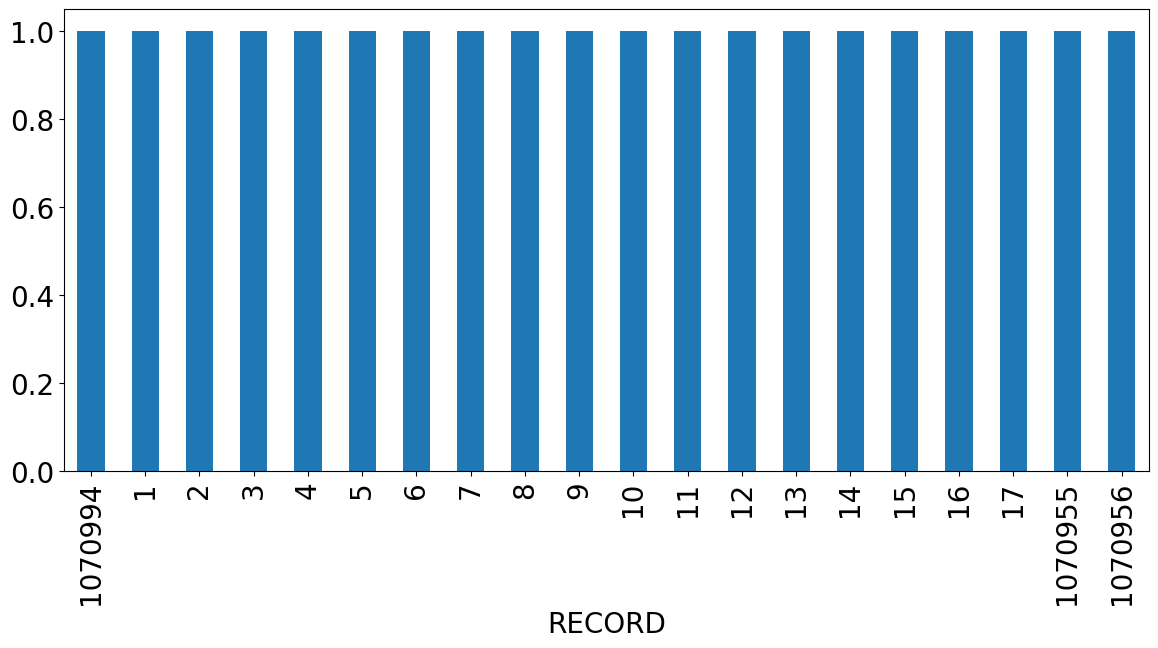

In [22]:
data['RECORD'].value_counts().head(20).plot(kind='bar')

## BBLE

In [23]:
len(data['BBLE'])

1070994

In [24]:
len(data['BBLE'].unique())

1070994

<Axes: xlabel='BBLE'>

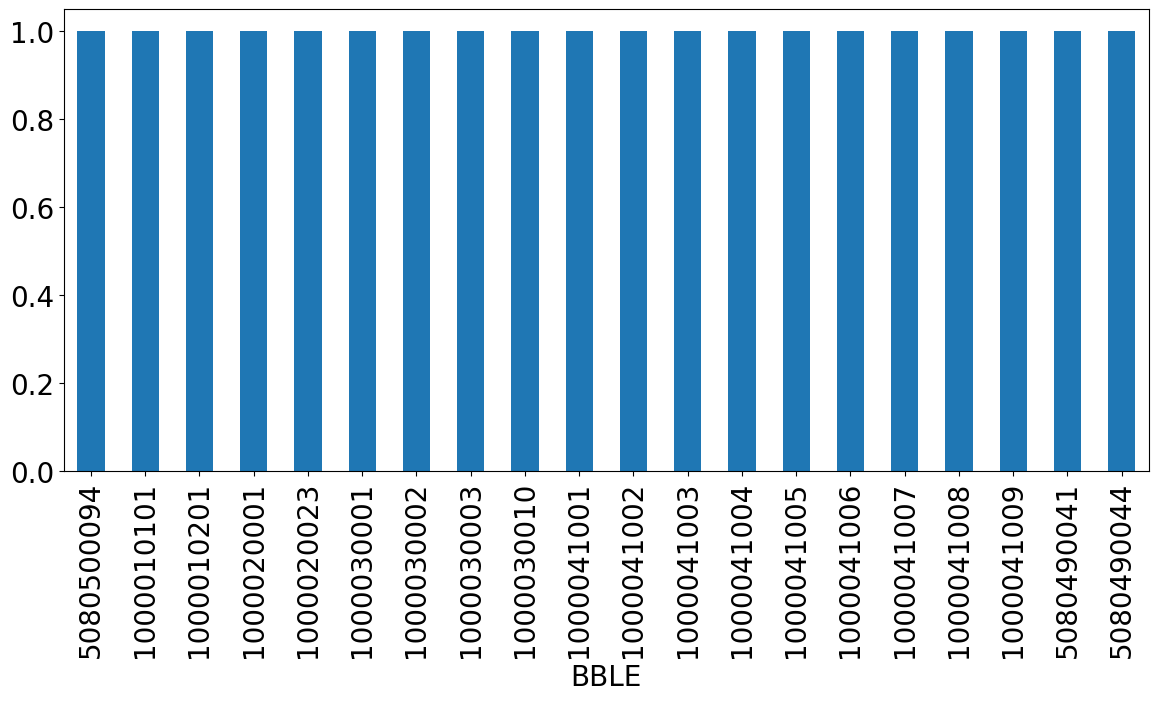

In [25]:
data['BBLE'].value_counts().head(20).plot(kind='bar')

## BORO

In [26]:
len(data['BORO'].unique())

5

In [27]:
data['BORO'].count() * 100 / numrecords

100.0

In [28]:
data['BORO'].value_counts()

BORO
4    358046
3    323243
1    146220
5    136200
2    107285
Name: count, dtype: int64

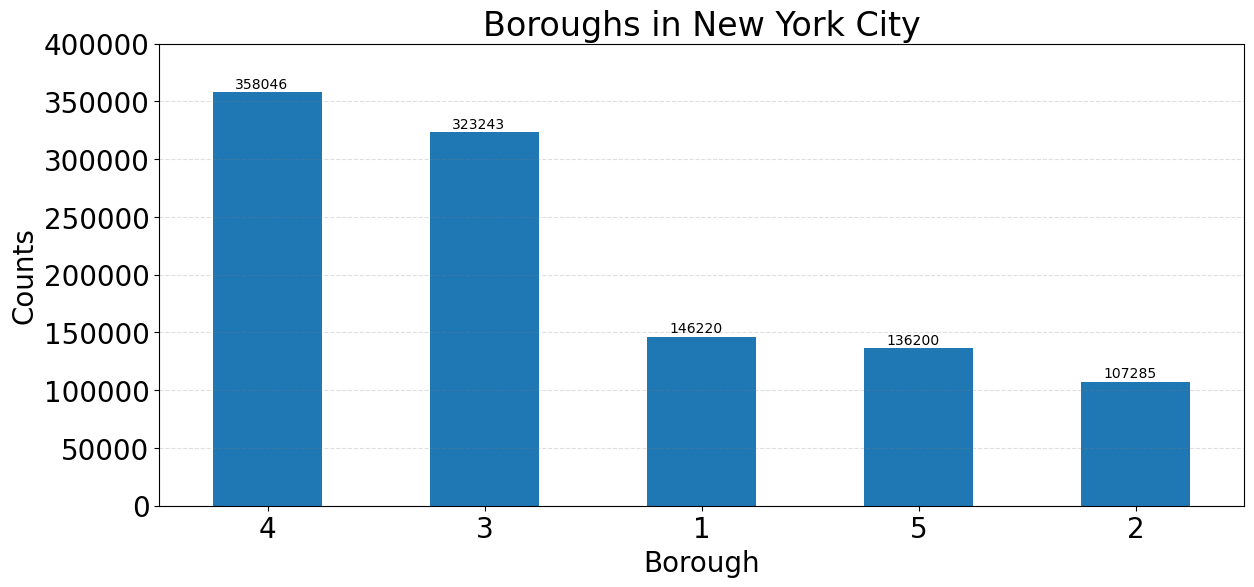

In [29]:
# Generate the bar plot
counts = data['BORO'].value_counts().head(20)
ax = counts.plot(kind='bar')
plt.xticks(rotation=0)
plt.ylim(0,400000)

# Add number labels to each column
for i, v in enumerate(counts):
    ax.text(i - 0.15, v + counts.max()*0.01, str(v), color='black', fontsize=10)

plt.title('Boroughs in New York City')
plt.xlabel('Borough')
plt.ylabel('Counts')
ax.grid(True, axis='y', linestyle='--', which='major', color='grey', alpha=.25)

plt.savefig('BORO')

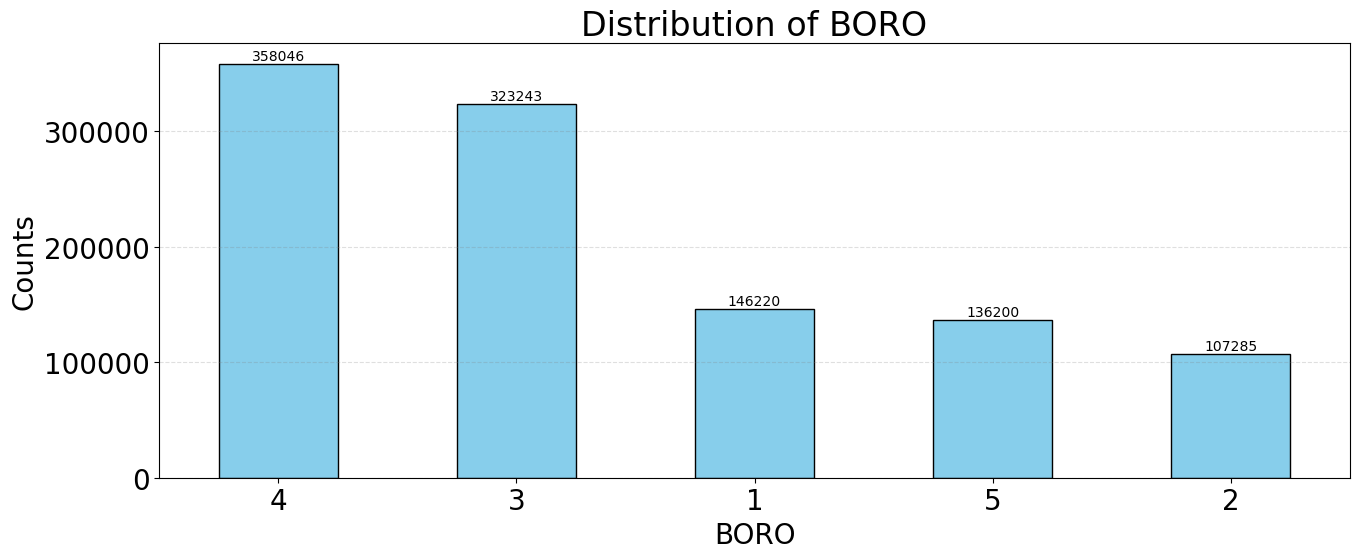

In [30]:
# Generate the bar plot
counts = data['BORO'].value_counts()
ax = counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xticks(rotation=0)
plt.title('Distribution of BORO')
plt.xlabel('BORO')
plt.ylabel('Counts')
ax.grid(True, axis='y', linestyle='--', which='major', color='grey', alpha=0.25)

# Add number labels to each column
for i, v in enumerate(counts):
    ax.text(i, v + counts.max() * 0.01, str(v), ha='center', fontsize=10)

plt.tight_layout()
plt.show()

## BLOCK

In [31]:
len(data['BLOCK'].unique())

13984

In [32]:
data['BLOCK'].count() * 100 / numrecords

100.0

In [33]:
data['BLOCK'].value_counts()

BLOCK
3944     3888
16       3786
3943     3424
3938     2794
1171     2535
         ... 
4356        1
10111       1
12118       1
12130       1
16184       1
Name: count, Length: 13984, dtype: int64

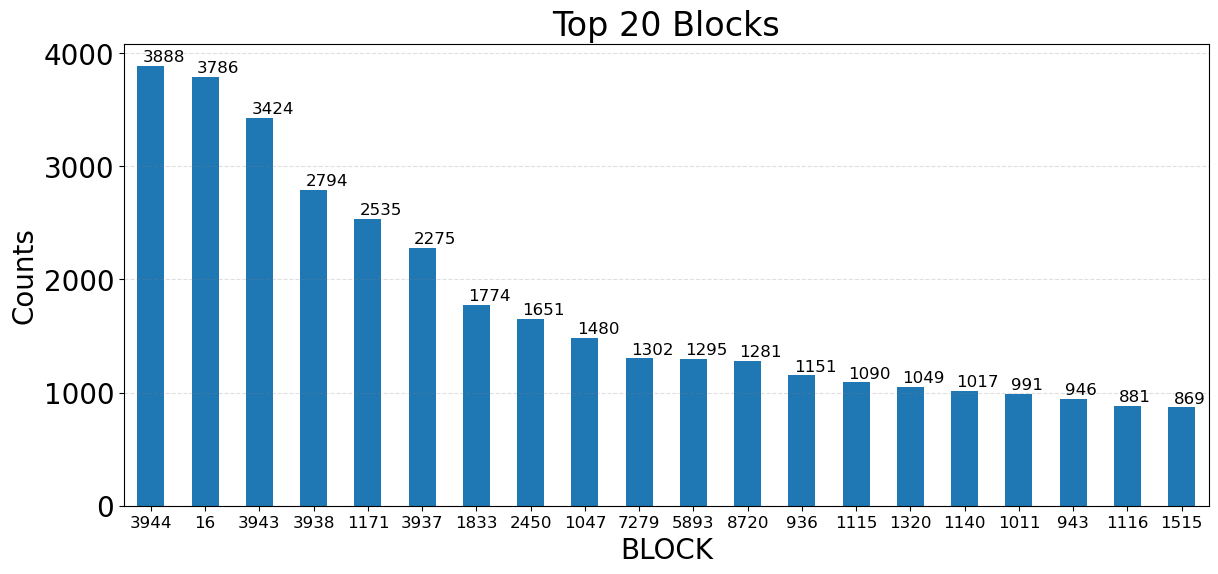

In [34]:
counts = data['BLOCK'].value_counts().head(20)
ax = counts.plot(kind='bar')
plt.xticks(rotation=0)
plt.tick_params(axis='x', labelsize=12)

# Add number labels to each column
for i, v in enumerate(counts):
    ax.text(i - 0.15, v + counts.max()*0.01, str(v), color='black',  fontsize=12)

# Set titles for the graph and axes
plt.title('Top 20 Blocks')
plt.ylabel('Counts')
ax.grid(True, axis='y', linestyle='--', which='major', color='grey', alpha=.25)

plt.savefig('BLOCK')

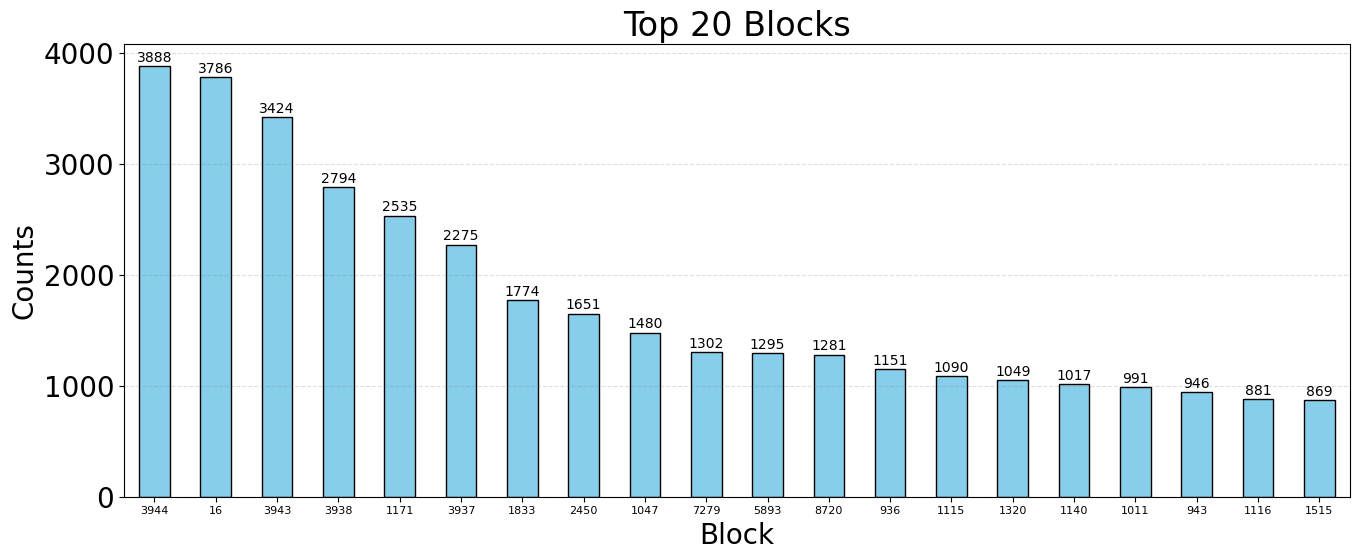

In [35]:
counts = data['BLOCK'].value_counts().head(20)
ax = counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xticks(rotation=0, fontsize=8)  # Set fontsize to make the x-axis font smaller
plt.title('Top 20 Blocks')
plt.xlabel('Block')
plt.ylabel('Counts')
ax.grid(True, axis='y', linestyle='--', which='major', color='grey', alpha=0.25)

# Add number labels to each column
for i, v in enumerate(counts):
    ax.text(i, v + counts.max() * 0.01, str(v), ha='center', fontsize=10)

plt.tight_layout()
plt.show()

## LOT

In [36]:
len(data['LOT'].unique())

6366

In [37]:
data['LOT'].count() * 100 / numrecords

100.0

In [38]:
data['LOT'].value_counts()

LOT
1       24367
20      12294
15      12171
12      12143
14      12074
        ...  
6083        1
6084        1
6085        1
6086        1
6087        1
Name: count, Length: 6366, dtype: int64

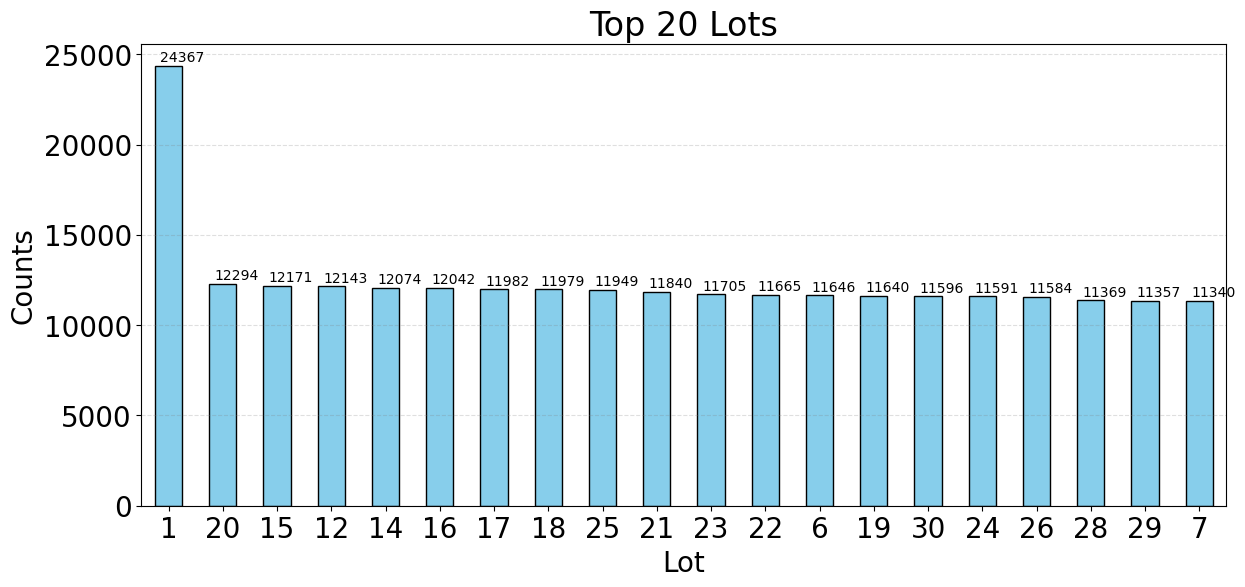

In [39]:
# Generate the bar plot
counts = data['LOT'].value_counts().head(20)
ax = counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xticks(rotation=0)

# Add number labels to each column, shifted to the left
for i, v in enumerate(counts):
    ax.text(i - 0.15, v + counts.max() * 0.01, str(v), color='black', fontsize=10)

# Set titles for the graph and axes
plt.title('Top 20 Lots')
plt.xlabel('Lot')
plt.ylabel('Counts')
ax.grid(True, axis='y', linestyle='--', which='major', color='grey', alpha=0.25)

# Save the plot
plt.savefig('LOT')


In [40]:
data['LOT'].max()

9978

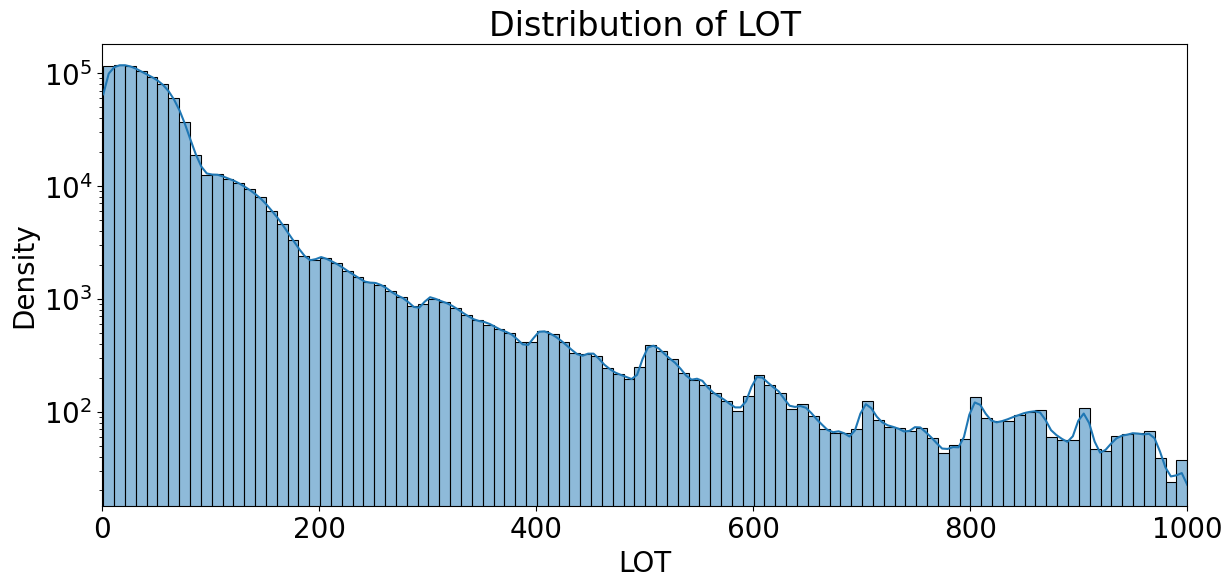

In [41]:
# look at the most relevant range
xhigh = 1000
plt.xlim(0, xhigh)
temp = data[data['LOT'] <= xhigh]
sns.histplot(temp['LOT'],bins = 100, kde = True)

plt.yscale('log')
plt.xlabel('LOT')
plt.ylabel('Density')
plt.title('Distribution of LOT')
plt.show()

# plt.savefig('LOT')

## EASEMENT

In [42]:
len(data['EASEMENT'].unique())

13

In [43]:
data['EASEMENT'].count() * 100 / numrecords

0.4328689049611856

In [44]:
data['EASEMENT'].value_counts()

EASEMENT
E    4148
F     296
G     102
H      33
N      19
I      16
J       8
K       5
L       3
P       3
M       2
U       1
Name: count, dtype: int64

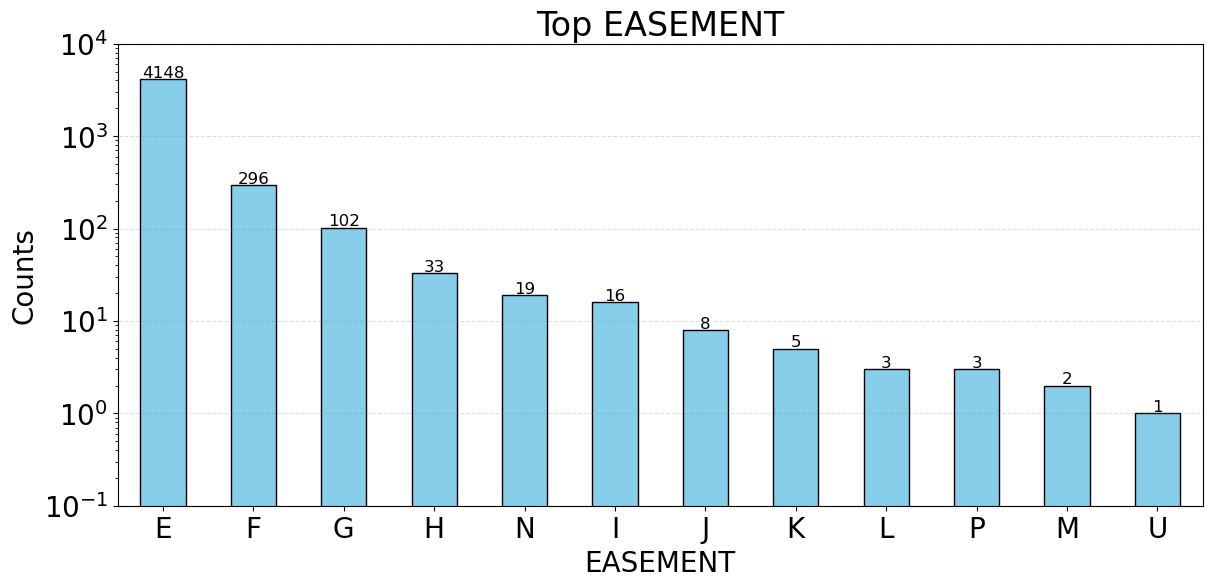

In [45]:
plt.yscale('log')
# Generate the bar plot
counts = data['EASEMENT'].value_counts().head(20)
ax = counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xticks(rotation=0)
plt.ylim(0.1, 10000)

# Add number labels to each column
for i, v in enumerate(counts):
    ax.text(i, v * 1.05, str(v), color='black', ha='center', fontsize=12)

# Set titles for the graph and axes
plt.title('Top EASEMENT')
plt.xlabel('EASEMENT')
plt.ylabel('Counts')
ax.grid(True, axis='y', linestyle='--', which='major', color='grey', alpha=0.25)

plt.savefig('EASEMENT')
plt.show()

## OWNER

In [46]:
len(data['OWNER'].unique())

863348

In [47]:
data['OWNER'].count() * 100 / numrecords

97.03593110699033

In [48]:
data['OWNER'].value_counts()

OWNER
PARKCHESTER PRESERVAT    6021
PARKS AND RECREATION     4255
DCAS                     2169
HOUSING PRESERVATION     1904
CITY OF NEW YORK         1450
                         ... 
ELARIO ALTERNO              1
CHARLES,VIRGINIA            1
HAYLES, HEATHER             1
GLENDORA HARVEY             1
WALLING, CAROL KING         1
Name: count, Length: 863347, dtype: int64

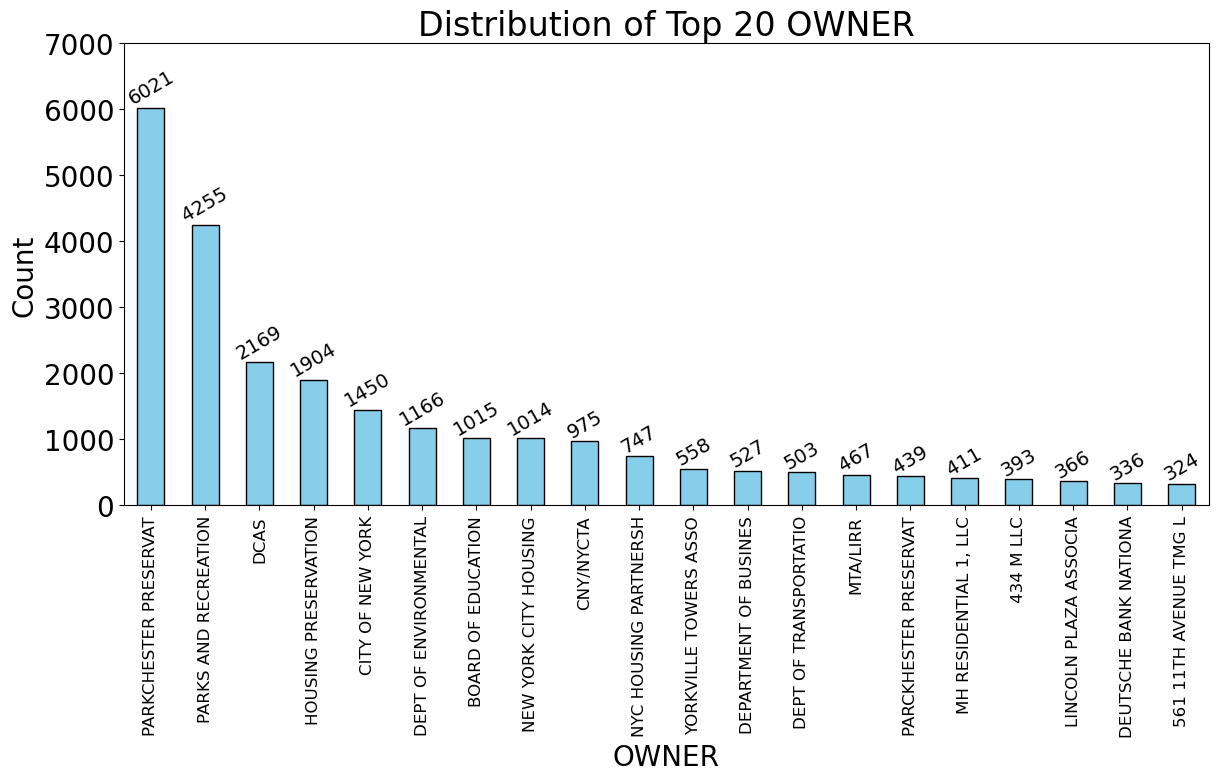

In [49]:
own = data['OWNER'].value_counts().head(20)
data['OWNER'].value_counts().head(20).plot(kind='bar', color='skyblue', edgecolor='black')
plt.ylim(0, 7000)
plt.xticks(fontsize=12)

j = 0
for i in own.index:    
        plt.text(j, own[i], own[i], ha="center", va="bottom", fontsize=14, rotation=30)
        j += 1

plt.xlabel('OWNER')
plt.ylabel('Count')
plt.title('Distribution of Top 20 OWNER')

plt.savefig('OWNER')

## BLDGCL

In [50]:
len(data['BLDGCL'].unique())

200

In [51]:
data['BLDGCL'].count() * 100 / numrecords

100.0

In [52]:
data['BLDGCL'].value_counts()

BLDGCL
R4    139879
A1    123369
A5     96984
B1     84208
B2     77598
       ...  
I2         4
I3         4
H7         3
Y5         1
E6         1
Name: count, Length: 200, dtype: int64

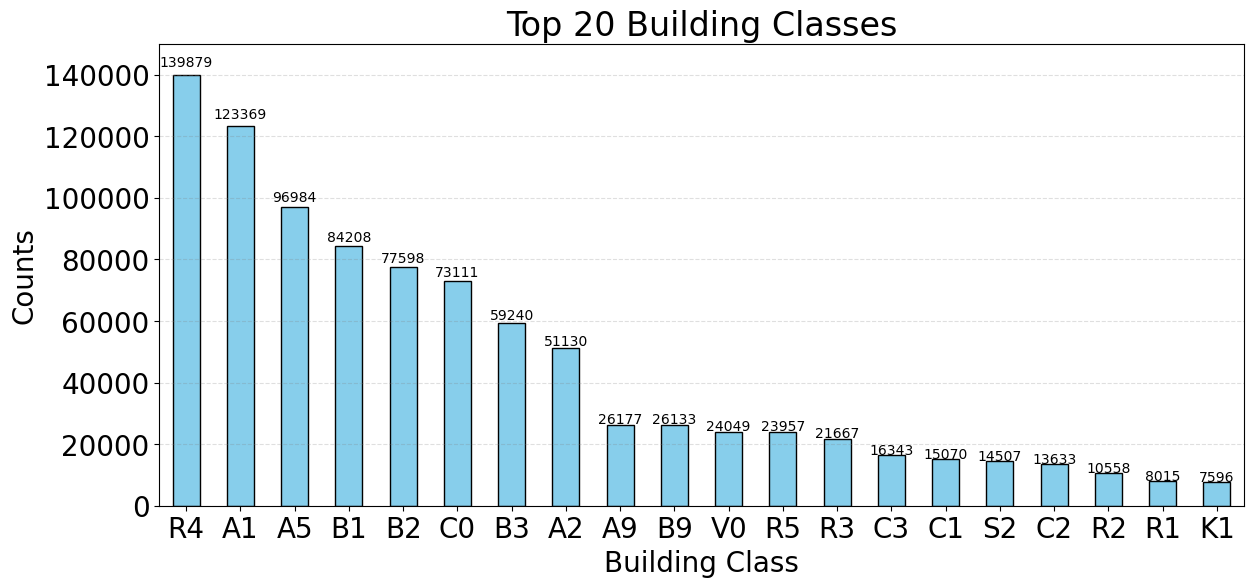

In [53]:
# Generate the bar plot
counts = data['BLDGCL'].value_counts().head(20)
ax = counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xticks(rotation=0)
plt.ylim(0, 150000)

# Add number labels to the top of each column
for i, v in enumerate(counts):
    ax.text(i, v * 1.02, str(v), color='black', ha='center', fontsize=10)

# Set titles for the graph and axes
plt.title('Top 20 Building Classes')
plt.xlabel('Building Class')
plt.ylabel('Counts', rotation=90)
ax.grid(True, axis='y', linestyle='--', which='major', color='grey', alpha=0.25)

plt.savefig('BLDGCL')

## TAXCLASS

In [54]:
len(data['TAXCLASS'].unique())

11

In [55]:
data['TAXCLASS'].count() * 100 / numrecords

100.0

In [56]:
data['TAXCLASS'].value_counts()

TAXCLASS
1     660721
2     188612
4     104310
2A     40574
1B     24738
1A     21667
2B     13964
2C     10795
3       4638
1C       946
1D        29
Name: count, dtype: int64

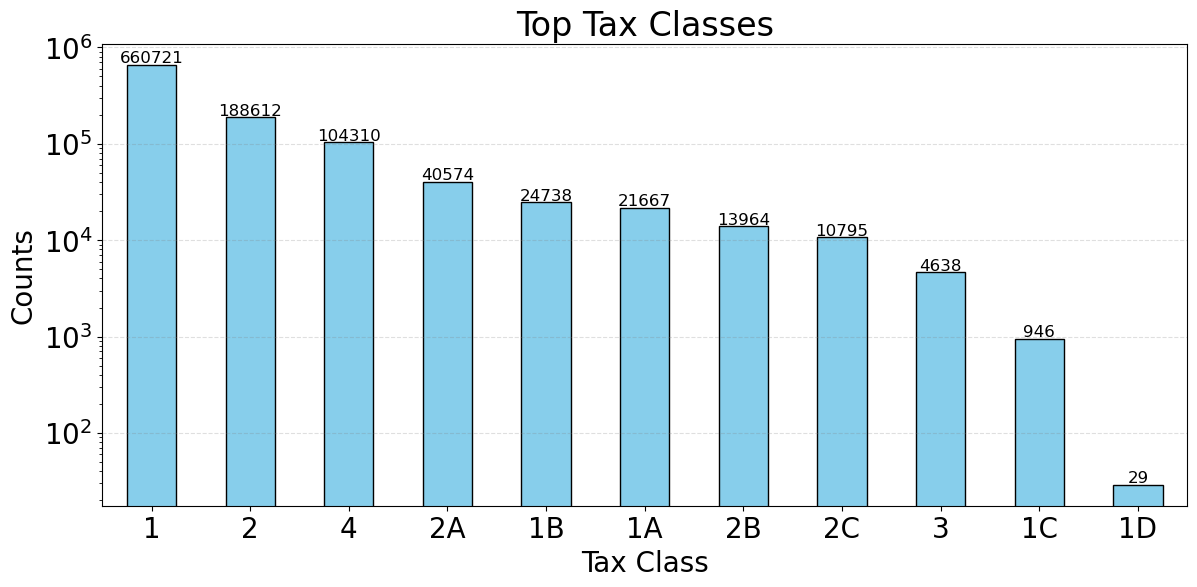

In [57]:
plt.yscale('log')

counts = data['TAXCLASS'].value_counts().head(20)
ax = counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xticks(rotation=0)

# Add number labels to the top of each column
for i, v in enumerate(counts):
    ax.text(i, v * 1.05, str(v), color='black', ha='center', fontsize=12)

# Set titles for the graph and axes
plt.title('Top Tax Classes')
plt.xlabel('Tax Class')
plt.ylabel('Counts', rotation=90)
ax.grid(True, axis='y', linestyle='--', which='major', color='grey', alpha=.25)


plt.savefig('TAXCLASS')

## LTFRONT

In [58]:
len(data['LTFRONT'].unique())

1297

In [59]:
data['LTFRONT'].count() * 100 / numrecords

100.0

In [60]:
data['LTFRONT'].value_counts()

LTFRONT
0       169108
20      135178
25      117306
40       85389
18       40668
         ...  
1812         1
3740         1
1299         1
1802         1
969          1
Name: count, Length: 1297, dtype: int64

In [61]:
data['LTFRONT'].max()

9999

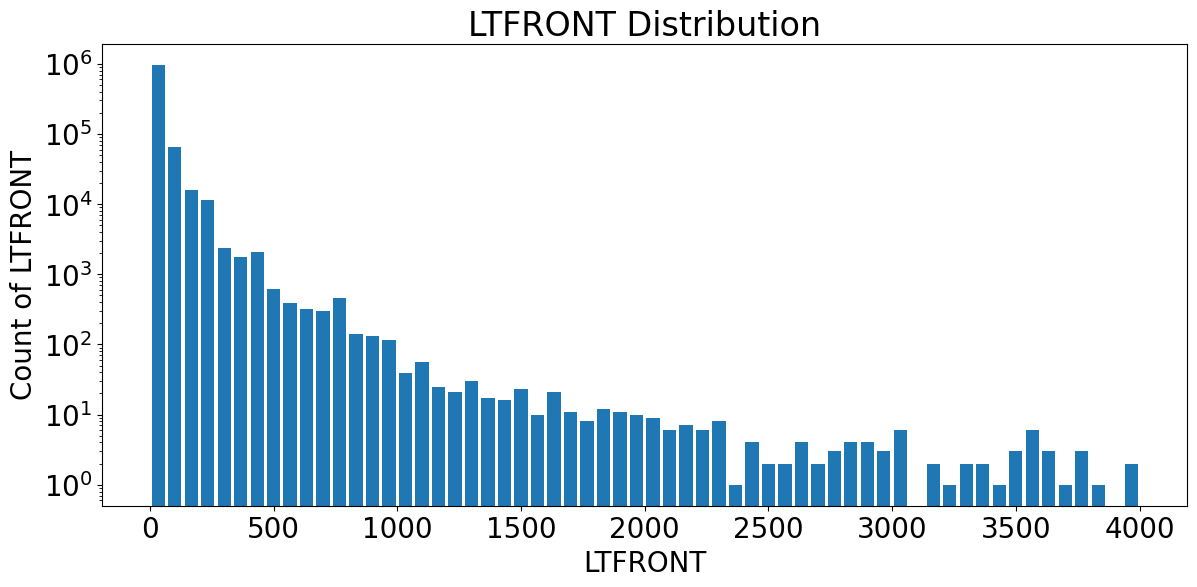

In [62]:
# plotting a histogram
range = (0, 4000)
bins = 60

plt.hist(data['LTFRONT'], bins, range, histtype = 'bar', rwidth = 0.8)

plt.yscale('log')
plt.xlabel('LTFRONT')
plt.ylabel('Count of LTFRONT')
plt.title('LTFRONT Distribution')

plt.savefig('LTFRONT')

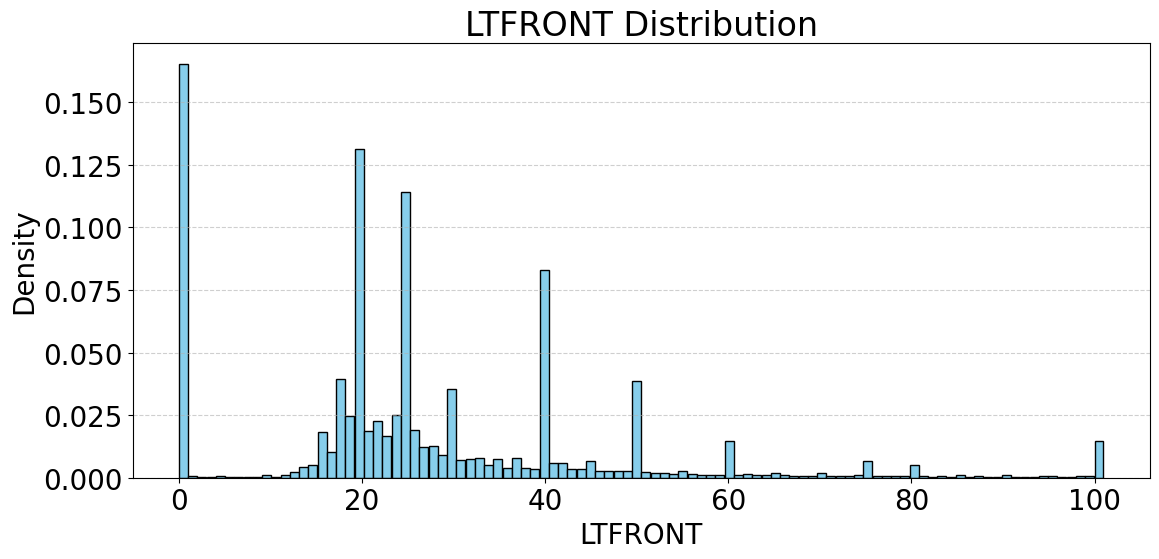

In [63]:
# nitya plot ltfront
# #Filter out extreme outliers beyond the 99th percentile
import matplotlib.pyplot as plt
import seaborn as sns

# Filter at 95th percentile
upper_limit = data['LTFRONT'].quantile(0.95)
filtered_data = data[data['LTFRONT'] <= upper_limit]

# Plot histogram with density=True
plt.figure(figsize=(12, 6))
plt.hist(
    filtered_data['LTFRONT'],
    bins=100,  # more bins to capture modal values
    range=(0, upper_limit),
    histtype='bar',
    density=True,
    width=0.98,
    color='skyblue',
    edgecolor='black'
)

# Optional: KDE overlay for smooth trend

# Axis labels and title

plt.xlabel('LTFRONT')
plt.ylabel('Density')
plt.title('LTFRONT Distribution')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()






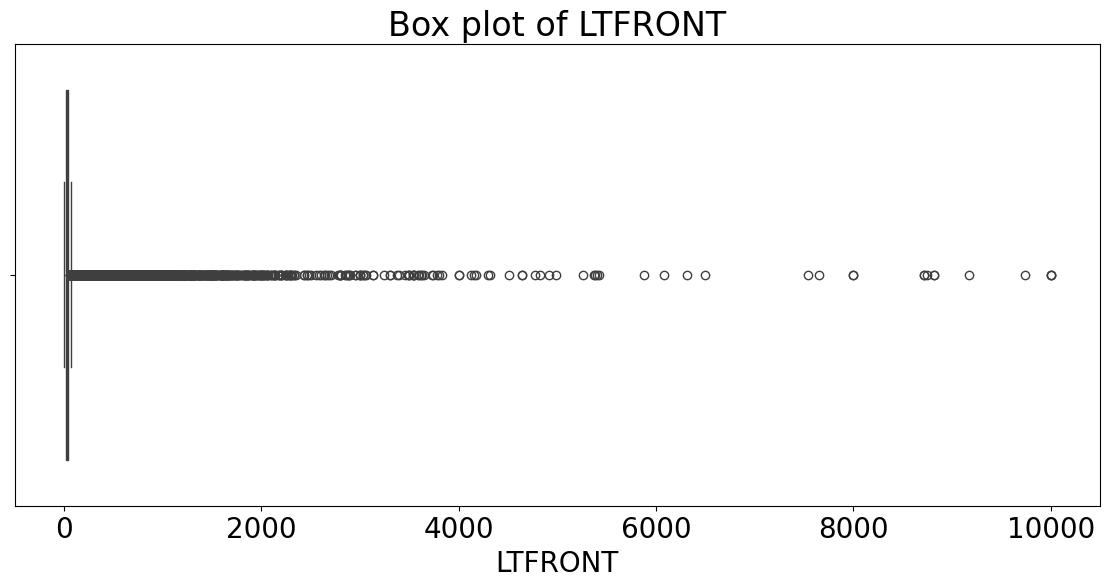

In [64]:
sns.boxplot(x = 'LTFRONT', data = data)

plt.xlabel('LTFRONT')
plt.title('Box plot of LTFRONT')

plt.show()

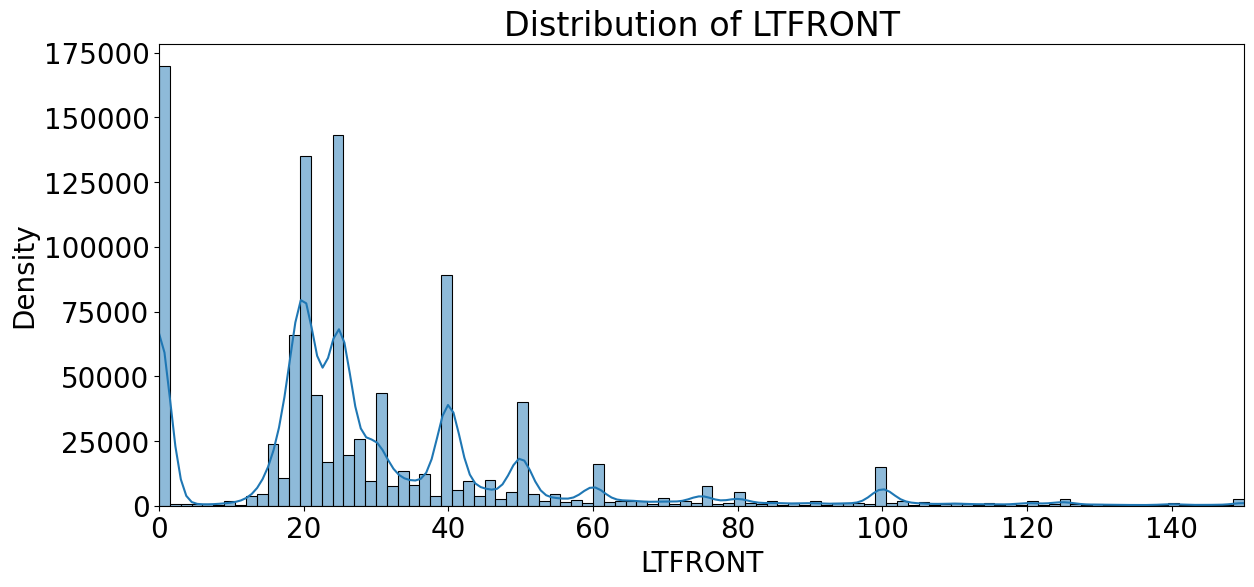

In [65]:
# look at the most relevant range
xhigh = 150
plt.xlim(0, xhigh)
temp = data[data['LTFRONT'] <= xhigh]
sns.histplot(temp['LTFRONT'],bins = 100, kde = True)

plt.xlabel('LTFRONT')
plt.ylabel('Density')
plt.title('Distribution of LTFRONT')
plt.show()

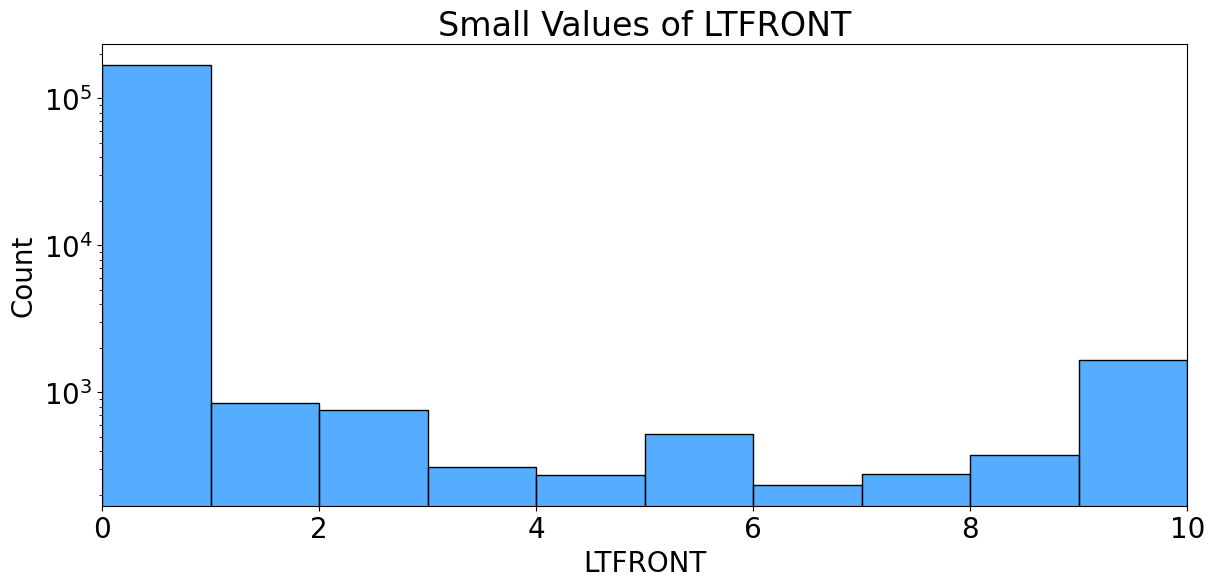

In [66]:
# look at the very small sizes, including zeros
xhigh = 10
plt.xlim(0, xhigh)
temp = data[data['LTFRONT'] <= xhigh]
plt.yscale('log')
sns.histplot(temp['LTFRONT'], bins = 10, kde = False, color = 'dodgerblue')
plt.xlabel('LTFRONT')
plt.ylabel('Count')
plt.title('Small Values of LTFRONT')

plt.savefig('LTFRONT small')

## LTDEPTH

In [67]:
len(data['LTDEPTH'].unique())

1370

In [68]:
data['LTDEPTH'].count() * 100 / numrecords

100.0

In [69]:
data['LTDEPTH'].value_counts()

LTDEPTH
100     464541
0       170128
95       31612
90       20294
80       16671
         ...  
1056         1
1209         1
3172         1
1294         1
1240         1
Name: count, Length: 1370, dtype: int64

In [70]:
data['LTDEPTH'].max()

9999

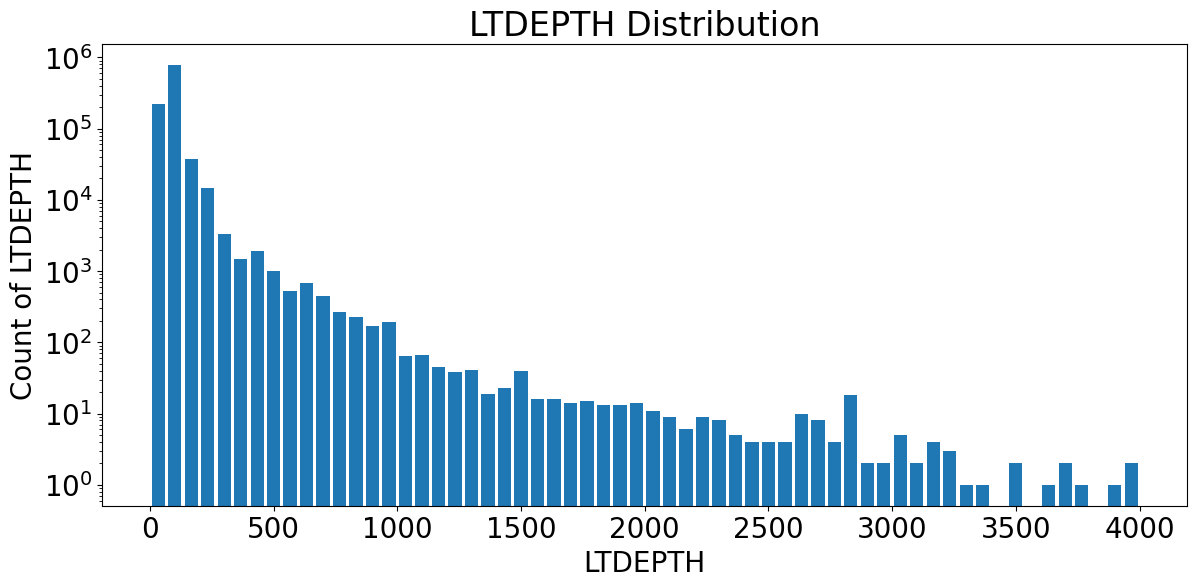

In [71]:
# plotting a histogram
range = (0, 4000)
bins = 60

plt.hist(data['LTDEPTH'], bins, range, histtype = 'bar', rwidth = 0.8)

plt.yscale('log')
plt.xlabel('LTDEPTH')
plt.ylabel('Count of LTDEPTH')
plt.title('LTDEPTH Distribution')

plt.savefig('LTDEPTH')

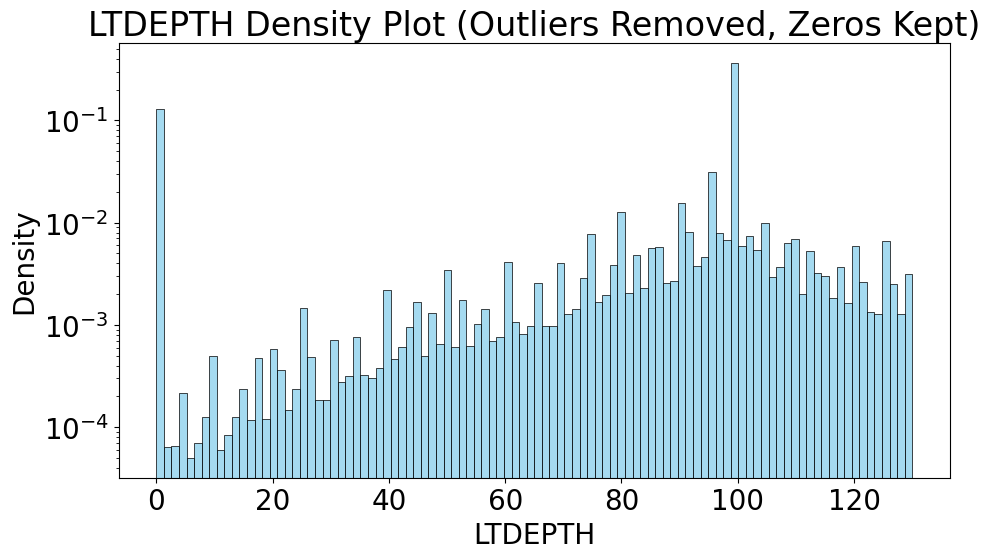

In [72]:
Q1 = data['LTDEPTH'].quantile(0.25)
Q3 = data['LTDEPTH'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

# Keep all values <= upper bound, including 0s
filtered_data = data[data['LTDEPTH'] <= upper_bound]

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(
    filtered_data['LTDEPTH'],
    bins=100,
    stat='density',
    color='skyblue',
    edgecolor='black')

plt.yscale('log')
plt.xlabel('LTDEPTH')
plt.ylabel('Density')
plt.title('LTDEPTH Density Plot (Outliers Removed, Zeros Kept)')
plt.tight_layout()
plt.show()



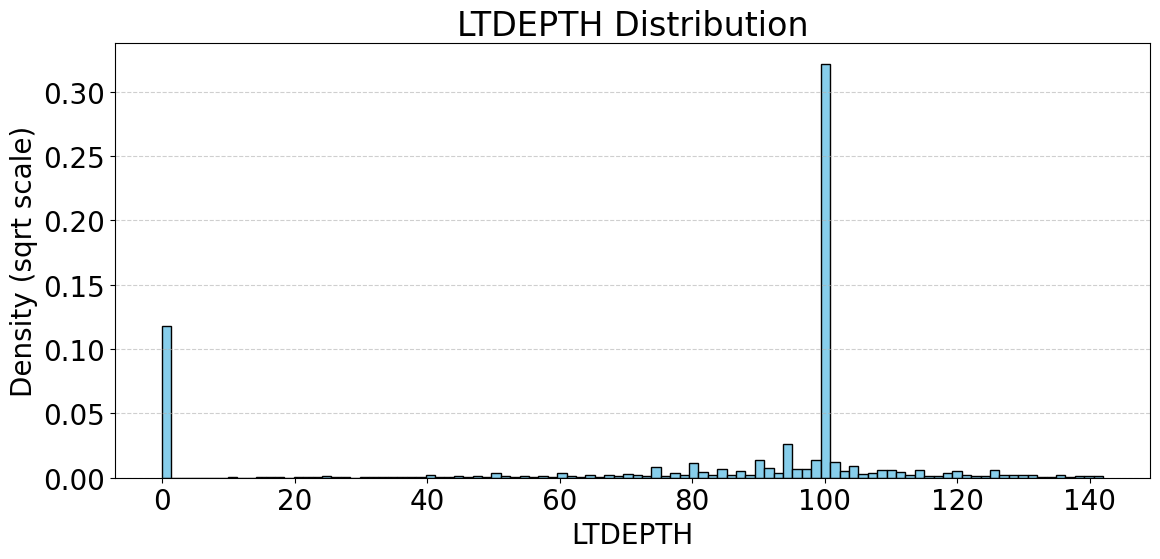

In [73]:
#nityaplto ltdepth
import matplotlib.pyplot as plt

# Step 1: Filter extreme outliers using the 95th percentile
upper_limit = data['LTDEPTH'].quantile(0.95)
filtered_data = data[data['LTDEPTH'] <= upper_limit]

# Step 2: Plot histogram with density normalization
plt.figure(figsize=(12, 6))
plt.hist(
    filtered_data['LTDEPTH'],
    bins=100,
    range=(0, upper_limit),
    density=True,
    histtype='bar',
    align='mid',
    color='skyblue',
    edgecolor='black',
)

# Step 3: Optional log scale — uncomment if you want to reveal the tail
# plt.yscale('log')
#plt.yscale('function', functions=(np.sqrt, lambda x: x**2))
plt.xlabel('LTDEPTH')
plt.ylabel('Density (sqrt scale)')
plt.title('LTDEPTH Distribution')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


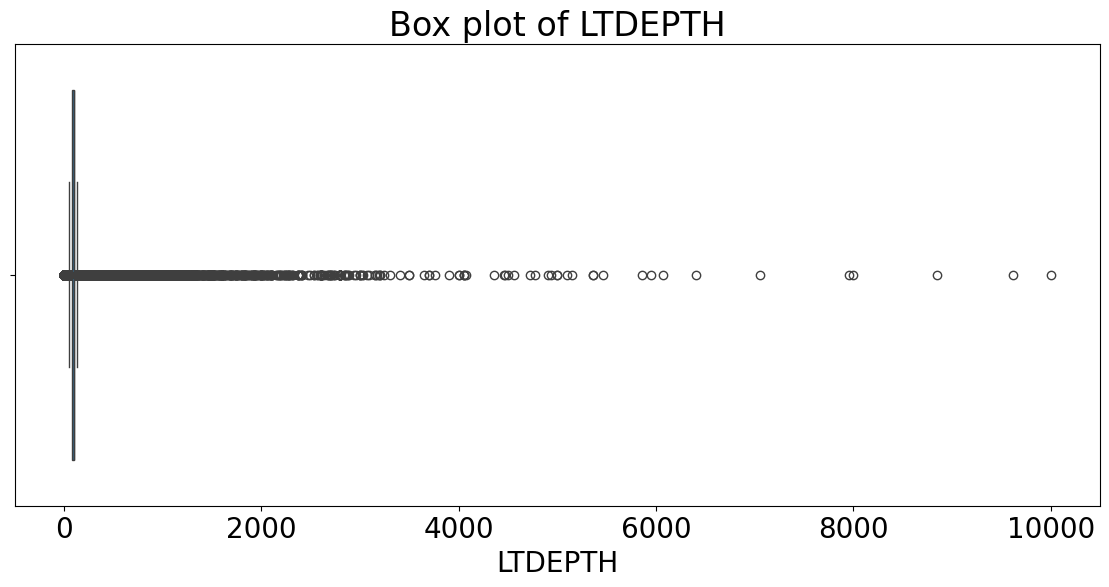

In [74]:
sns.boxplot(x = 'LTDEPTH', data = data)

plt.xlabel('LTDEPTH')
plt.title('Box plot of LTDEPTH')

plt.show()

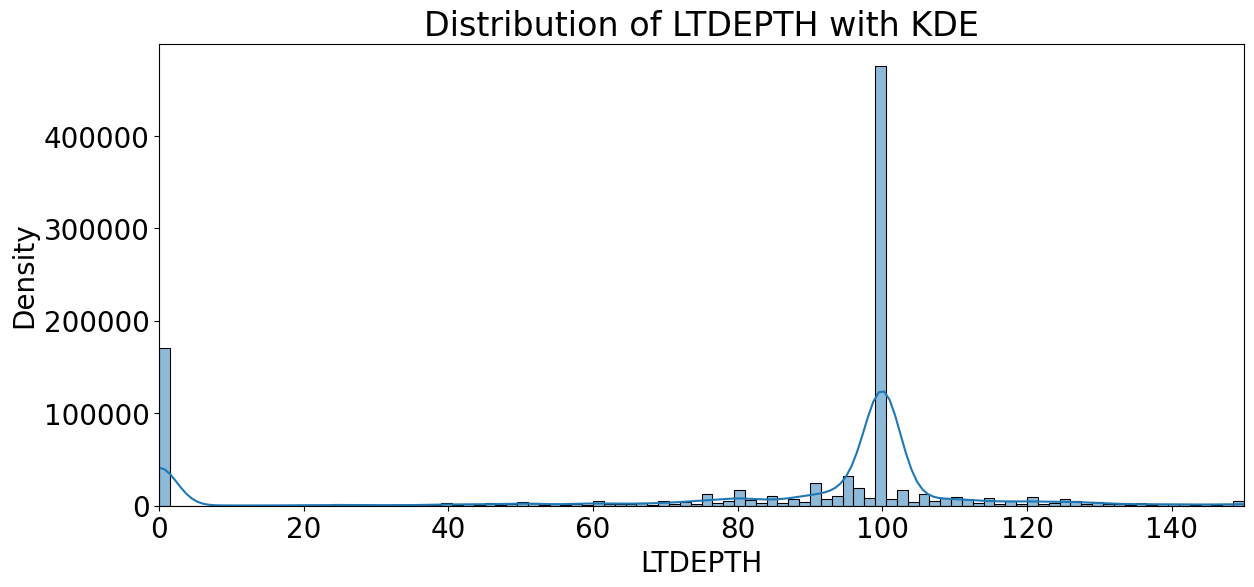

In [75]:
# look at the most relevant range
xhigh = 150
plt.xlim(0, xhigh)
temp = data[data['LTDEPTH'] <= xhigh]
sns.histplot(temp['LTDEPTH'],bins = 100, kde = True)

plt.xlabel('LTDEPTH')
plt.ylabel('Density')
plt.title('Distribution of LTDEPTH with KDE')
plt.show()

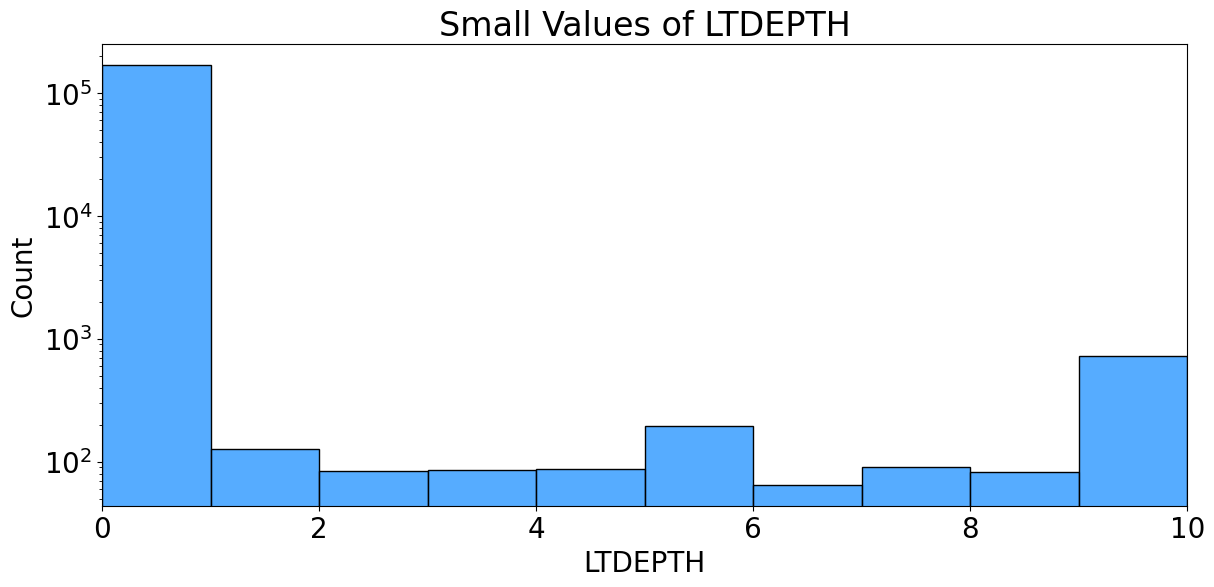

In [76]:
# look at the very small sizes, including zeros
xhigh = 10
plt.xlim(0, xhigh)
temp = data[data['LTDEPTH'] <= xhigh]
plt.yscale('log')
sns.histplot(temp['LTDEPTH'], bins = 10, kde = False, color = 'dodgerblue')
plt.xlabel('LTDEPTH')
plt.ylabel('Count')
plt.title('Small Values of LTDEPTH')

plt.savefig('LTDEPTH small')

## EXT

In [77]:
len(data['EXT'].unique())

4

In [78]:
data['EXT'].count() * 100 / numrecords

33.081884679092504

In [79]:
data['EXT'].value_counts()

EXT
G     266970
E      49442
EG     37893
Name: count, dtype: int64

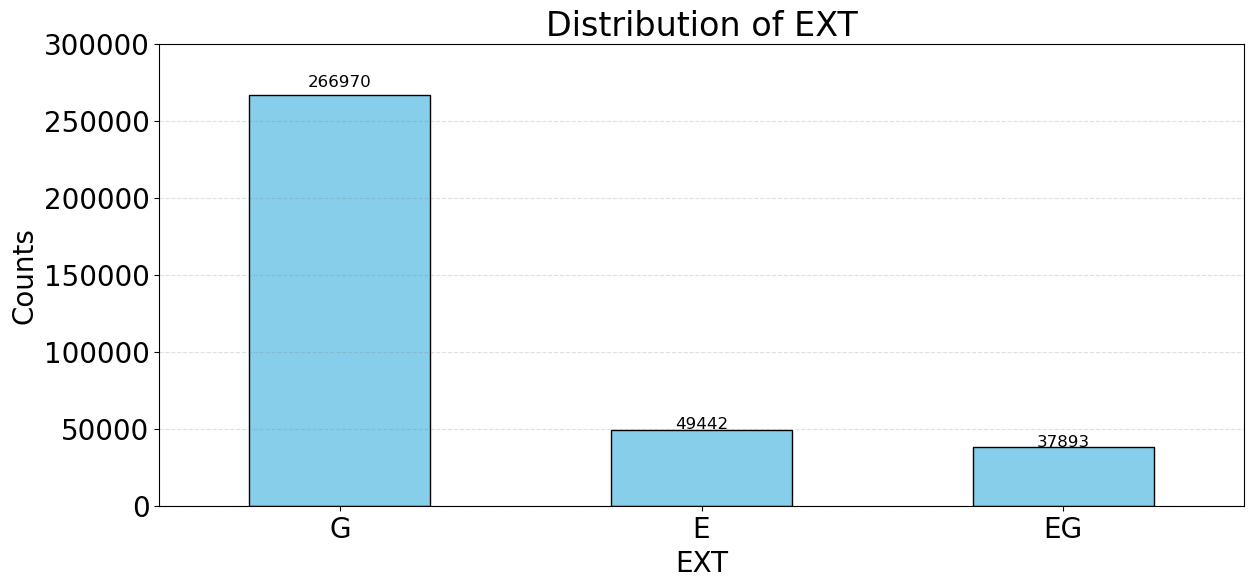

In [80]:
# Generate the bar plot
counts = data['EXT'].value_counts().head(20)
ax = counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xticks(rotation=0)
plt.ylim(0, 300000)

# Add number labels to the top of each column
for i, v in enumerate(counts):
    ax.text(i, v * 1.02, str(v), color='black', ha='center', fontsize=12)

# Set titles for the graph and axes
plt.title('Distribution of EXT')
plt.xlabel('EXT')
plt.ylabel('Counts', rotation=90)
ax.grid(True, axis='y', linestyle='--', which='major', color='grey', alpha=0.25)

plt.savefig('EXT')

## STORIES

In [81]:
len(data['STORIES'].unique())

112

In [82]:
data['STORIES'].count() * 100 / numrecords

94.74656253909919

In [83]:
data['STORIES'].value_counts()

STORIES
2.00      415092
3.00      130127
1.00       96706
2.50       82292
4.00       38342
           ...  
78.00          1
61.00          1
2.10           1
114.00         1
82.00          1
Name: count, Length: 111, dtype: int64

In [84]:
data['STORIES'].max()

119.0

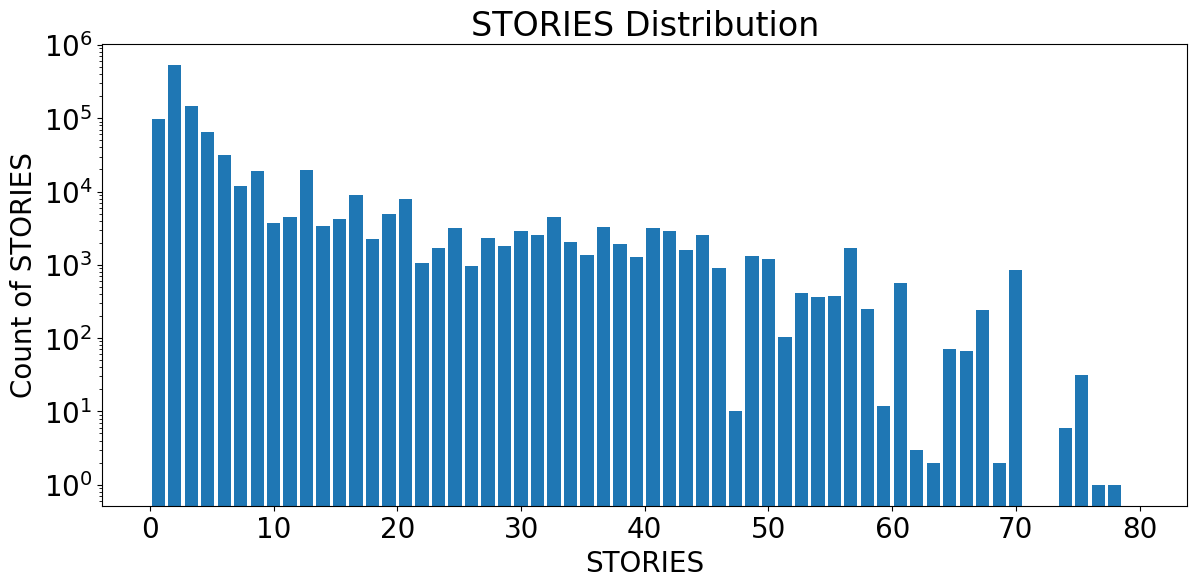

In [85]:
# plotting a histogram
range = (0, 80)
bins = 60

plt.hist(data['STORIES'], bins, range, histtype = 'bar', rwidth = 0.8)

#plt.yscale('function', functions=(np.sqrt, lambda x: x**2))

plt.yscale('log')
plt.xlabel('STORIES')
plt.ylabel('Count of STORIES')
plt.title('STORIES Distribution')

plt.savefig('STORIES')

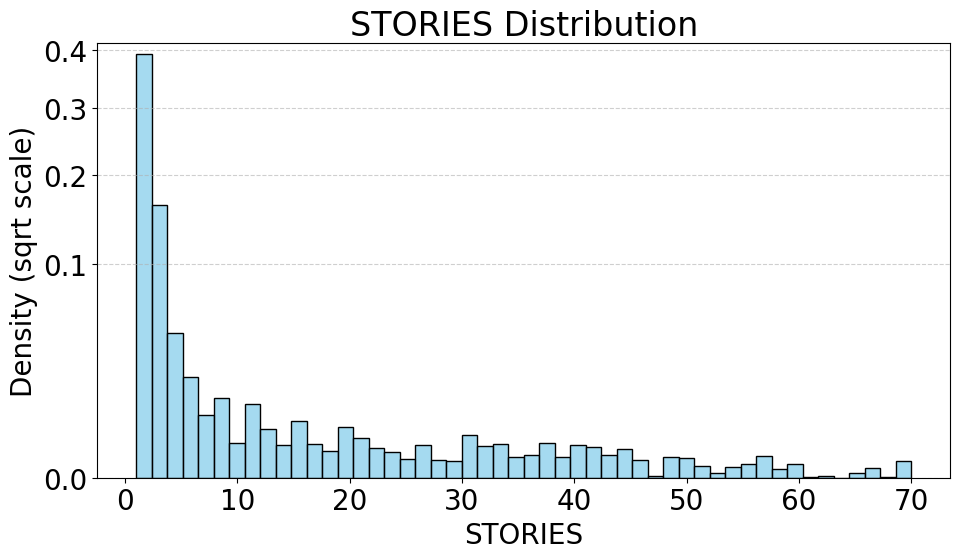

In [86]:
#nitya plot stories
import matplotlib.pyplot as plt
import seaborn as sns

# Filter to focus on meaningful values
filtered_data = data[data['STORIES'] <= 70]

plt.figure(figsize=(10, 6))

# Histogram with density normalization and KDE
sns.histplot(
    filtered_data['STORIES'],
    bins= 50,
    stat='density',
    color='skyblue',
    edgecolor='black'
)

#plt.yscale('log')
plt.yscale('function', functions=(np.sqrt, lambda x: x**2))


plt.xlabel('STORIES')
plt.ylabel('Density (sqrt scale)')
plt.title('STORIES Distribution')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


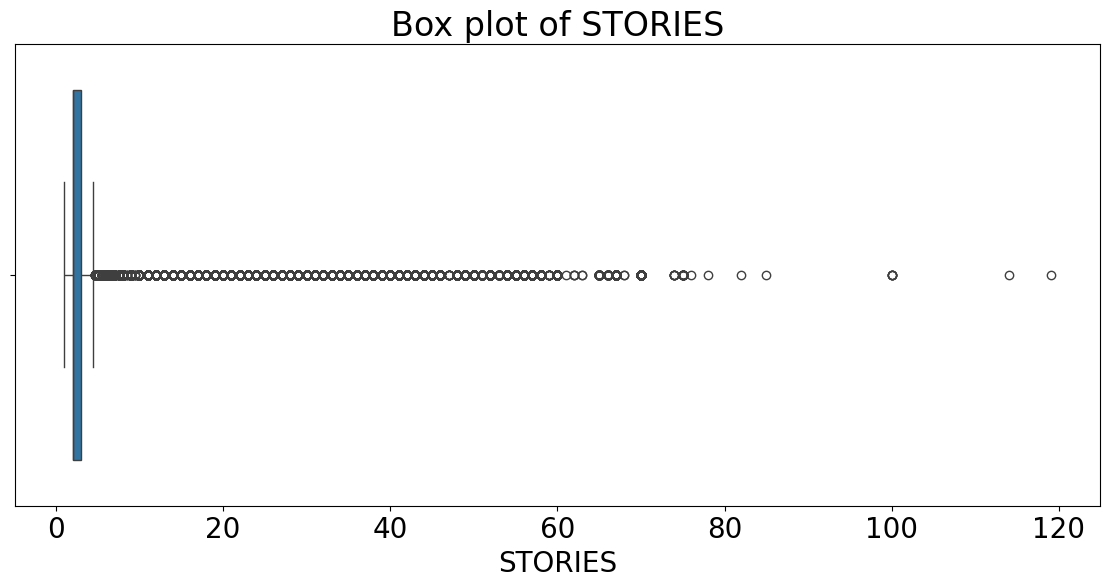

In [87]:
sns.boxplot(x = 'STORIES', data = data)

plt.xlabel('STORIES')
plt.title('Box plot of STORIES')

plt.show()

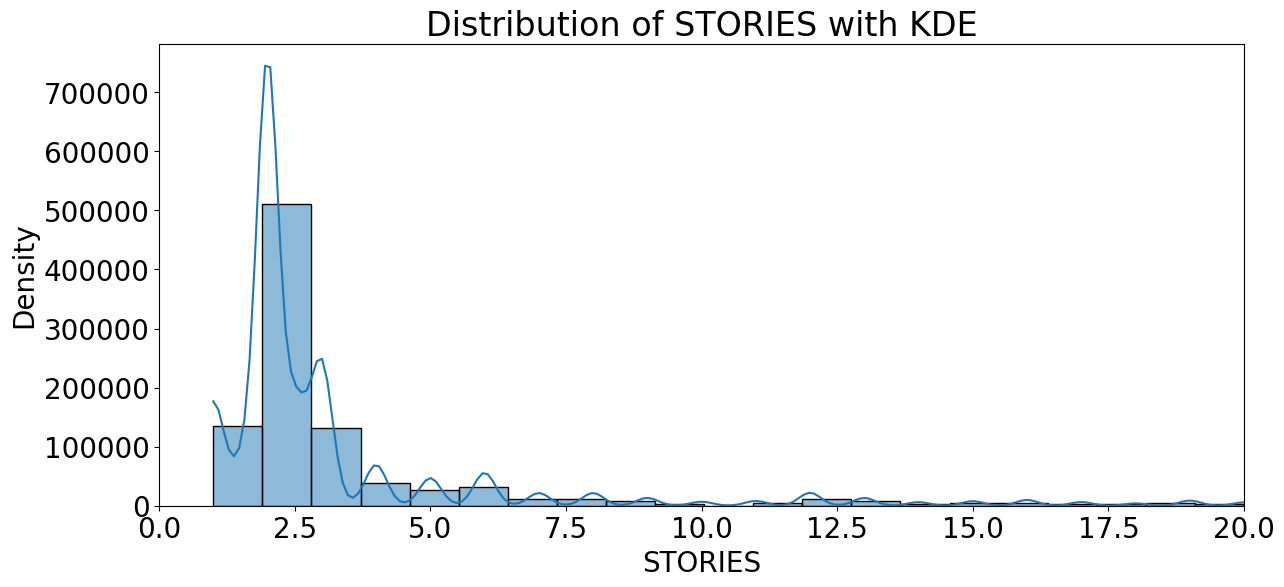

In [88]:
xhigh = 20
temp = data[data['STORIES'] > 0]
temp.count()
plt.xlim(0, xhigh)
temp = data[data['STORIES'] <= xhigh]
sns.histplot(temp['STORIES'],bins = 21, kde = True)

plt.xlabel('STORIES')
plt.ylabel('Density')
plt.title('Distribution of STORIES with KDE')
plt.show()

## FULLVAL

In [89]:
len(data['FULLVAL'].unique())

109324

In [90]:
data['FULLVAL'].count() * 100 / numrecords

100.0

In [91]:
data['FULLVAL'].value_counts()

FULLVAL
0.00          13007
502000.00      2796
366000.00      2290
397000.00      2231
472000.00      2223
              ...  
552300.00         1
157778.00         1
901111.00         1
346950.00         1
2318026.00        1
Name: count, Length: 109324, dtype: int64

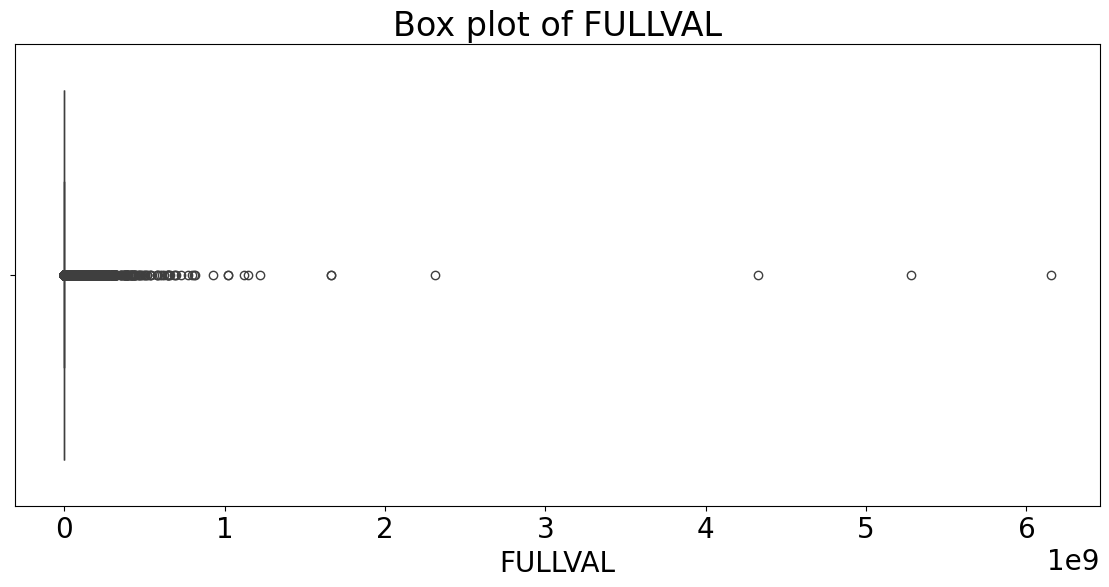

In [92]:
sns.boxplot(x = 'FULLVAL', data = data)

plt.xlabel('FULLVAL')
plt.title('Box plot of FULLVAL')

plt.show()

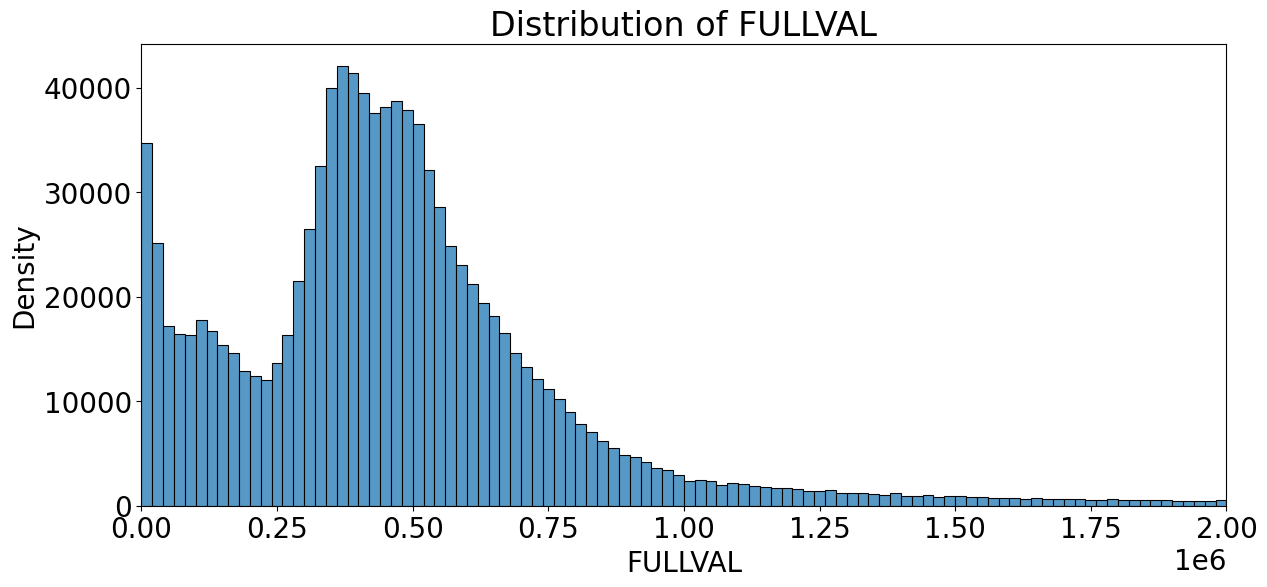

<Figure size 1400x600 with 0 Axes>

In [93]:
xhigh = 2000000
plt.xlim(0, xhigh)
temp = data[data['FULLVAL'] <= xhigh]
sns.histplot(temp['FULLVAL'], bins = 100, kde = False)


plt.xlabel('FULLVAL')
plt.ylabel('Density')
plt.title('Distribution of FULLVAL')

plt.show()
plt.savefig('FULLVAL')

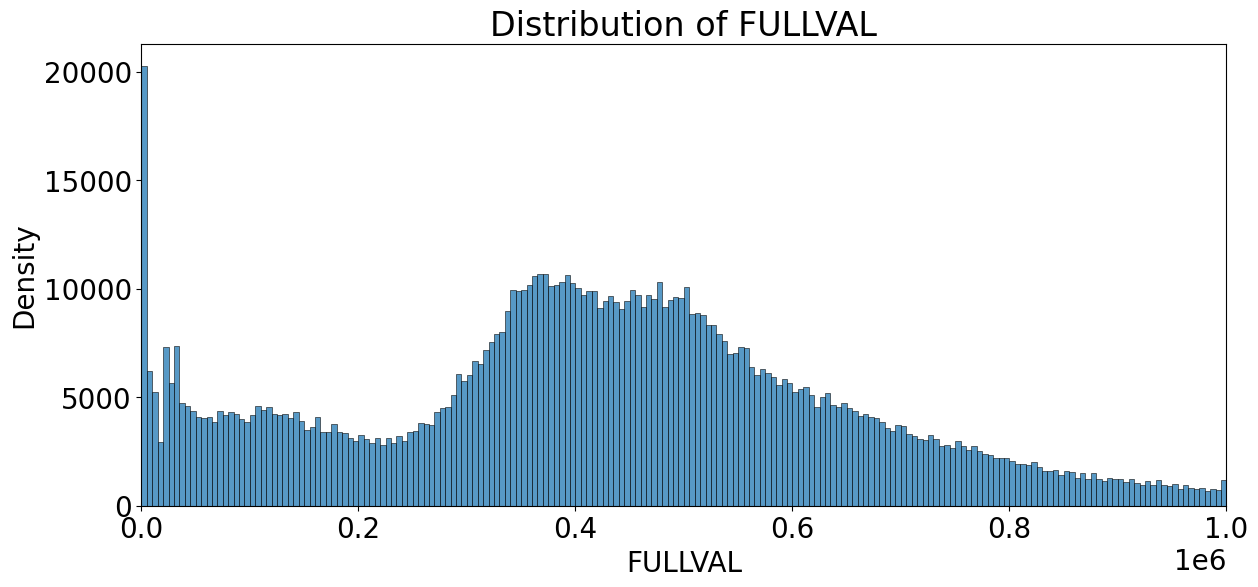

In [94]:
xhigh = 1000000
plt.xlim(0,xhigh)
temp = data[data['FULLVAL'] <= xhigh]
sns.histplot(temp['FULLVAL'],bins = 200, kde = False)

plt.xlabel('FULLVAL')
plt.ylabel('Density')
plt.title('Distribution of FULLVAL')

plt.show()

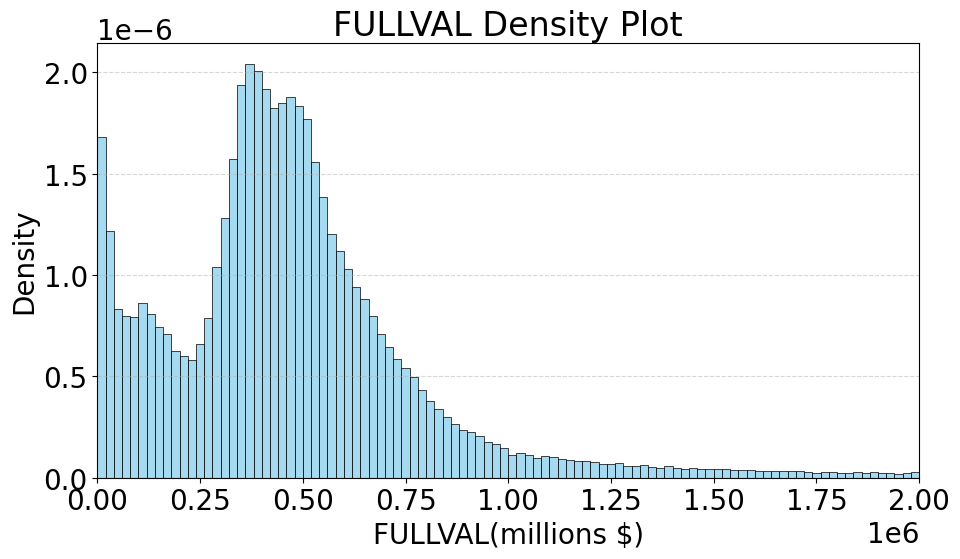

In [95]:
#nitya plot fullval

import matplotlib.pyplot as plt
import seaborn as sns

xhigh = 2_000_000
plt.figure(figsize=(10, 6))

# Filter data and plot density
temp = data[data['FULLVAL'] <= xhigh]
sns.histplot(
    temp['FULLVAL'],
    bins=100,
    stat='density',  # ✅ normalize to density
    color='skyblue',
    edgecolor='black'
)

plt.xlim(0, xhigh)
plt.xlabel('FULLVAL(millions $)')
plt.ylabel('Density')
plt.title('FULLVAL Density Plot')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



## AVLAND

In [96]:
len(data['AVLAND'].unique())

70921

In [97]:
data['AVLAND'].count() * 100 / numrecords

100.0

In [98]:
data['AVLAND'].value_counts()

AVLAND
0.00         13009
45000.00      1229
90000.00       999
3045.00        873
22500.00       847
             ...  
154173.00        1
156679.00        1
165453.00        1
100276.00        1
344695.00        1
Name: count, Length: 70921, dtype: int64

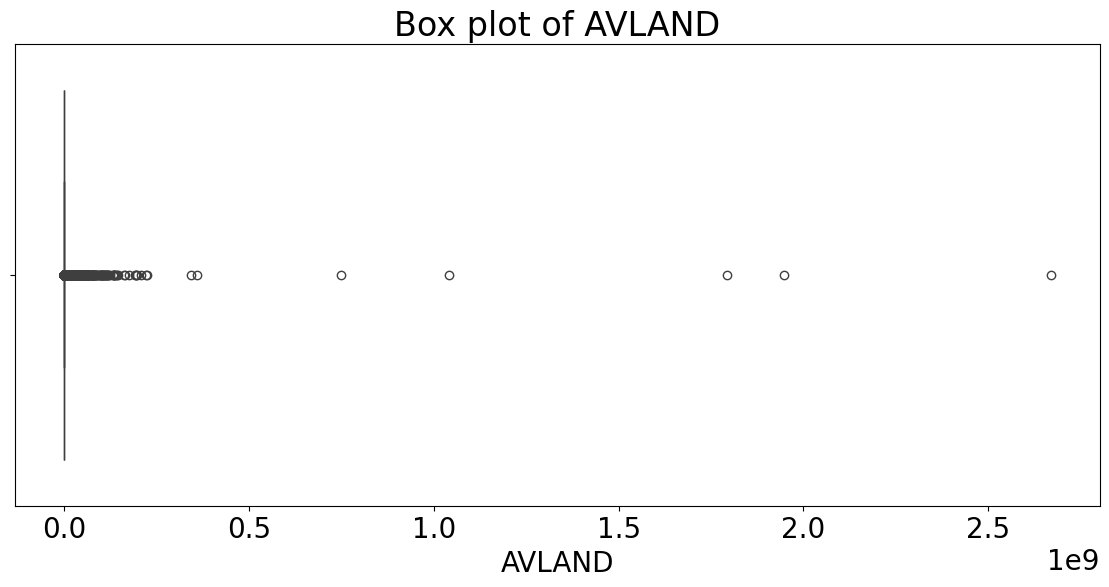

In [99]:
sns.boxplot(x = 'AVLAND', data = data)

plt.xlabel('AVLAND')
plt.title('Box plot of AVLAND')

plt.show()

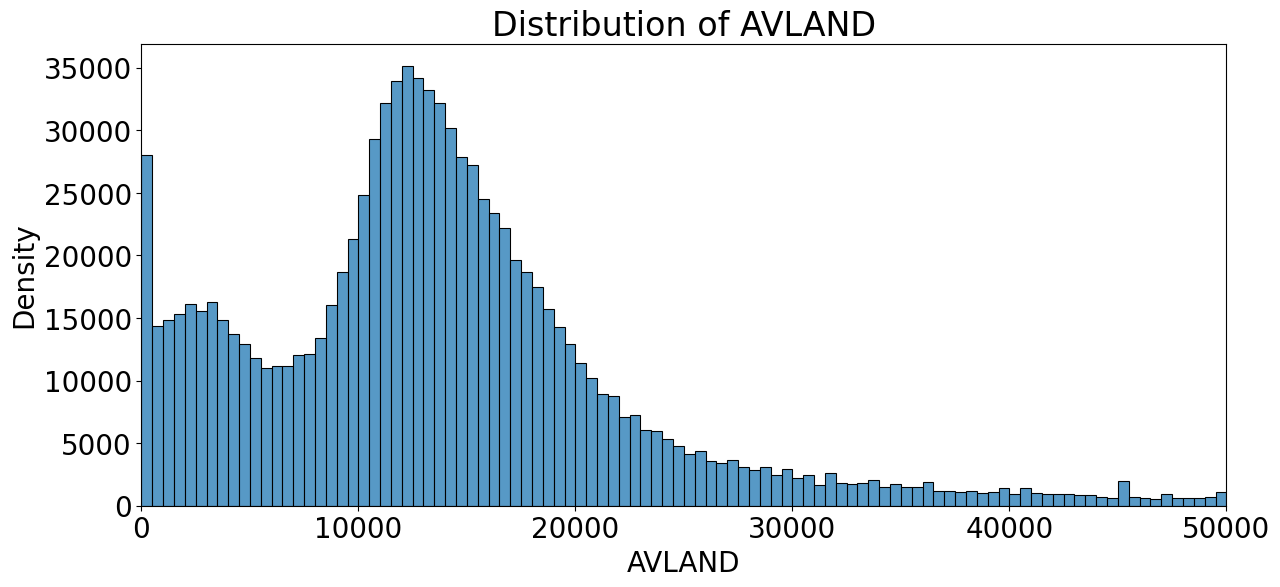

<Figure size 1400x600 with 0 Axes>

In [100]:
xhigh = 50000
plt.xlim(0, xhigh)
temp = data[data['AVLAND'] <= xhigh]
sns.histplot(temp['AVLAND'],bins=100, kde = False)

plt.xlabel('AVLAND')
plt.ylabel('Density')
plt.title('Distribution of AVLAND')

plt.show()
plt.savefig('AVLAND')

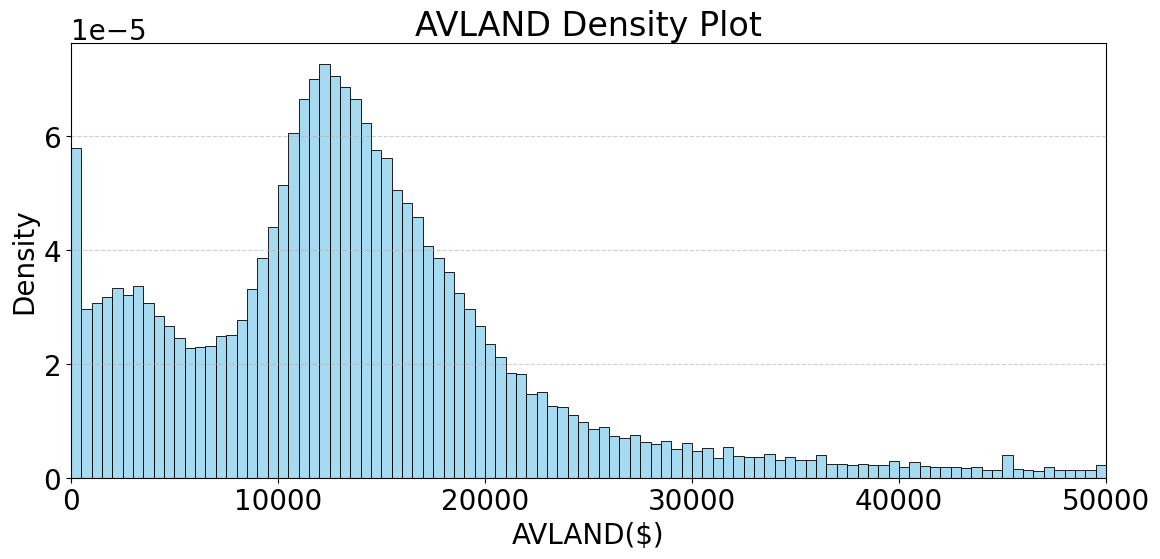

In [101]:
#nitya plot avland


import matplotlib.pyplot as plt
import seaborn as sns

# Set upper limit to remove extreme outliers
xhigh = 50000
filtered_data = data[data['AVLAND'] <= xhigh]

plt.figure(figsize=(12, 6))

# Plot normalized histogram with KDE
sns.histplot(
    filtered_data['AVLAND'],
    bins=100,
    stat='density',  # ✅ normalize to density
    color='skyblue',
    edgecolor='black'
)

plt.xlim(0, xhigh)
plt.xlabel('AVLAND($)')
plt.ylabel('Density')
plt.title('AVLAND Density Plot')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## AVTOT

In [102]:
len(data['AVTOT'].unique())

112914

In [103]:
data['AVTOT'].count() * 100 / numrecords

100.0

In [104]:
data['AVTOT'].value_counts()

AVTOT
0.00         13007
16588.00      3129
17914.00      2989
18973.00      2457
19780.00      2450
             ...  
156638.00        1
251640.00        1
100678.00        1
458136.00        1
5601.00          1
Name: count, Length: 112914, dtype: int64

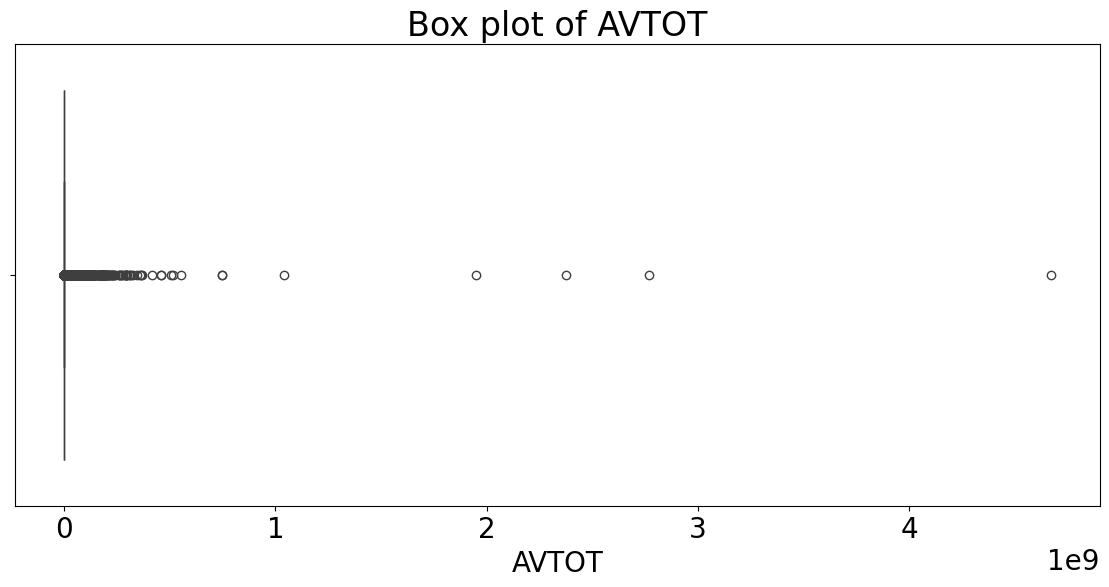

In [105]:
sns.boxplot(x = 'AVTOT', data = data)

plt.xlabel('AVTOT')
plt.title('Box plot of AVTOT')

plt.show()

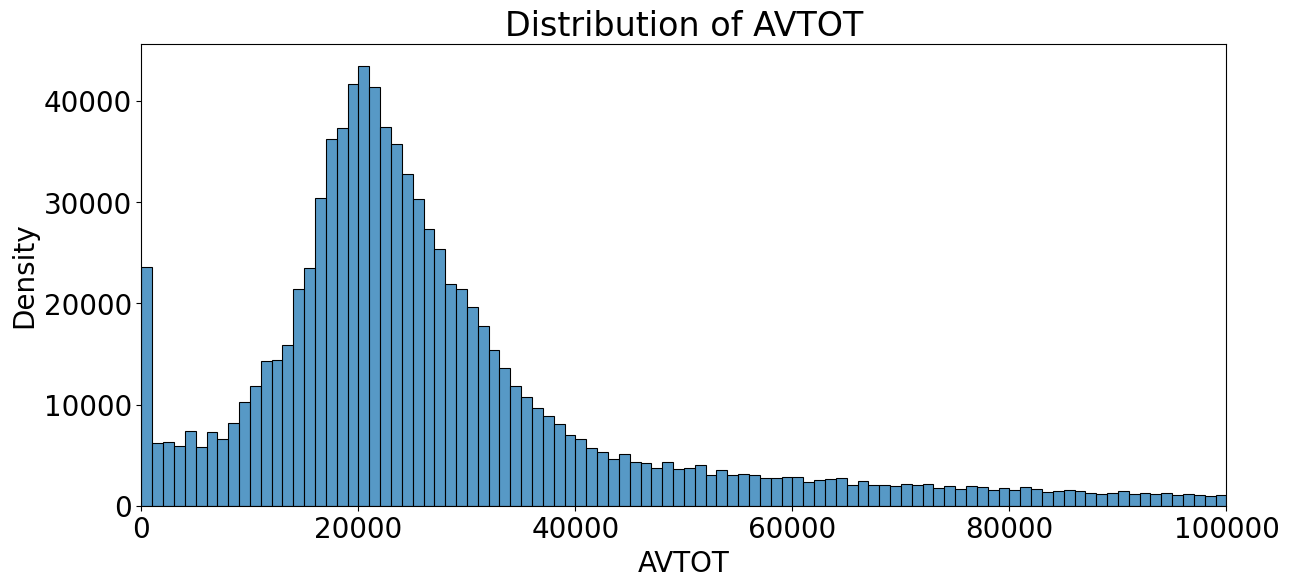

<Figure size 1400x600 with 0 Axes>

In [106]:
xhigh = 100000
plt.xlim(0, xhigh)
temp = data[data['AVTOT'] <= xhigh]
sns.histplot(temp['AVTOT'],bins = 100, kde = False)

plt.xlabel('AVTOT')
plt.ylabel('Density')
plt.title('Distribution of AVTOT')

plt.show()
plt.savefig('AVTOT')

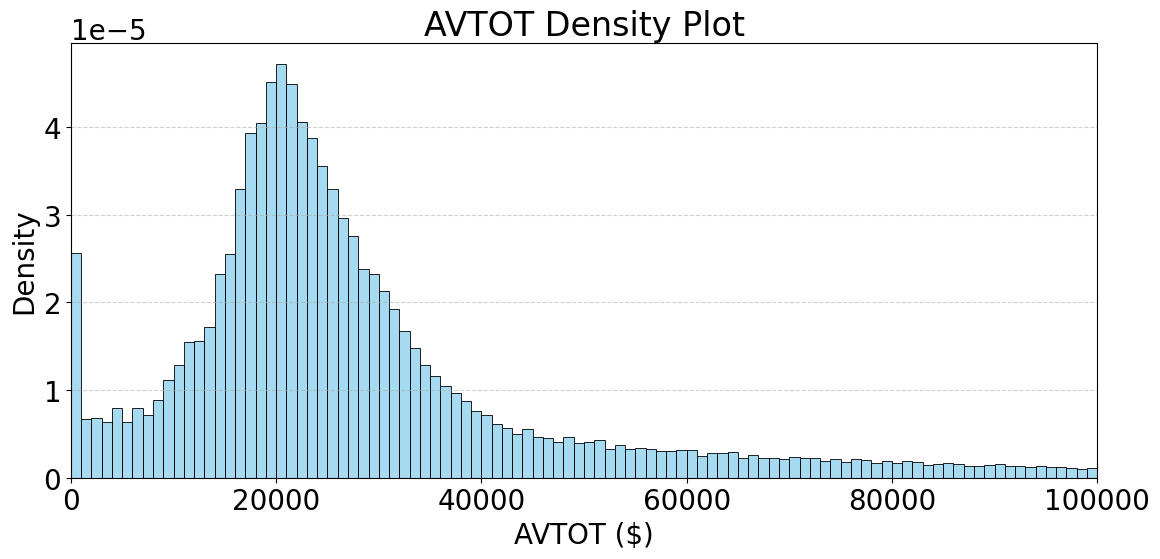

In [107]:
#nitya plot avtot

import matplotlib.pyplot as plt
import seaborn as sns

# Filter to focus on the main body of data
xhigh = 100000
filtered_data = data[data['AVTOT'] <= xhigh]

plt.figure(figsize=(12, 6))

# Plot histogram with density normalization and KDE overlay
sns.histplot(
    filtered_data['AVTOT'],
    bins=100,
    stat='density',   # ✅ Use density instead of count
    color='skyblue',
    edgecolor='black'
)

plt.xlim(0, xhigh)
plt.xlabel('AVTOT ($)')
plt.ylabel('Density')
plt.title('AVTOT Density Plot')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## EXLAND

In [108]:
len(data['EXLAND'].unique())

33419

In [109]:
data['EXLAND'].count() * 100 / numrecords

100.0

In [110]:
data['EXLAND'].value_counts()

EXLAND
0.00           491699
1620.00        357182
2090.00         31112
3240.00         21519
5760.00          3560
                ...  
241020.00           1
28170000.00         1
25353000.00         1
5895900.00          1
39735000.00         1
Name: count, Length: 33419, dtype: int64

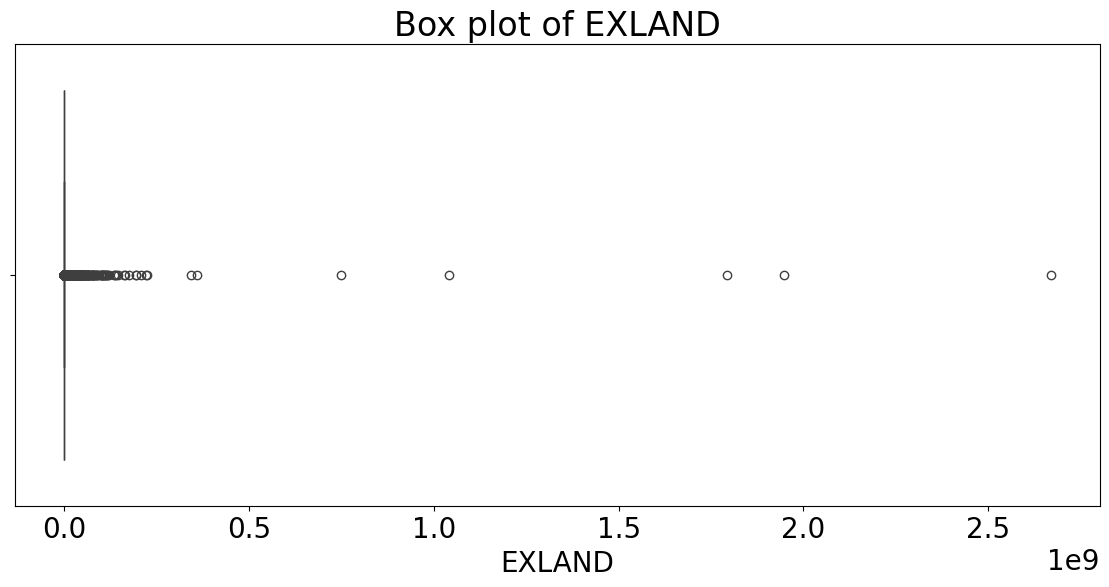

In [111]:
sns.boxplot(x = 'EXLAND', data = data)

plt.xlabel('EXLAND')
plt.title('Box plot of EXLAND')

plt.show()

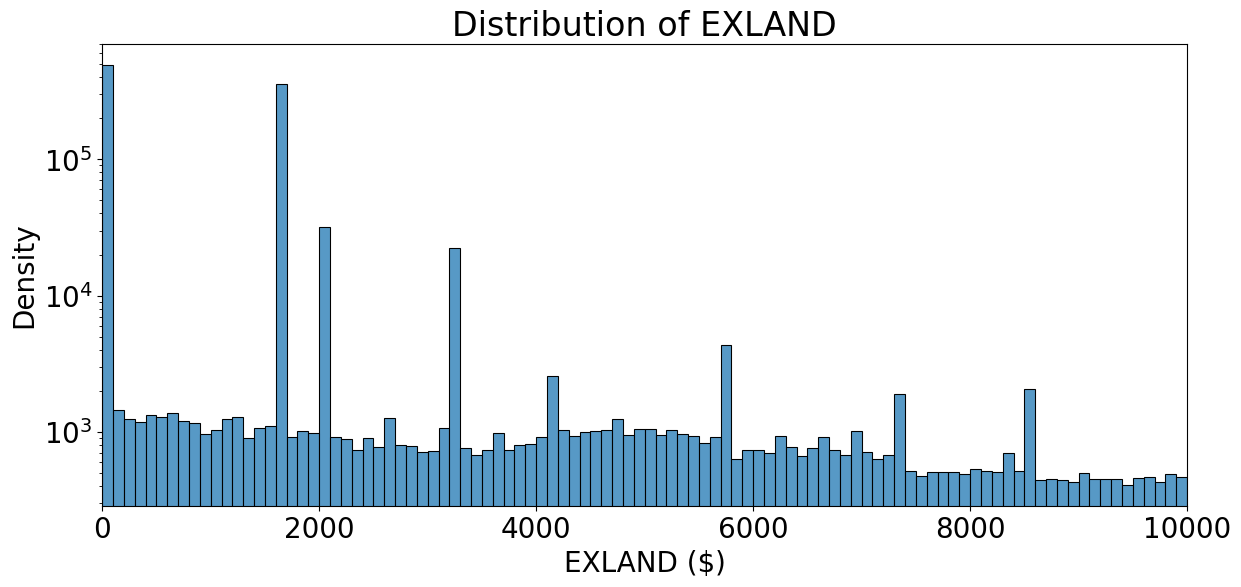

<Figure size 1400x600 with 0 Axes>

In [112]:
xhigh = 10000
plt.xlim(0, xhigh)
temp = data[data['EXLAND'] <= xhigh]
sns.histplot(temp['EXLAND'],bins = 100, kde = False)

plt.yscale('log')
plt.xlabel('EXLAND ($)')
plt.ylabel('Density')
plt.title('Distribution of EXLAND')
plt.show()
plt.savefig('EXLAND')

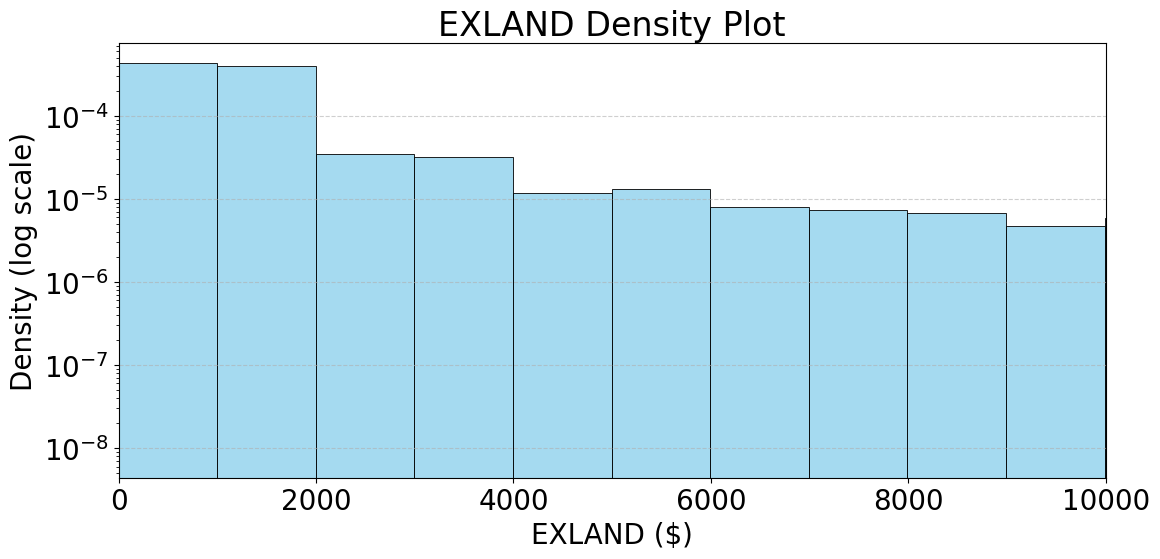

In [113]:
#nitya plot exland

from matplotlib import pyplot as plt
from matplotlib.scale import FuncScale
import numpy as np

plt.figure(figsize=(12, 6))

sns.histplot(
    filtered_data['EXLAND'],
    bins=100,
    stat='density',
    color='skyblue',
    edgecolor='black'
)

plt.xlim(0, 10000)
plt.yscale('log')  
plt.xlabel('EXLAND ($)')
plt.ylabel('Density (log scale)')
plt.title('EXLAND Density Plot')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## EXTOT

In [114]:
len(data['EXTOT'].unique())

64255

In [115]:
data['EXTOT'].count() * 100 / numrecords

100.0

In [116]:
data['EXTOT'].value_counts()

EXTOT
0.00          432572
1620.00       354880
2090.00        30069
3240.00        21803
5760.00         3549
               ...  
24724.00           1
26377.00           1
1640250.00         1
25434.00           1
36118.00           1
Name: count, Length: 64255, dtype: int64

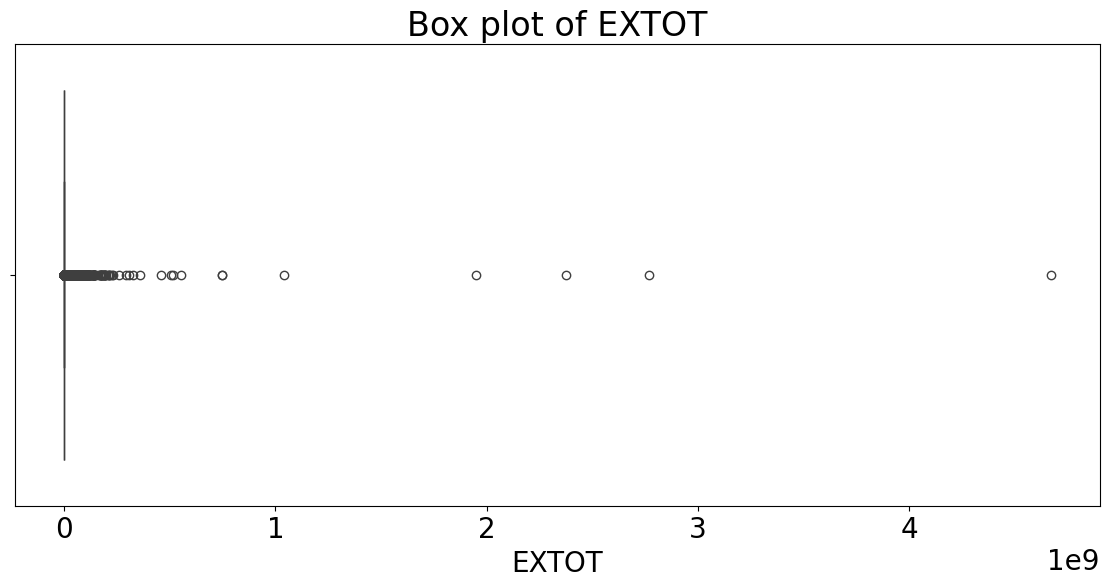

In [117]:
sns.boxplot(x = 'EXTOT', data = data)

plt.xlabel('EXTOT')
plt.title('Box plot of EXTOT')

plt.show()

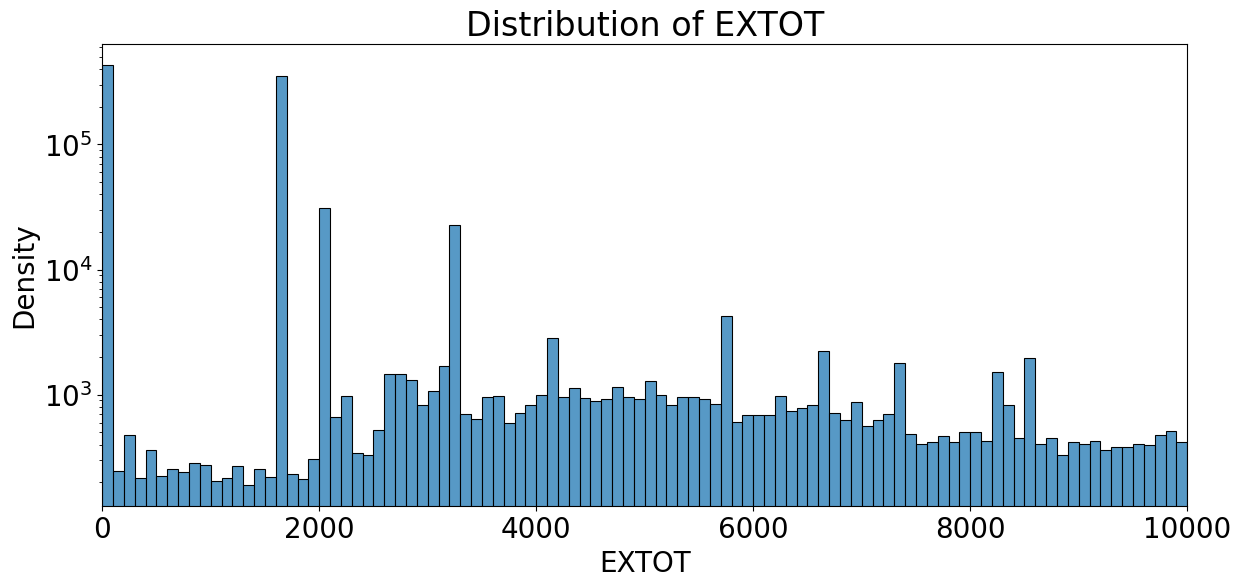

<Figure size 1400x600 with 0 Axes>

In [118]:
xhigh = 10000
plt.xlim(0, xhigh)
temp = data[data['EXTOT'] <= xhigh]
sns.histplot(temp['EXTOT'],bins = 100, kde = False)

plt.yscale('log')
plt.xlabel('EXTOT')
plt.ylabel('Density')
plt.title('Distribution of EXTOT')
plt.show()
plt.savefig('EXTOT')

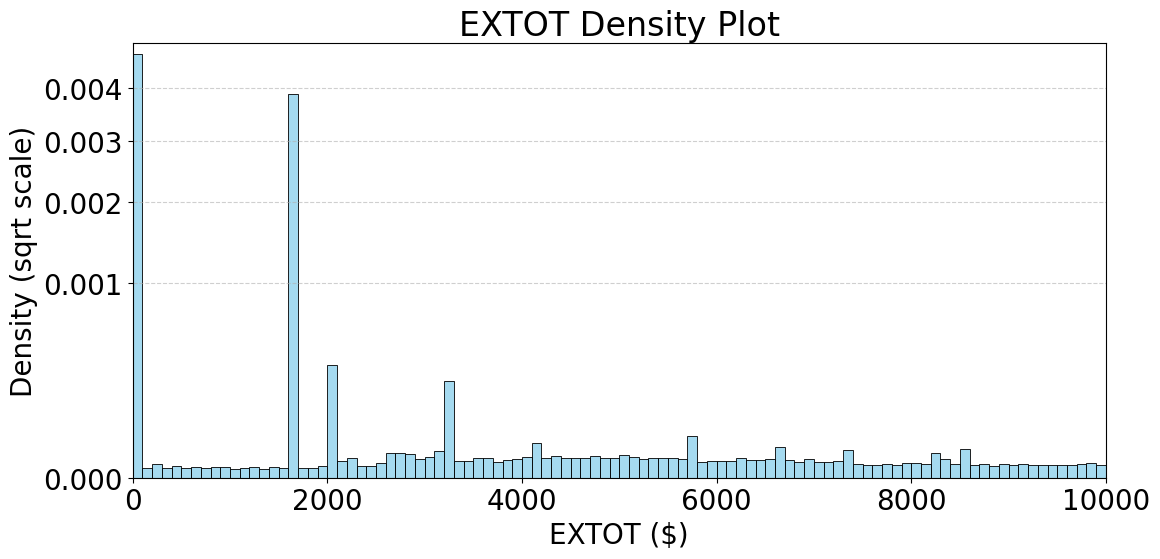

In [119]:
#nitys plot extot

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

xhigh = 10000
filtered_data = data[data['EXTOT'] <= xhigh]

plt.figure(figsize=(12, 6))

# Density-normalized histogram
sns.histplot(
    filtered_data['EXTOT'],
    bins=100,
    stat='density',
    color='skyblue',
    edgecolor='black'
)

plt.xlim(0, xhigh)

# ✅ Choose one y-scale depending on what you prefer:
#plt.yscale('log')  # For long tails, more aggressive
# OR
plt.yscale('function', functions=(np.sqrt, lambda x: x**2))  # Gentler alternative

plt.xlabel('EXTOT ($)')
plt.ylabel('Density (sqrt scale)')
plt.title('EXTOT Density Plot')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## EXCD1

In [120]:
len(data['EXCD1'].unique())

130

In [121]:
data['EXCD1'].count() * 100 / numrecords

59.616393742635346

In [122]:
data['EXCD1'].value_counts()

EXCD1
1017.00    425348
1010.00     49756
1015.00     31323
5113.00     23858
1920.00     17594
            ...  
1562.00         1
1992.00         1
4650.00         1
1841.00         1
1606.00         1
Name: count, Length: 129, dtype: int64

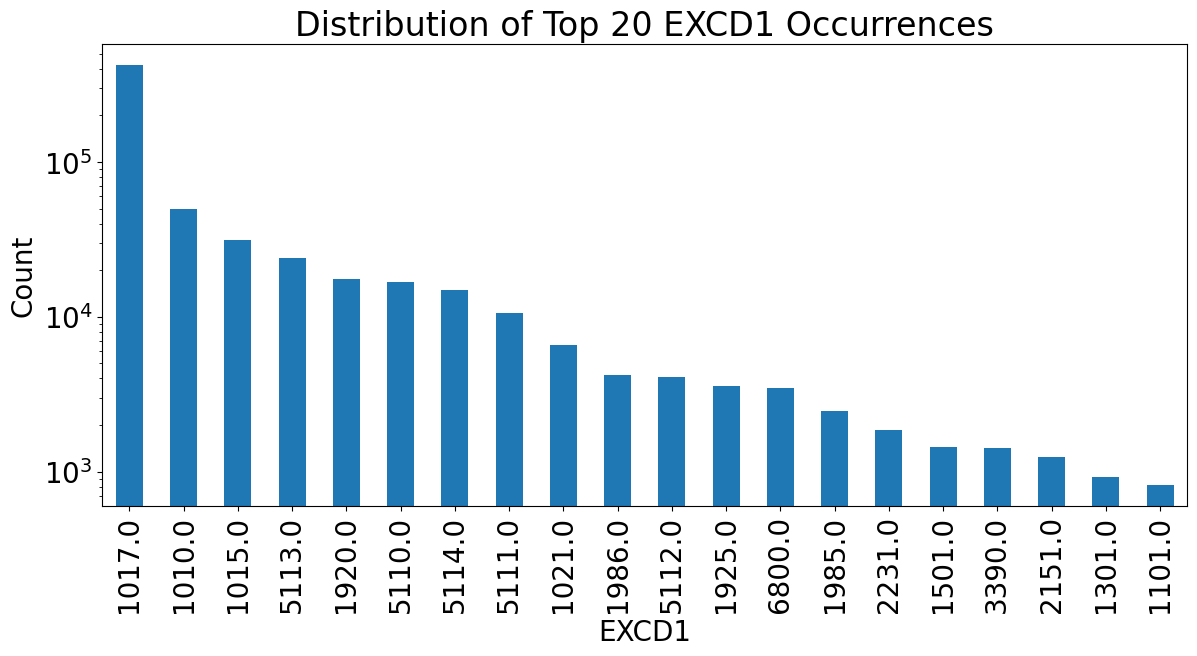

In [123]:
data['EXCD1'].value_counts().head(20).plot(kind = 'bar')
plt.yscale('log')

plt.xlabel('EXCD1')
plt.ylabel('Count')
plt.title('Distribution of Top 20 EXCD1 Occurrences')

plt.savefig('EXCD1')

In [201]:
data['EXCD1'].dtypes

dtype('float64')

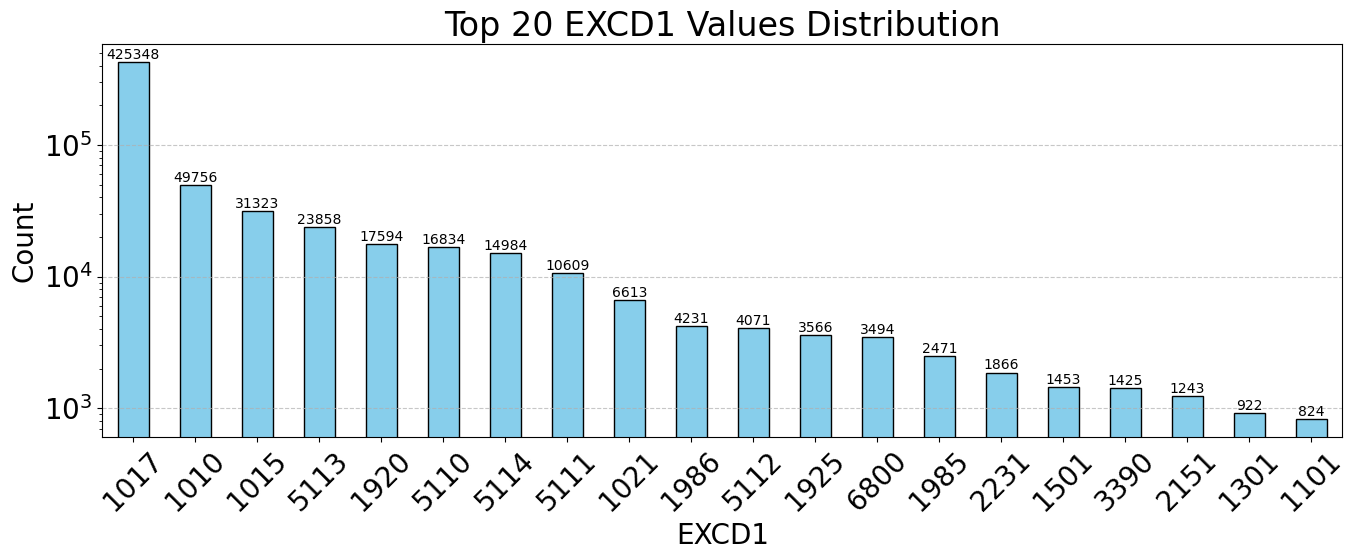

In [203]:
top_20_excd1 = data['EXCD1'].value_counts().head(20)

# Plot
ax = top_20_excd1.plot(kind='bar', color='skyblue', edgecolor='black')

# Add count labels
for i, v in enumerate(top_20_excd1):
    ax.text(i, v + 0.5, str(int(round(v))), ha='center', va='bottom', fontsize=10)

# Fix x-tick labels to show actual EXCD1 codes
ax.set_xticklabels(top_20_excd1.index.astype(int), rotation=45)

# Log scale and other formatting
plt.yscale('log')
plt.xlabel('EXCD1')
plt.ylabel('Count')
plt.title('Top 20 EXCD1 Values Distribution')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()



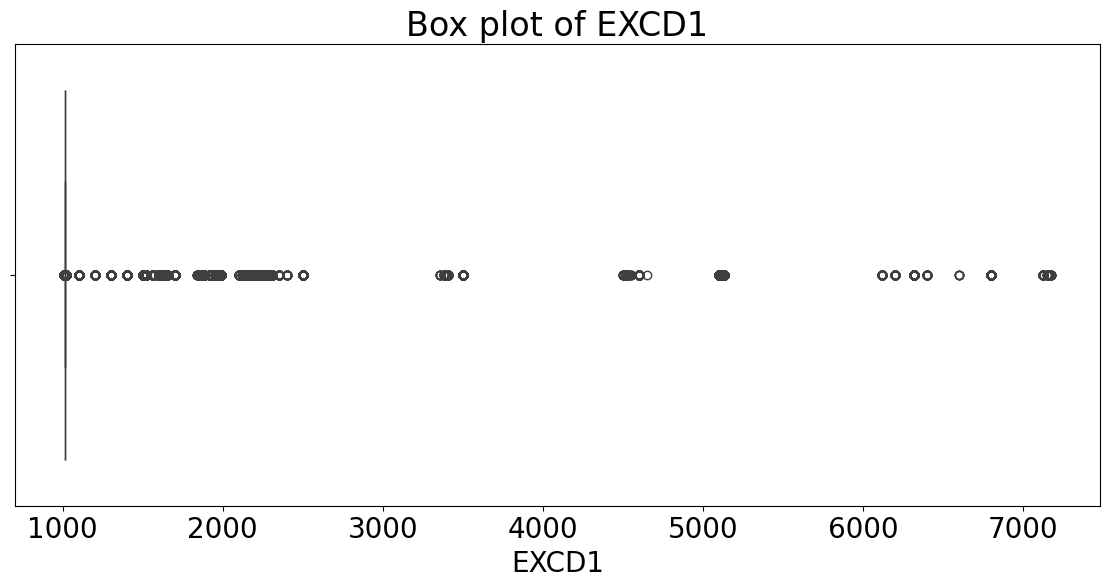

In [124]:
sns.boxplot(x = 'EXCD1', data = data)

plt.xlabel('EXCD1')
plt.title('Box plot of EXCD1')

plt.show()

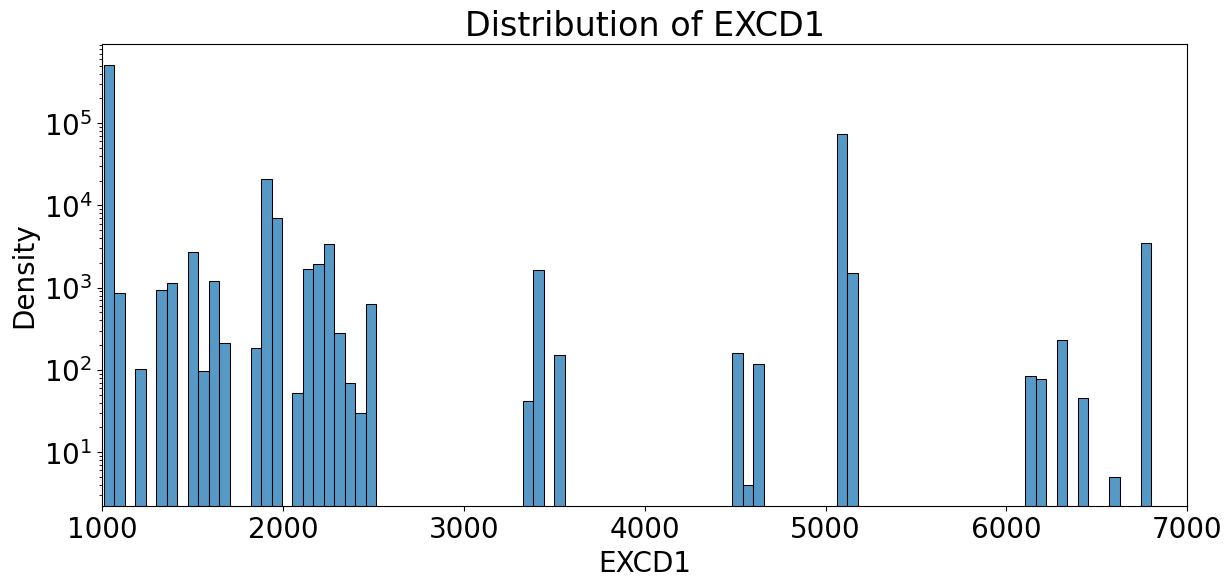

In [125]:
xhigh = 7000
plt.xlim(1000, xhigh)
temp = data[data['EXCD1'] <= xhigh]
sns.histplot(temp['EXCD1'],bins = 100, kde = False)

plt.yscale('log')
plt.xlabel('EXCD1')
plt.ylabel('Density')
plt.title('Distribution of EXCD1')
plt.show()

## STADDR

In [126]:
len(data['STADDR'].unique())

839281

In [127]:
data['STADDR'].count() * 100 / numrecords

99.93688106562689

In [128]:
data['STADDR'].value_counts()

STADDR
501 SURF AVENUE       902
330 EAST 38 STREET    817
322 WEST 57 STREET    720
155 WEST 68 STREET    671
20 WEST 64 STREET     657
                     ... 
1355 55 STREET          1
1353 55 STREET          1
1351 55 STREET          1
1349 55 STREET          1
5404 14 AVENUE          1
Name: count, Length: 839280, dtype: int64

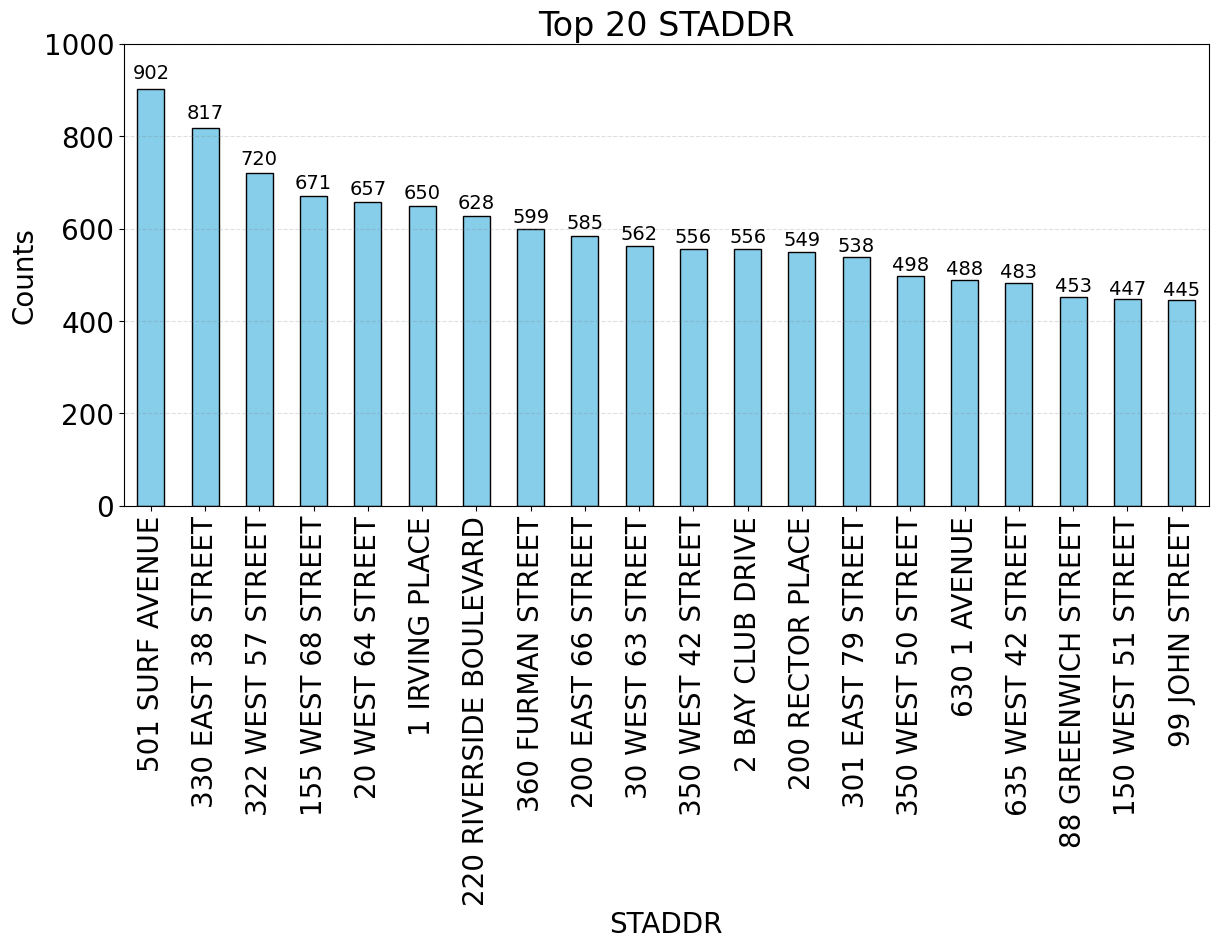

In [204]:
# Generate the bar plot
counts = data['STADDR'].value_counts().head(20)
ax = counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xticks(rotation=90)
plt.ylim(0, 1000)

# Add number labels to the top of each column
for i, v in enumerate(counts):
    ax.text(i, v * 1.025, str(v), color='black', ha='center', fontsize=14)

# Set titles for the graph and axes
plt.title('Top 20 STADDR')
plt.xlabel('STADDR')
plt.ylabel('Counts', rotation=90)
ax.grid(True, axis='y', linestyle='--', which='major', color='grey', alpha=.25)

plt.savefig('STADDR')

## ZIP

In [130]:
len(data['ZIP'].unique())

197

In [131]:
data['ZIP'].count() * 100 / numrecords

97.20913469169761

In [132]:
data['ZIP'].value_counts()

ZIP
10314.00    24606
11234.00    20001
10312.00    18127
10462.00    16905
10306.00    16578
            ...  
11371.00        1
11352.00        1
11359.00        1
11241.00        1
11005.00        1
Name: count, Length: 196, dtype: int64

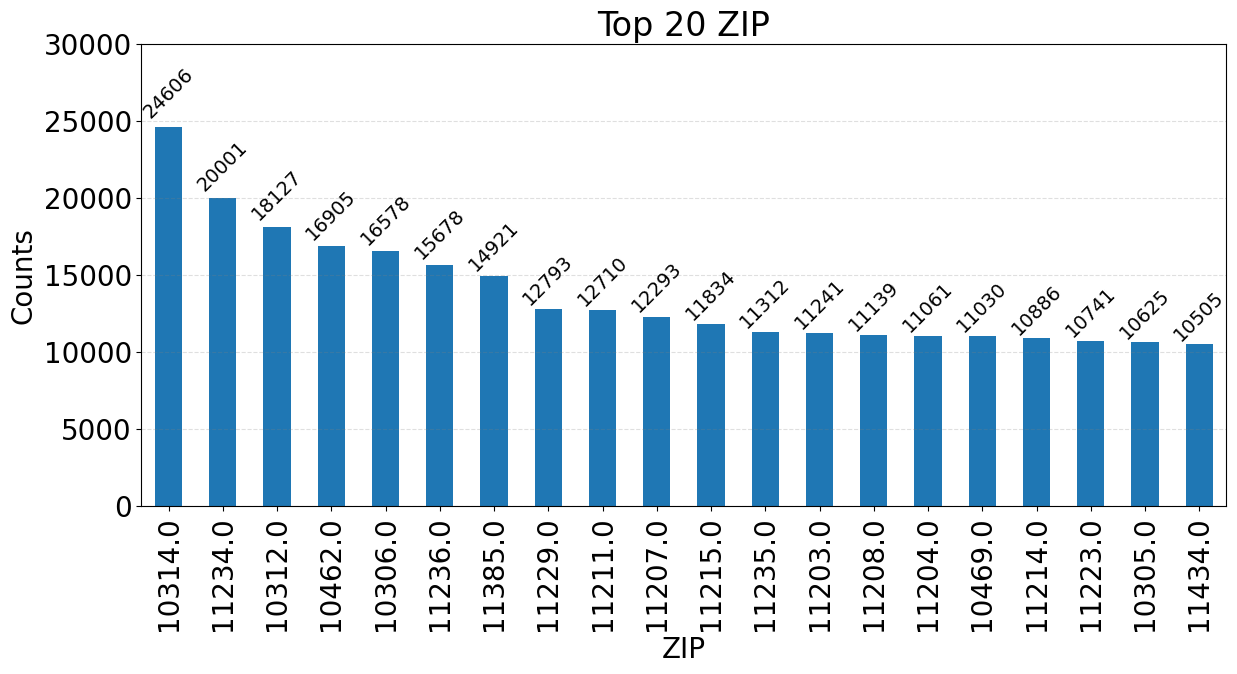

In [133]:
# Generate the bar plot
# fig = plt.figure(figsize=(18, 10))
counts = data['ZIP'].value_counts().head(20)
ax = counts.plot(kind='bar')
plt.xticks(rotation=90)
plt.ylim(0,30000)

# Add number labels to the top of each column
for i, v in enumerate(counts):
    ax.text(i, v*1.025, str(v), color='black', ha='center', fontsize=14, rotation=45)

# Set titles for the graph and axes
plt.title('Top 20 ZIP')
plt.xlabel('ZIP')
plt.ylabel('Counts', rotation=90)
ax.grid(True, axis='y', linestyle='--', which='major', color='grey', alpha=.25)

plt.savefig('ZIP')

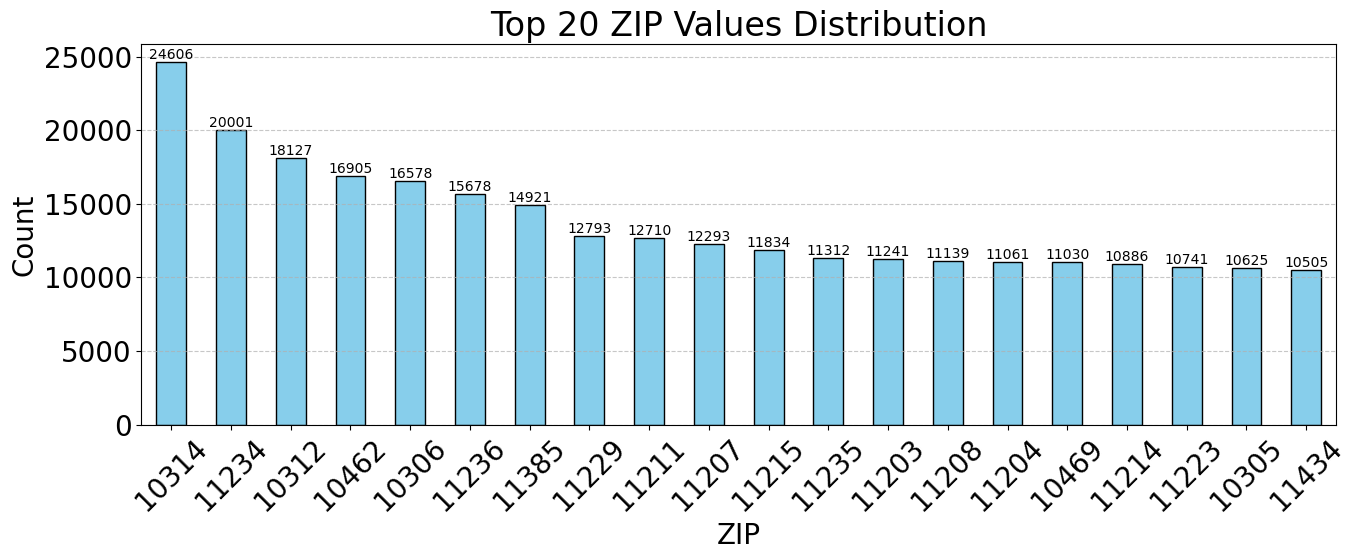

In [211]:
top_20_zip = data['ZIP'].value_counts().head(20)

# Plot
ax = top_20_zip.plot(kind='bar', color='skyblue', edgecolor='black')

# Add count labels
for i, v in enumerate(top_20_zip):
    ax.text(i, v + 0.5, str(int(round(v))), ha='center', va='bottom', fontsize=10)

# Fix x-tick labels to show actual zip codes
ax.set_xticklabels(top_20_zip.index.astype(int), rotation=45)

# Log scale and other formatting
plt.xlabel('ZIP')
plt.ylabel('Count')
plt.title('Top 20 ZIP Values Distribution')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


## EXMPTCL

In [134]:
len(data['EXMPTCL'].unique())

15

In [135]:
data['EXMPTCL'].count() * 100 / numrecords

1.4546299979271593

In [136]:
data['EXMPTCL'].value_counts()

EXMPTCL
X1    6912
X5    5208
X7     820
X2     770
X6     764
X4     441
X8     292
X3     259
X9     108
VI       1
KI       1
A9       1
R4       1
5        1
Name: count, dtype: int64

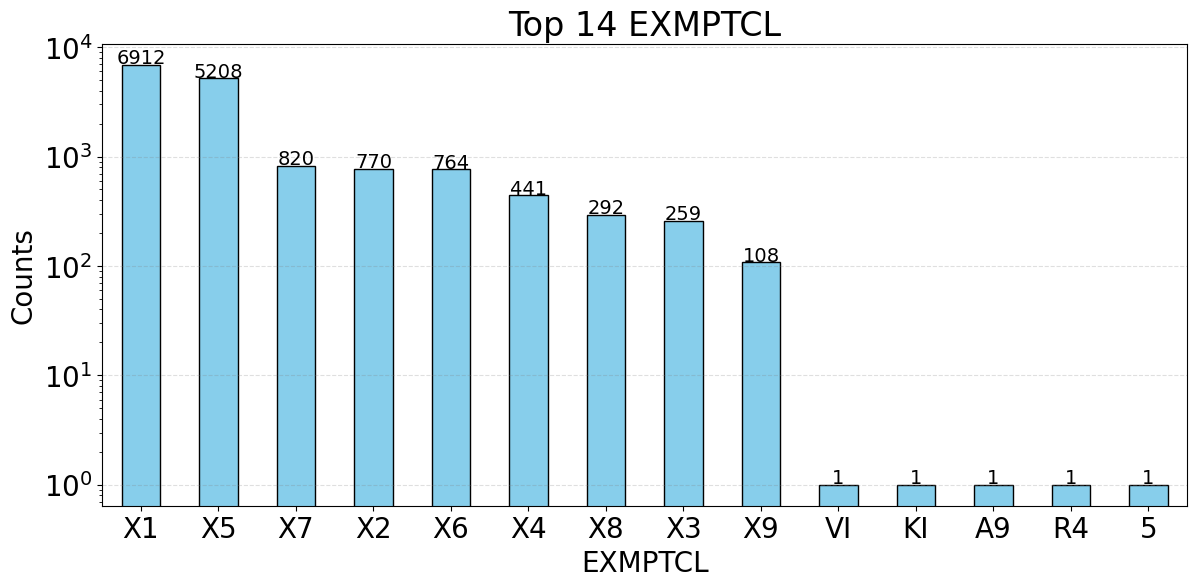

In [208]:
# Generate the bar plot
counts = data['EXMPTCL'].value_counts().head(14)
ax = counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xticks(rotation=0)
plt.yscale('log')

# Add number labels to the top of each column
for i, v in enumerate(counts):
    ax.text(i, v * 1.025, str(v), color='black', ha='center', fontsize=14)

# Set titles for the graph and axes
plt.title('Top 14 EXMPTCL')
plt.xlabel('EXMPTCL')
plt.ylabel('Counts', rotation=90)
ax.grid(True, axis='y', linestyle='--', which='major', color='grey', alpha=.25)

plt.savefig('EXMPTCL')


## BLDFRONT

In [138]:
len(data['BLDFRONT'].unique())

612

In [139]:
data['BLDFRONT'].count() * 100 / numrecords

100.0

In [140]:
data['BLDFRONT'].value_counts()

BLDFRONT
0      228815
20     195101
18      77705
16      74687
25      63684
        ...  
368         1
444         1
468         1
530         1
785         1
Name: count, Length: 612, dtype: int64

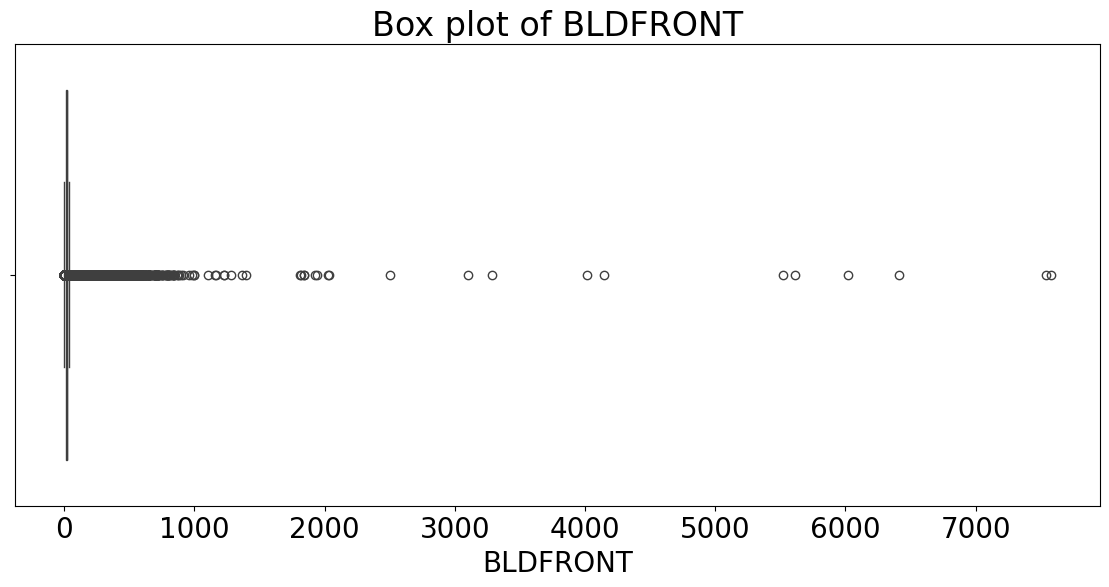

In [141]:
sns.boxplot(x = 'BLDFRONT', data = data)

plt.xlabel('BLDFRONT')
plt.title('Box plot of BLDFRONT')

plt.show()

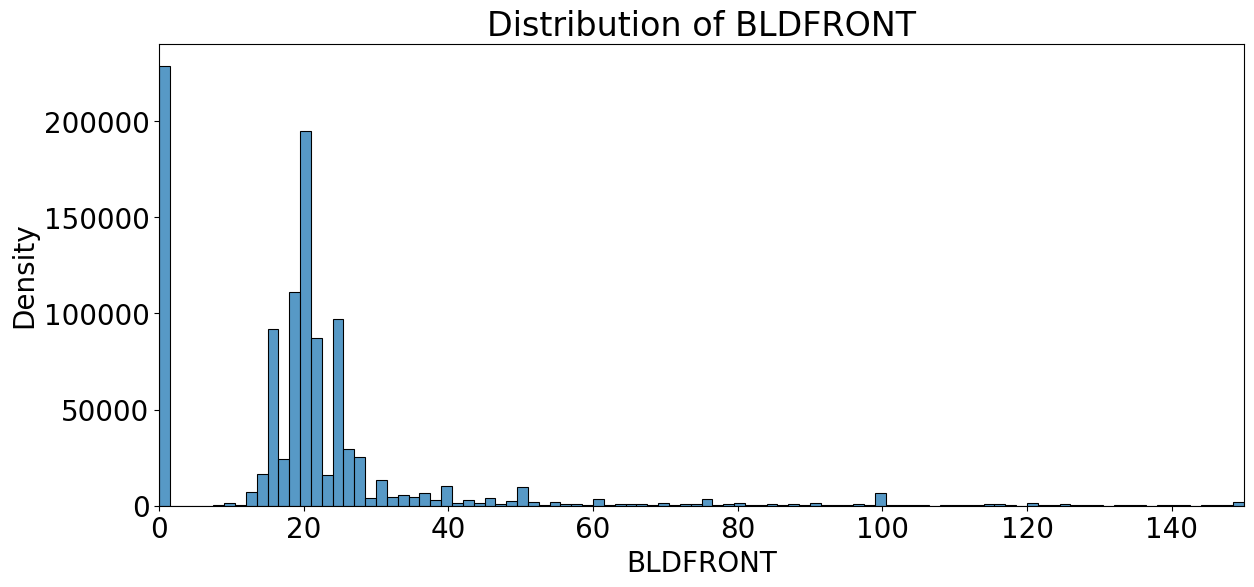

<Figure size 1400x600 with 0 Axes>

In [142]:
# look at the most relevant range
xhigh = 150
plt.xlim(0, xhigh)
temp = data[data['BLDFRONT'] <= xhigh]
sns.histplot(temp['BLDFRONT'],bins = 100, kde = False)

plt.xlabel('BLDFRONT')
plt.ylabel('Density')
plt.title('Distribution of BLDFRONT')
plt.show()
plt.savefig('BLDFRONT')

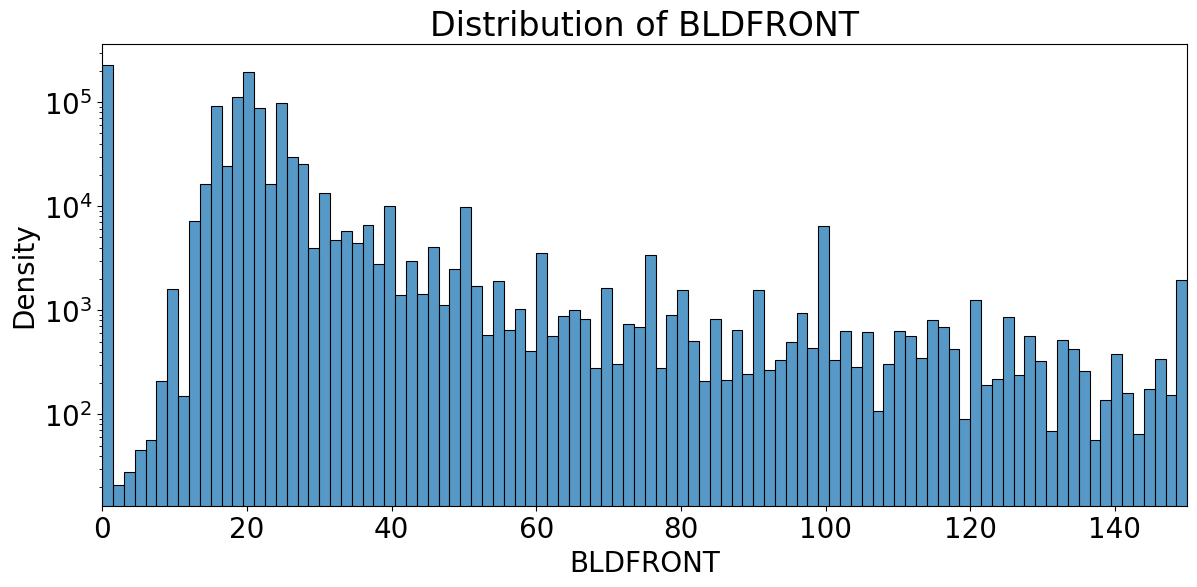

In [143]:
# look at the most relevant range
xhigh = 150
plt.xlim(0, xhigh)
plt.yscale('log')
temp = data[data['BLDFRONT'] <= xhigh]
sns.histplot(temp['BLDFRONT'],bins = 100, kde = False)

plt.xlabel('BLDFRONT')
plt.ylabel('Density')
plt.title('Distribution of BLDFRONT')
plt.show()

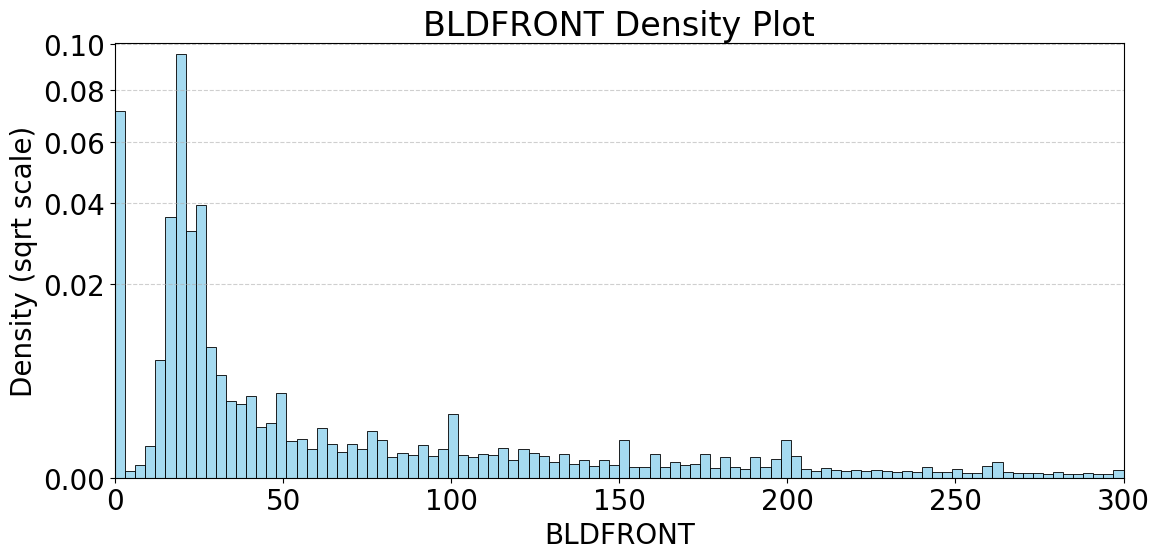

In [144]:
#nitya plot bldfront
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

xhigh = 300
filtered_data = data[data['BLDFRONT'] <= xhigh]

plt.figure(figsize=(12, 6))

sns.histplot(
    filtered_data['BLDFRONT'],
    bins=100,
    stat='density',  # ✅ Correct y-axis to density
    color='skyblue',
    edgecolor='black'
)

plt.xlim(0, xhigh)

# Optional: apply sqrt scale for better balance without flattening
plt.yscale('function', functions=(np.sqrt, lambda x: x**2))

#plt.yscale('log')  # For long tails, more aggressive

plt.xlabel('BLDFRONT')
plt.ylabel('Density (sqrt scale)')
plt.title('BLDFRONT Density Plot')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


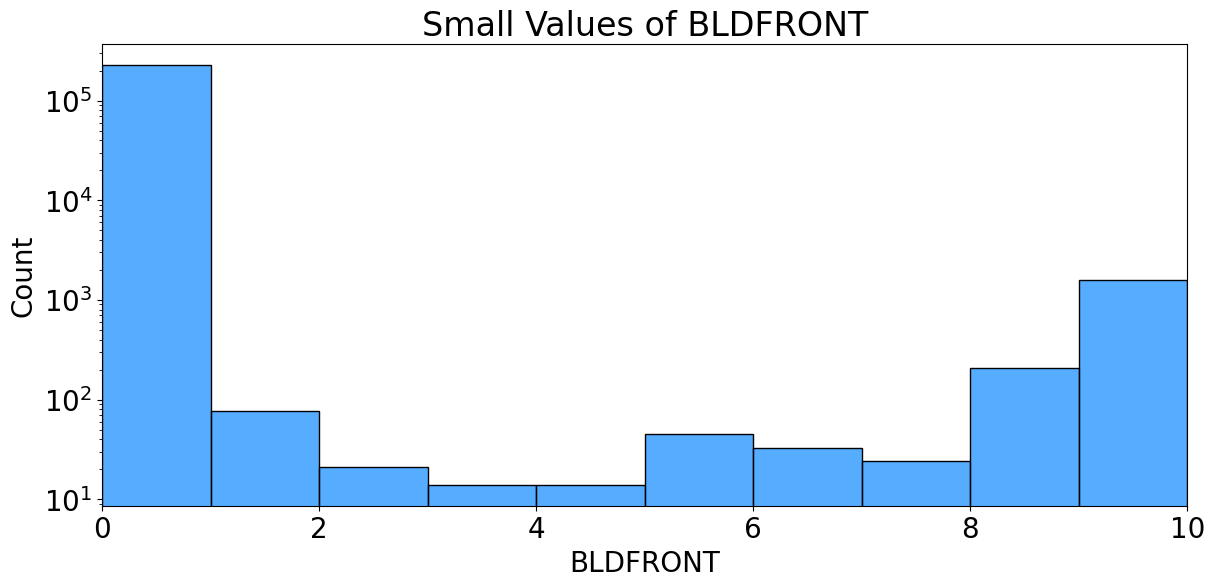

<Figure size 1400x600 with 0 Axes>

In [145]:
# look at the very small sizes, including zeros
xhigh = 10
plt.xlim(0, xhigh)
temp = data[data['BLDFRONT'] <= xhigh]
plt.yscale('log')
sns.histplot(temp['BLDFRONT'], bins = 10, kde = False, color = 'dodgerblue')

plt.xlabel('BLDFRONT')
plt.ylabel('Count')
plt.title('Small Values of BLDFRONT')
plt.show()
plt.savefig('BLDFRONT small')

## BLDDEPTH

In [146]:
len(data['BLDDEPTH'].unique())

621

In [147]:
data['BLDDEPTH'].count() * 100 / numrecords

100.0

In [148]:
data['BLDDEPTH'].value_counts()

BLDDEPTH
0      228853
40      48775
50      45358
45      40670
36      40109
        ...  
447         1
332         1
747         1
503         1
444         1
Name: count, Length: 621, dtype: int64

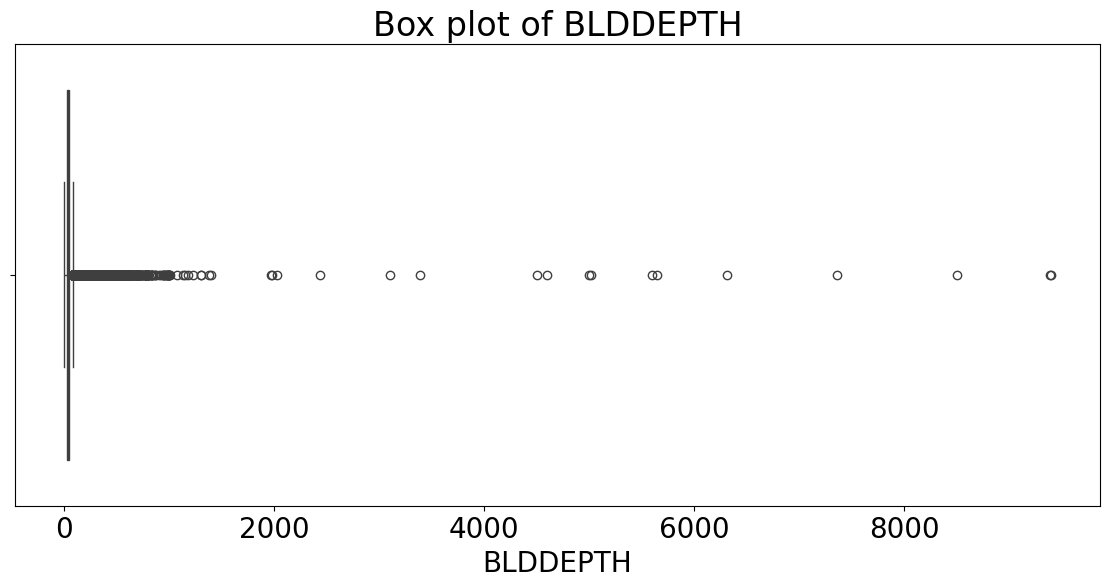

In [149]:
sns.boxplot(x = 'BLDDEPTH', data = data)

plt.xlabel('BLDDEPTH')
plt.title('Box plot of BLDDEPTH')

plt.show()

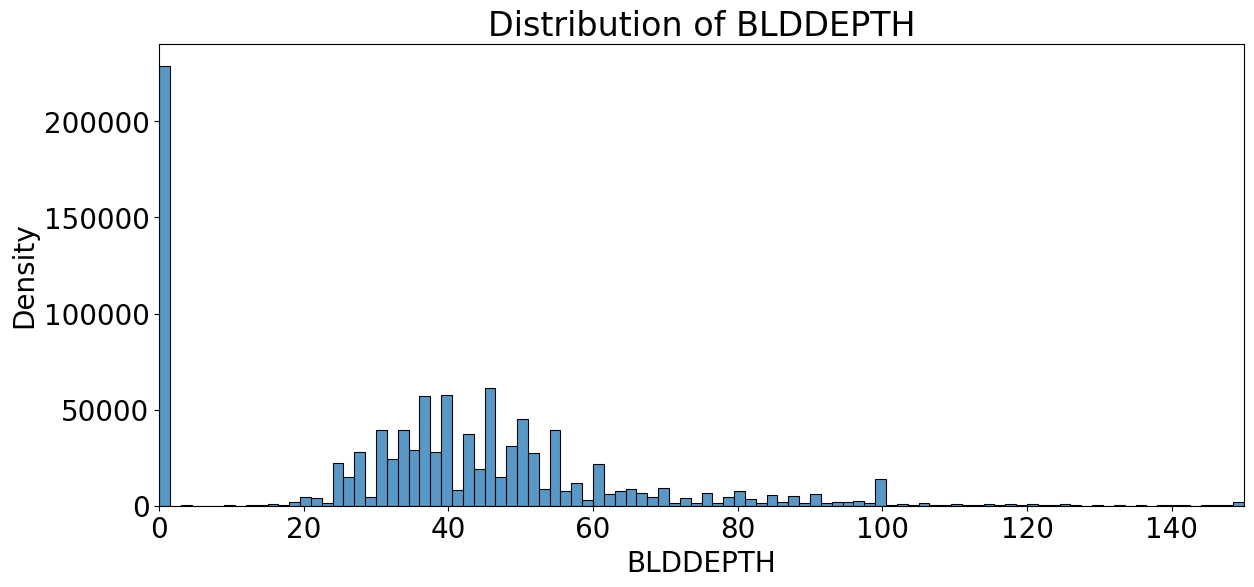

<Figure size 1400x600 with 0 Axes>

In [150]:
# look at the most relevant range
xhigh = 150
plt.xlim(0, xhigh)
temp = data[data['BLDDEPTH'] <= xhigh]
sns.histplot(temp['BLDDEPTH'],bins = 100, kde = False)

plt.xlabel('BLDDEPTH')
plt.ylabel('Density')
plt.title('Distribution of BLDDEPTH')
plt.show()
plt.savefig('BLDDEPTH')

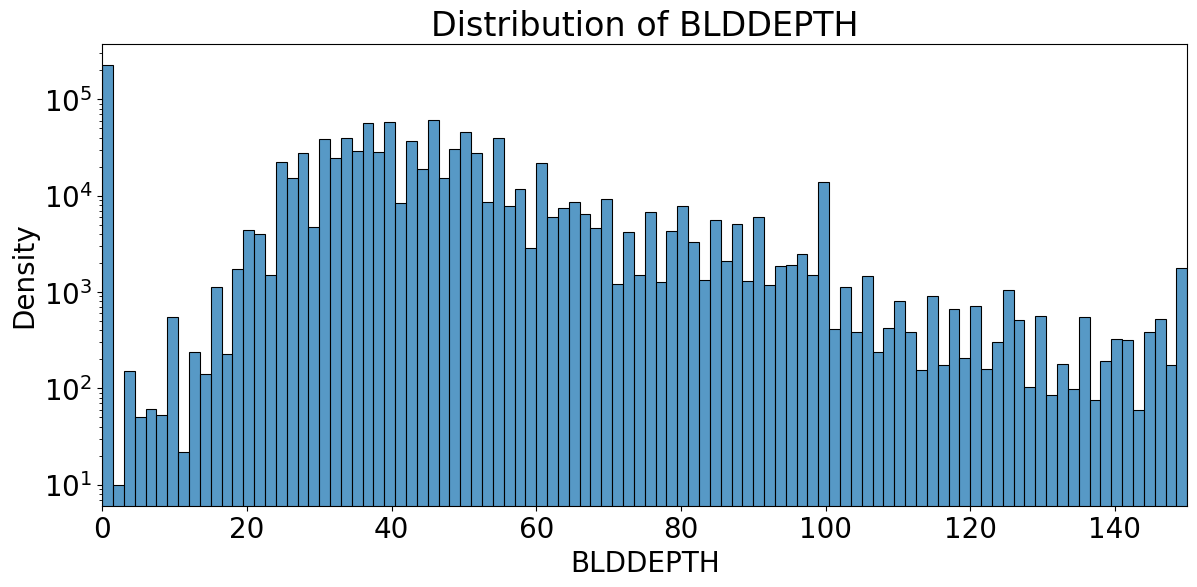

In [151]:
# look at the most relevant range
xhigh = 150
plt.xlim(0, xhigh)
plt.yscale('log')
temp = data[data['BLDDEPTH'] <= xhigh]
sns.histplot(temp['BLDDEPTH'],bins = 100, kde = False)

plt.xlabel('BLDDEPTH')
plt.ylabel('Density')
plt.title('Distribution of BLDDEPTH')
plt.show()

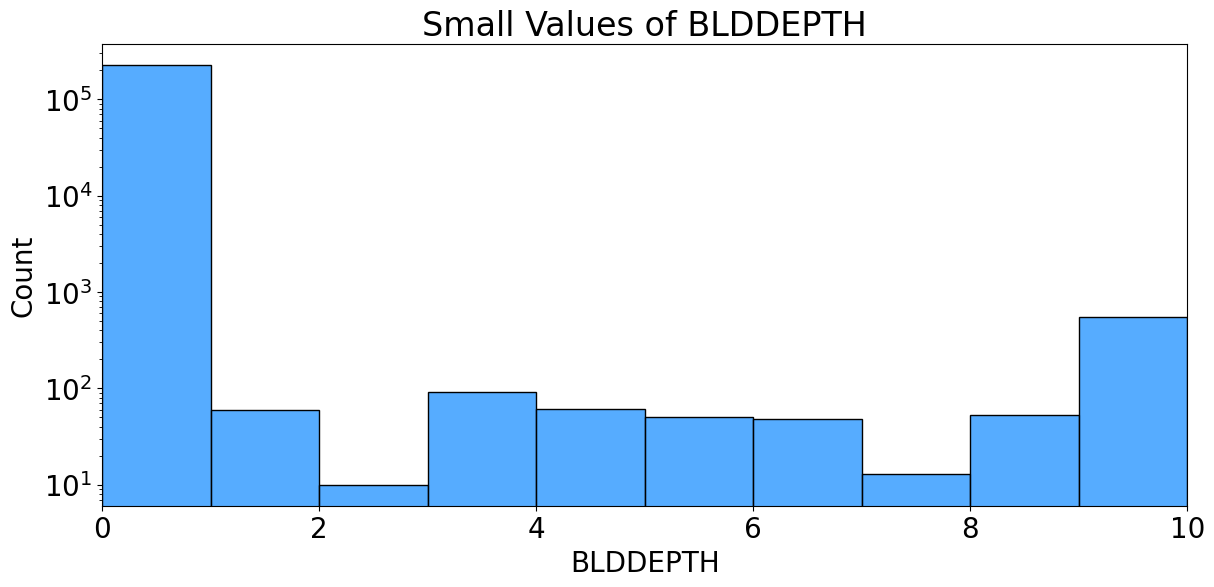

In [152]:
# look at the very small sizes, including zeros
xhigh = 10
plt.xlim(0,xhigh)
temp = data[data['BLDDEPTH'] <= xhigh]
plt.yscale('log')
sns.histplot(temp['BLDDEPTH'], bins = 10, kde = False, color = 'dodgerblue')

plt.xlabel('BLDDEPTH')
plt.ylabel('Count')
plt.title('Small Values of BLDDEPTH')

plt.savefig('BLDDEPTH small')

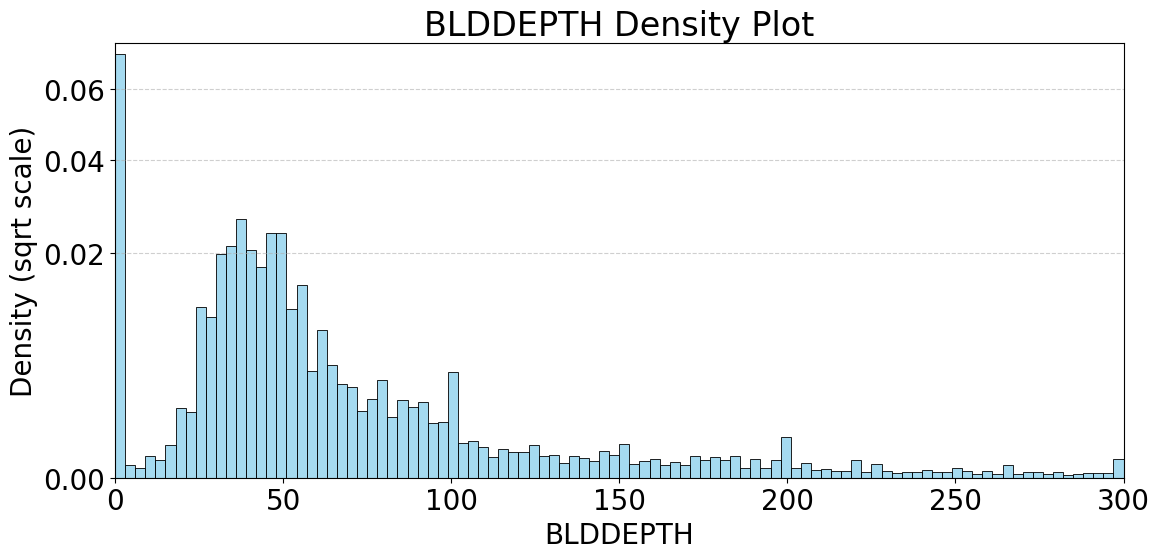

In [153]:
#nitya plot bldfront
xhigh = 300
#xhigh = data['BLDDEPTH'].quantile(0.99)

filtered_data = data[data['BLDDEPTH'] <= xhigh]

plt.figure(figsize=(12, 6))
sns.histplot(
    filtered_data['BLDDEPTH'],
    bins=100,
    stat='density',
    color='skyblue',
    edgecolor='black'
)

plt.yscale('function', functions=(np.sqrt, lambda x: x**2))

plt.xlim(0, xhigh)
plt.xlabel('BLDDEPTH')
plt.ylabel('Density (sqrt scale)')
plt.title('BLDDEPTH Density Plot')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## AVLAND2

In [154]:
len(data['AVLAND2'].unique())

58592

In [155]:
data['AVLAND2'].count() * 100 / numrecords

26.398467218303743

In [156]:
data['AVLAND2'].value_counts()

AVLAND2
2408.00       767
2233.00       610
45000.00      597
750.00        547
90000.00      511
             ... 
4400778.00      1
65460.00        1
53167.00        1
249686.00       1
98149.00        1
Name: count, Length: 58591, dtype: int64

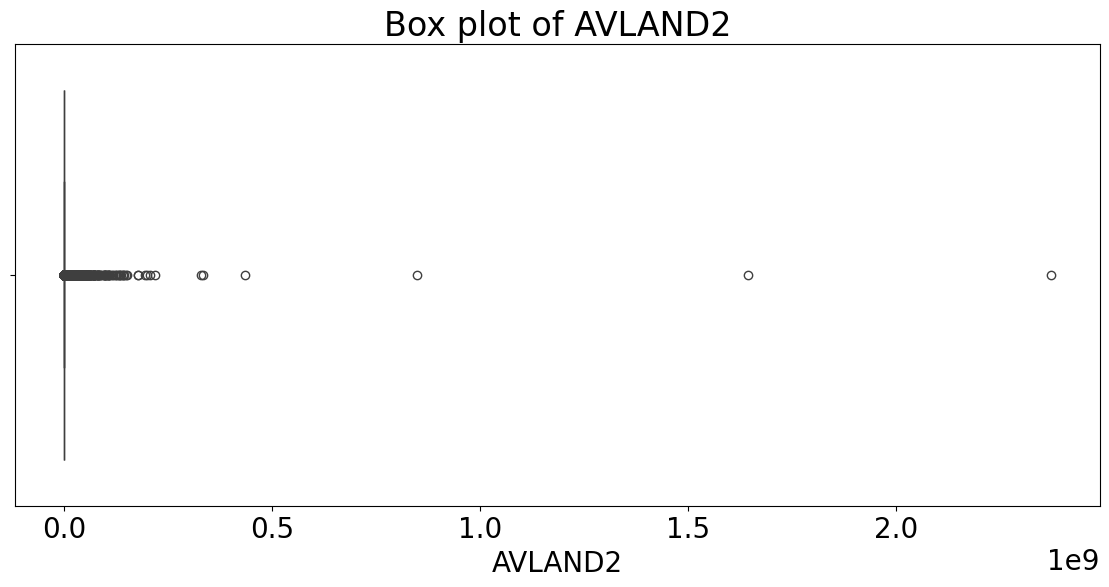

In [157]:
sns.boxplot(x = 'AVLAND2', data = data)

plt.xlabel('AVLAND2')
plt.title('Box plot of AVLAND2')

plt.show()

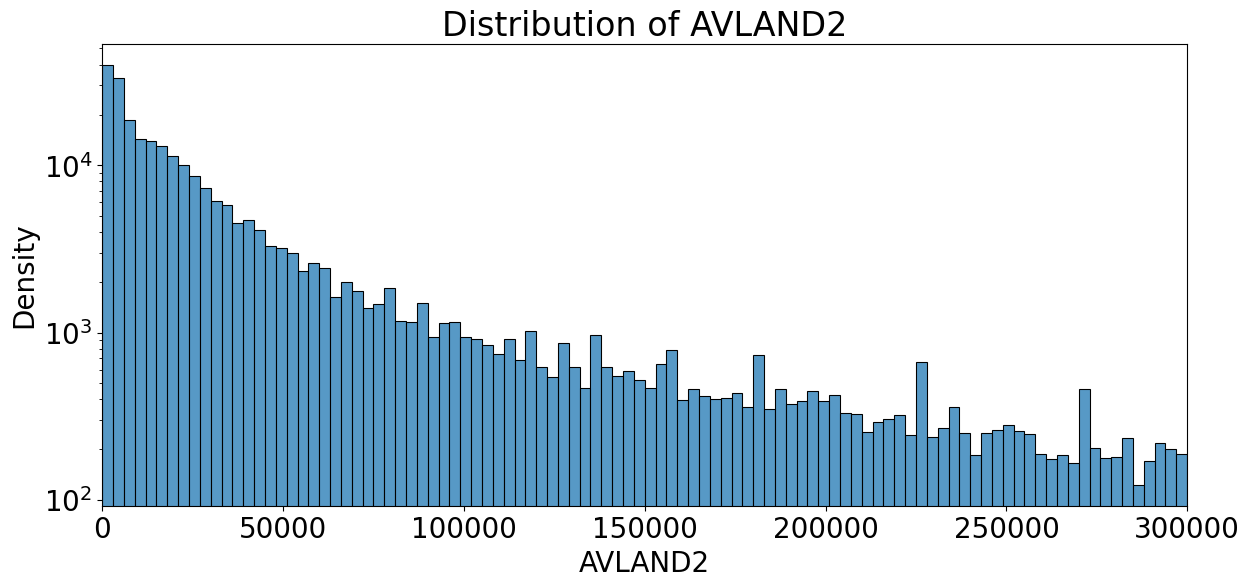

In [158]:
xhigh = 300000
plt.xlim(0,xhigh)
plt.yscale('log')
temp = data[data['AVLAND2'] <= xhigh]
sns.histplot(temp['AVLAND2'],bins = 100, kde = False)

plt.xlabel('AVLAND2')
plt.ylabel('Density')
plt.title('Distribution of AVLAND2')
plt.savefig('AVLAND2')

plt.show()

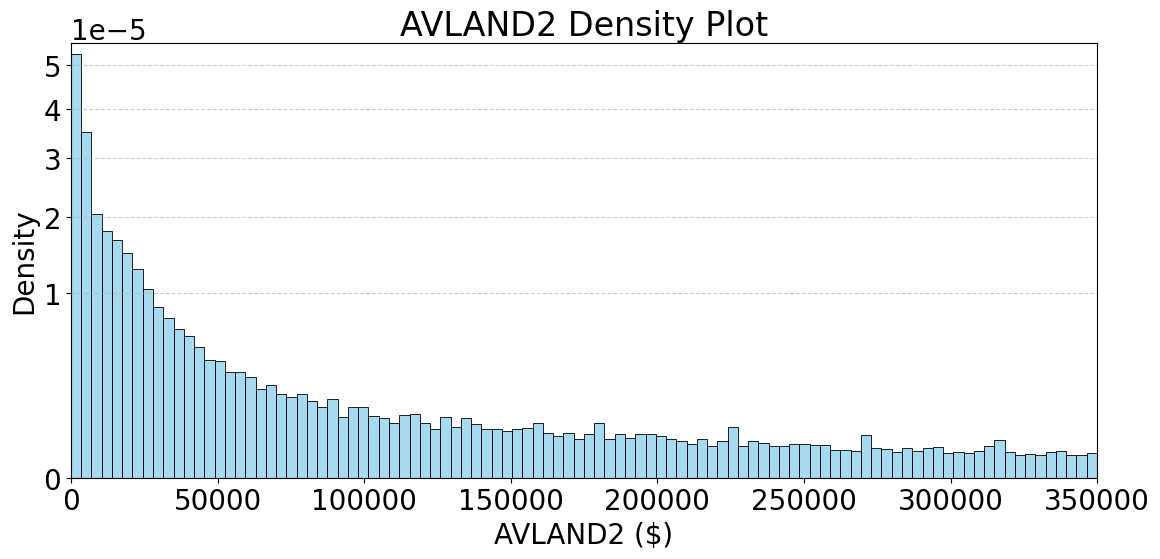

In [159]:
#nityaplot avland2
import matplotlib.pyplot as plt
import seaborn as sns


# Cap at 95th percentile
xhigh = 350_000  # Adjust this to match your quantile result
filtered_data = data[data['AVLAND2'] <= xhigh]

plt.figure(figsize=(12, 6))
sns.histplot(
    filtered_data['AVLAND2'],
    bins=100,
    stat='density',
    color='skyblue',
    edgecolor='black'
)

plt.yscale('function', functions=(np.sqrt, lambda x: x**2))  # Optional: sqrt scale for better balance
plt.xlim(0, xhigh)
plt.xlabel('AVLAND2 ($)')
plt.ylabel('Density')
plt.title('AVLAND2 Density Plot')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## AVTOT2

In [160]:
len(data['AVTOT2'].unique())

111361

In [161]:
data['AVTOT2'].count() * 100 / numrecords

26.399027445531907

In [162]:
data['AVTOT2'].value_counts()

AVTOT2
750.00        656
62.00         383
9468.00       233
9104.00       232
9349.00       225
             ... 
1138493.00      1
4016063.00      1
3907561.00      1
3973273.00      1
2550536.00      1
Name: count, Length: 111360, dtype: int64

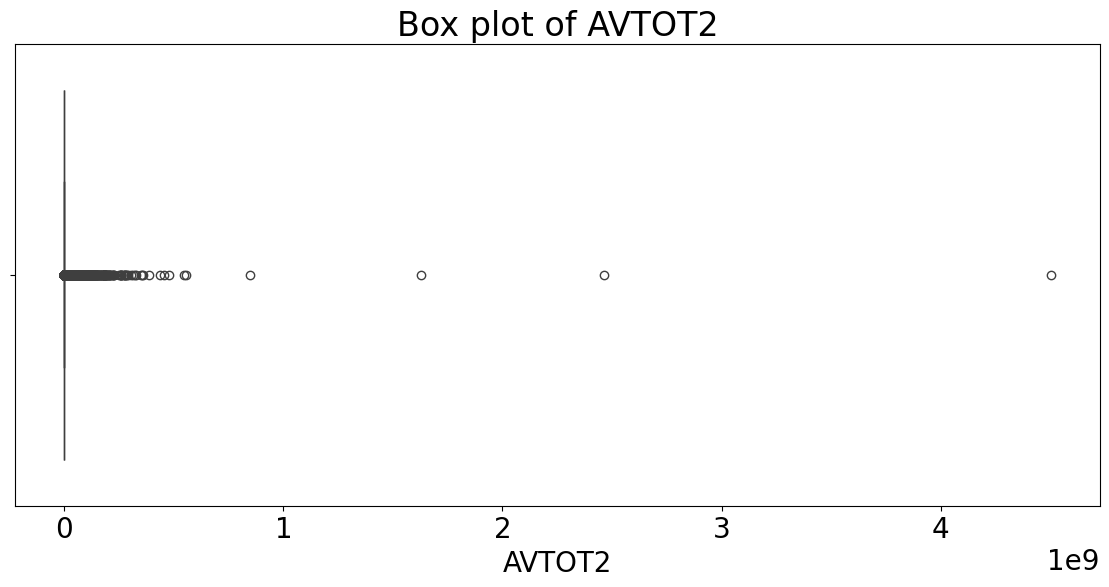

In [163]:
sns.boxplot(x = 'AVTOT2', data = data)

plt.xlabel('AVTOT2')
plt.title('Box plot of AVTOT2')

plt.show()

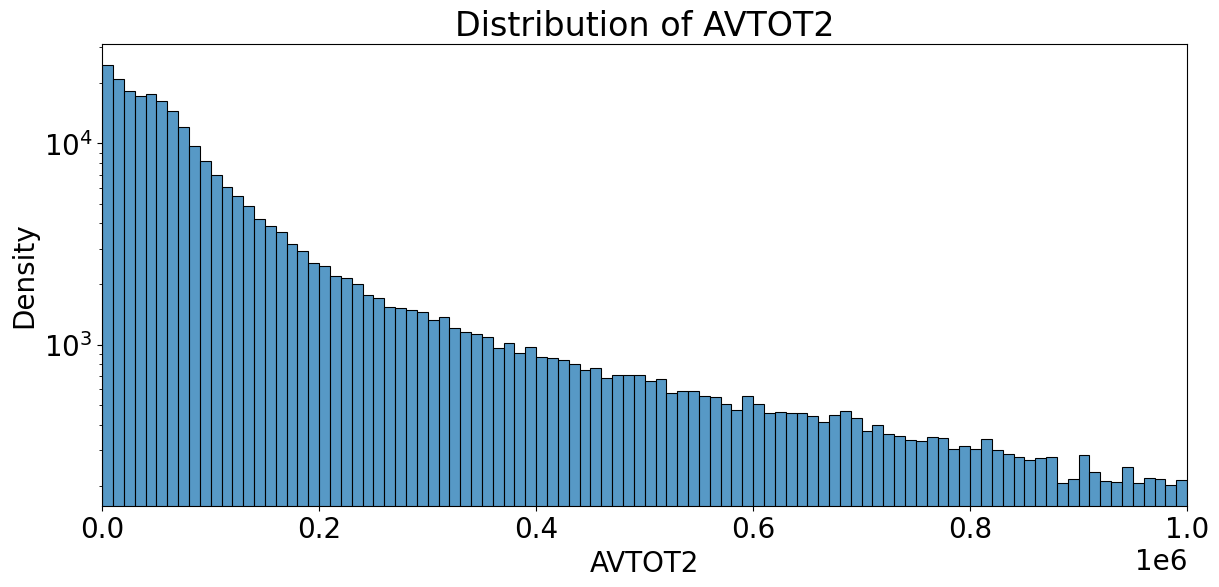

In [164]:
xhigh = 1000000
plt.xlim(0, xhigh)
plt.yscale('log')
temp = data[data['AVTOT2'] <= xhigh]
sns.histplot(temp['AVTOT2'],bins = 100, kde = False)

plt.xlabel('AVTOT2')
plt.ylabel('Density')
plt.title('Distribution of AVTOT2')
plt.savefig('AVTOT2')
plt.show()

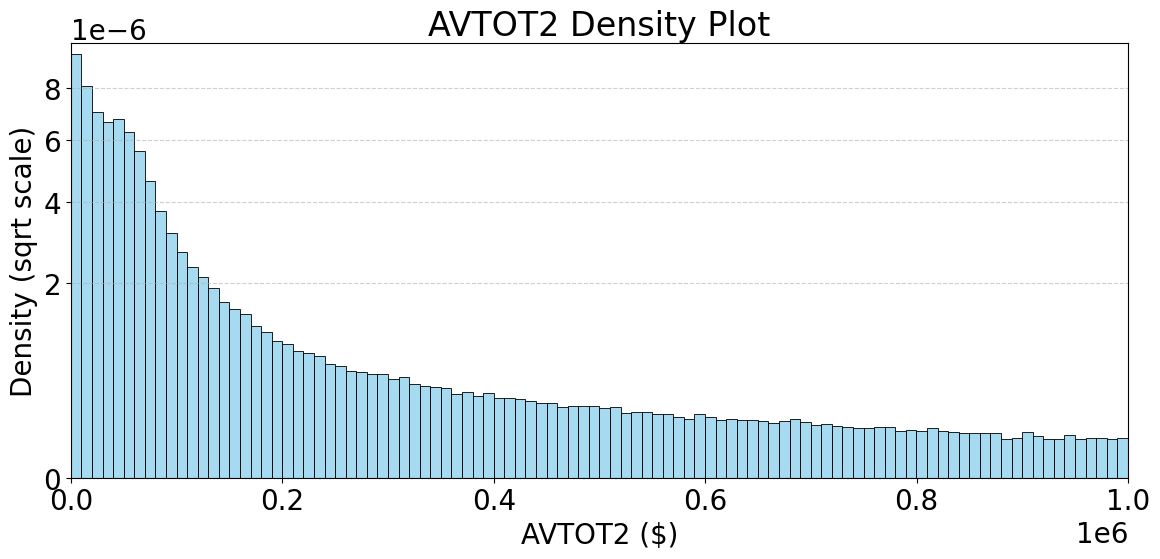

In [165]:
#nityaplot AVTOT2
import matplotlib.pyplot as plt
import seaborn as sns


# Cap at 95th percentile
xhigh = 1_000_000  # Adjust this to match your quantile result
filtered_data = data[data['AVTOT2'] <= xhigh]

plt.figure(figsize=(12, 6))
sns.histplot(
    filtered_data['AVTOT2'],
    bins=100,
    stat='density',
    color='skyblue',
    edgecolor='black'
)

plt.yscale('function', functions=(np.sqrt, lambda x: x**2))  # Optional: sqrt scale for better balance
plt.xlim(0, xhigh)
plt.xlabel('AVTOT2 ($)')
plt.ylabel('Density (sqrt scale)')
plt.title('AVTOT2 Density Plot')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## EXLAND2

In [166]:
len(data['EXLAND2'].unique())

22196

In [167]:
data['EXLAND2'].count() * 100 / numrecords

8.165218479281863

In [168]:
data['EXLAND2'].value_counts()

EXLAND2
2090.00     26393
4180.00       734
2650.00       393
62.00         387
62640.00      193
            ...  
36474.00        1
86192.00        1
70875.00        1
12992.00        1
24996.00        1
Name: count, Length: 22195, dtype: int64

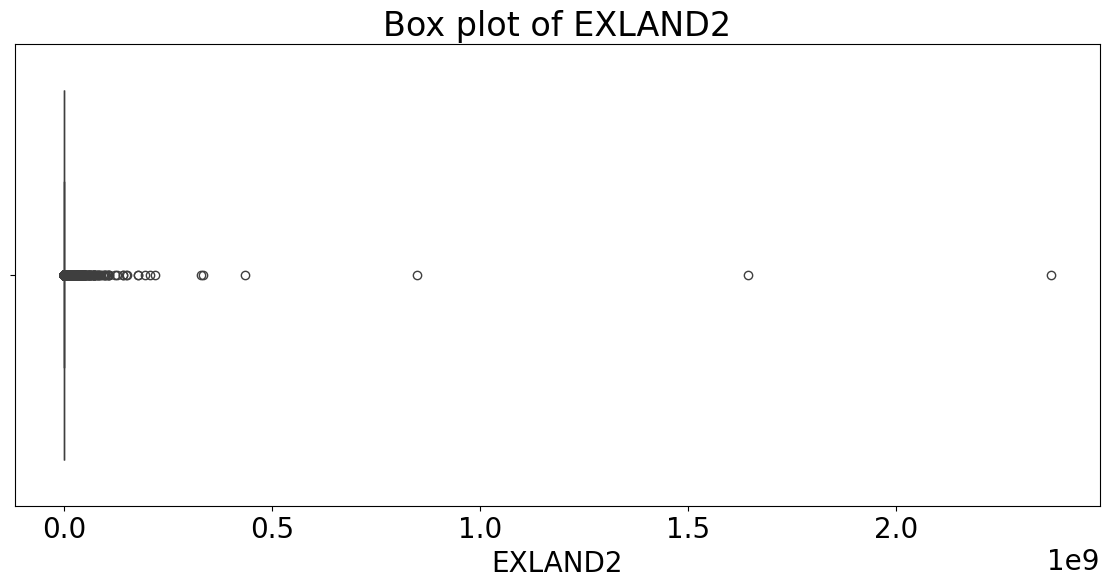

In [169]:
sns.boxplot(x = 'EXLAND2', data = data)

plt.xlabel('EXLAND2')
plt.title('Box plot of EXLAND2')

plt.show()

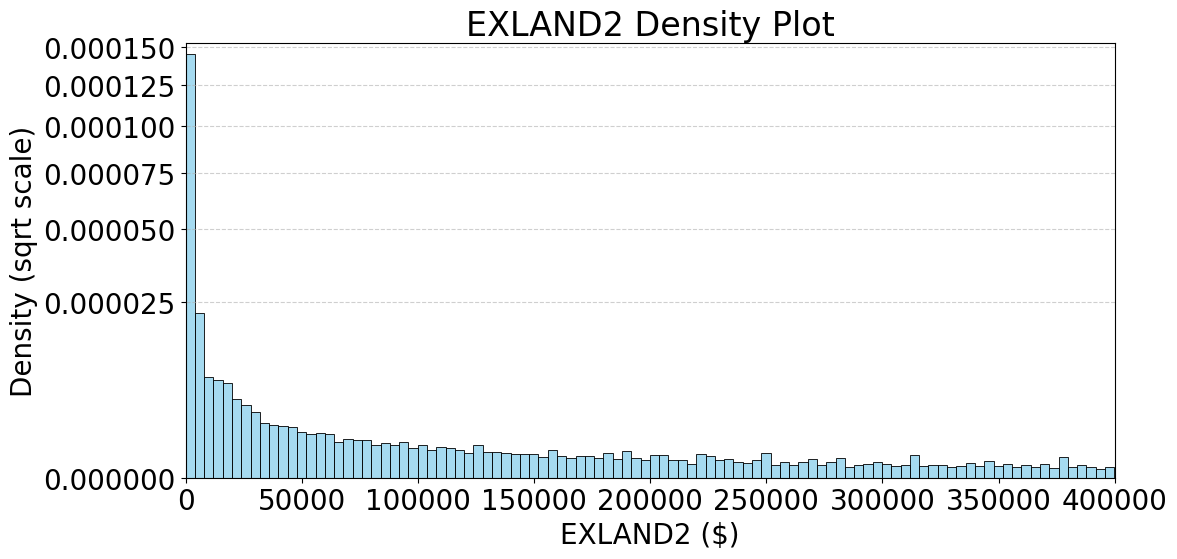

In [170]:
#nitya plot exland2

import matplotlib.pyplot as plt
import seaborn as sns

xhigh = 400_000
filtered_data = data[data['EXLAND2'] <= xhigh]

plt.figure(figsize=(12, 6))
sns.histplot(
    filtered_data['EXLAND2'],
    bins=100,
    stat='density',
    color='skyblue',
    edgecolor='black'
)

plt.yscale('function', functions=(np.sqrt, lambda x: x**2))  # Optional: sqrt scale for better balance
#plt.yscale('log')  # Optional: log scale for long tails

plt.xlim(0, xhigh)
plt.xlabel('EXLAND2 ($)')
plt.ylabel('Density (sqrt scale)')
plt.title('EXLAND2 Density Plot')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


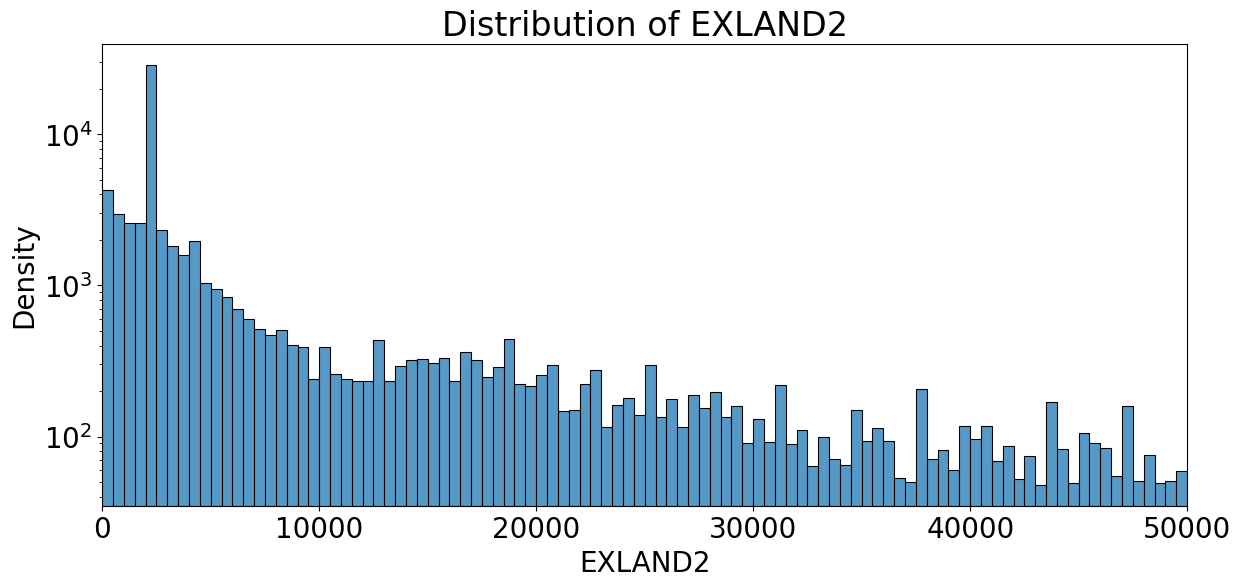

In [171]:
xhigh = 50000
plt.xlim(0, xhigh)
temp = data[data['EXLAND2'] <= xhigh]
sns.histplot(temp['EXLAND2'],bins = 100, kde = False)
plt.yscale('log')

plt.xlabel('EXLAND2')
plt.ylabel('Density')
plt.title('Distribution of EXLAND2')
plt.savefig('EXLAND2')

plt.show()

## EXTOT2

In [172]:
len(data['EXTOT2'].unique())

48349

In [173]:
data['EXTOT2'].count() * 100 / numrecords

12.215567967701032

In [174]:
data['EXTOT2'].value_counts()

EXTOT2
2090.00      24739
4180.00        911
2650.00        438
62.00          382
2850.00        375
             ...  
776350.00        1
276102.00        1
168724.00        1
453060.00        1
439611.00        1
Name: count, Length: 48348, dtype: int64

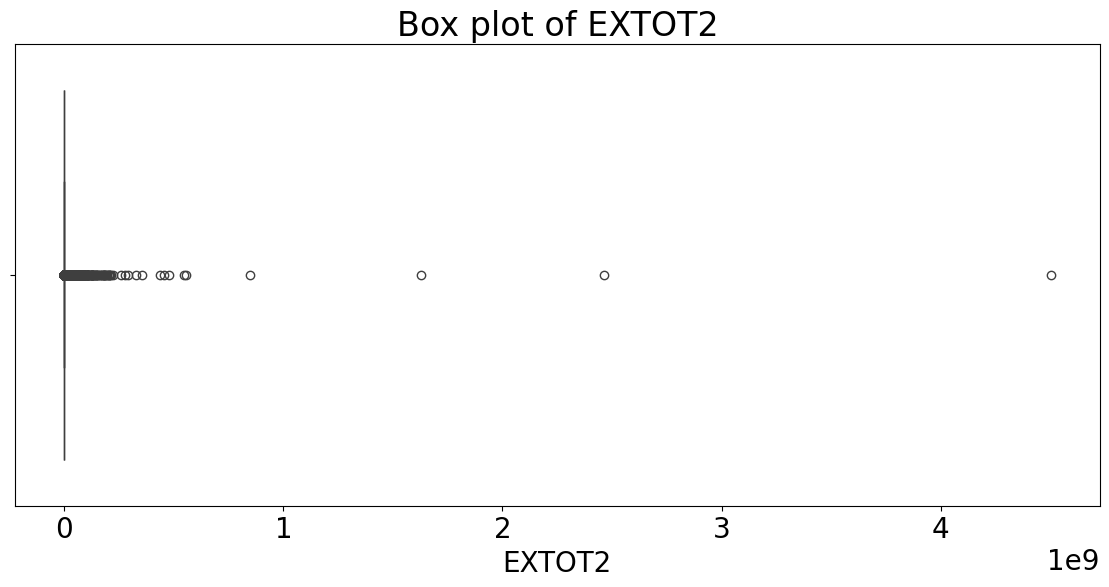

In [175]:
sns.boxplot(x = 'EXTOT2', data = data)

plt.xlabel('EXTOT2')
plt.title('Box plot of EXTOT2')

plt.show()

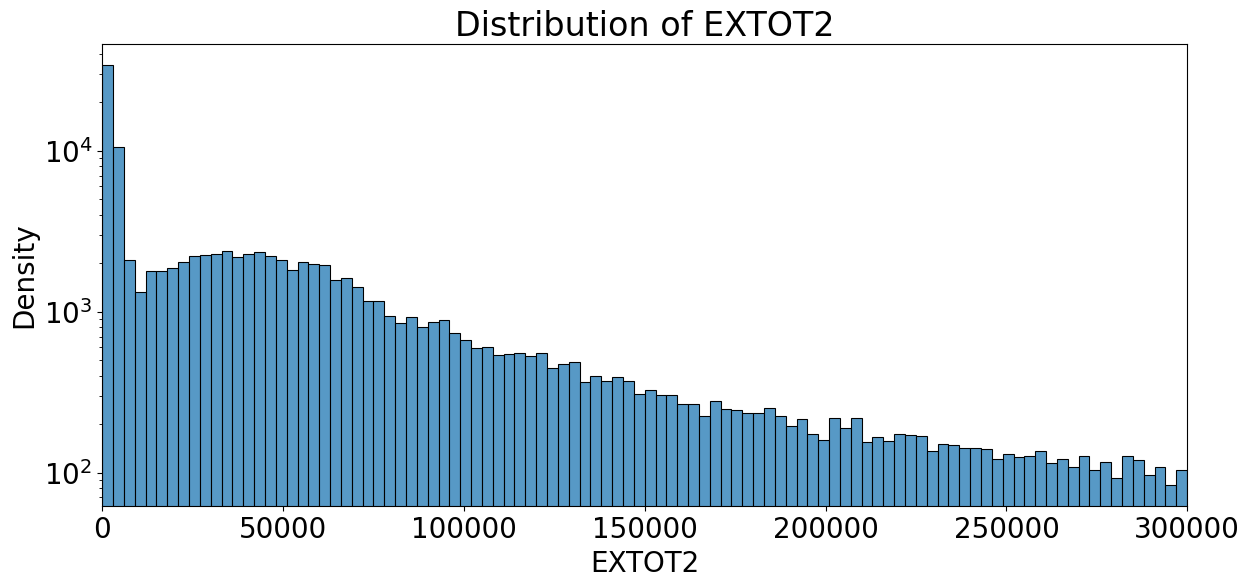

In [176]:
xhigh = 300000
plt.xlim(0, xhigh)
temp = data[data['EXTOT2'] <= xhigh]
sns.histplot(temp['EXTOT2'],bins = 100, kde = False)
plt.yscale('log')

plt.xlabel('EXTOT2')
plt.ylabel('Density')
plt.title('Distribution of EXTOT2')
plt.savefig('EXTOT2')
plt.show()

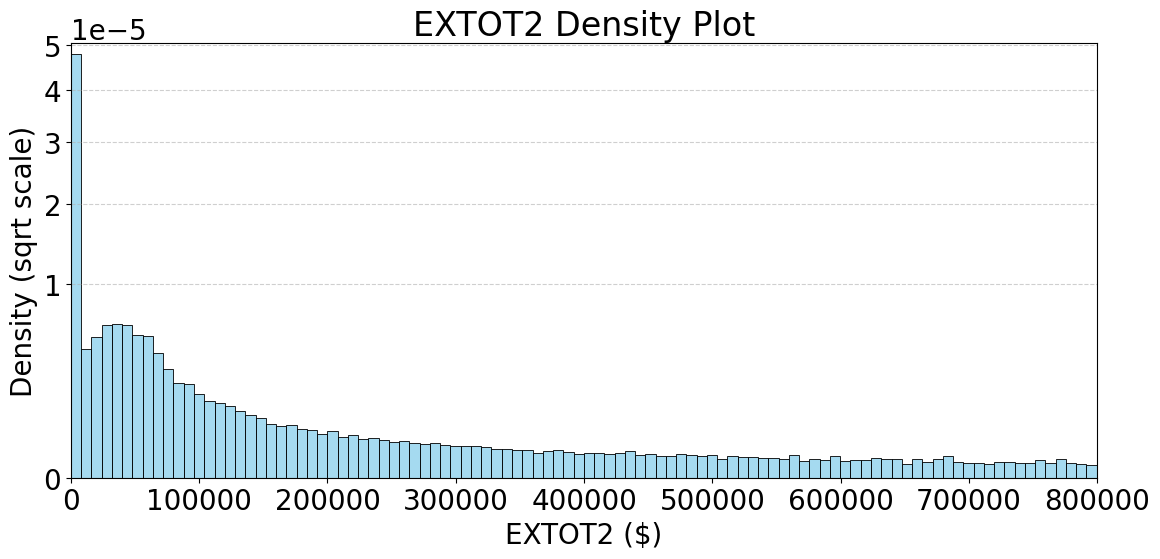

In [177]:
xhigh = 800_000
filtered_data = data[data['EXTOT2'] <= xhigh]

plt.figure(figsize=(12, 6))
sns.histplot(
    filtered_data['EXTOT2'],
    bins=100,
    stat='density',
    color='skyblue',
    edgecolor='black'
)

plt.yscale('function', functions=(np.sqrt, lambda x: x**2))  # Optional: sqrt scale for better balance
plt.xlim(0, xhigh)
plt.xlabel('EXTOT2 ($)')
plt.ylabel('Density (sqrt scale)')
plt.title('EXTOT2 Density Plot')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## EXCD2

In [178]:
len(data['EXCD2'].unique())

61

In [179]:
data['EXCD2'].count() * 100 / numrecords

8.678666733893934

In [180]:
data['EXCD2'].value_counts()

EXCD2
1017.00    65777
1015.00    12337
5112.00     6867
1019.00     3178
1920.00     2961
1200.00      881
1101.00      494
5129.00      227
1986.00       35
1022.00       31
1985.00       21
1604.00       13
5109.00       11
1021.00        8
2280.00        7
1523.00        7
7160.00        7
5114.00        6
5111.00        6
2310.00        6
5113.00        6
2152.00        4
5130.00        3
1504.00        3
5110.00        3
3390.00        3
1023.00        3
1501.00        3
1603.00        2
1521.00        2
2500.00        2
5104.00        2
1404.00        2
1602.00        2
1850.00        2
1605.00        2
5108.00        1
3410.00        1
6800.00        1
5116.00        1
2151.00        1
1401.00        1
1505.00        1
2132.00        1
2202.00        1
2201.00        1
2231.00        1
1522.00        1
5101.00        1
2262.00        1
1891.00        1
1102.00        1
2134.00        1
1402.00        1
2350.00        1
1011.00        1
4500.00        1
1930.00        1
2232.00 

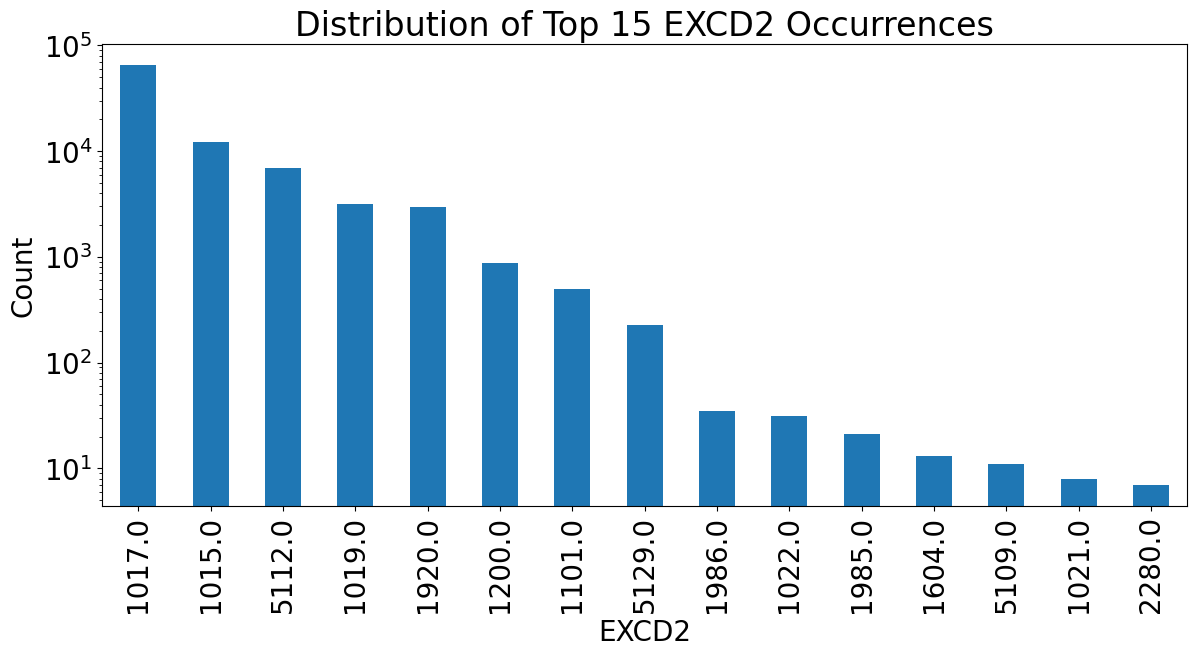

In [181]:
data['EXCD2'].value_counts().head(15).plot(kind = 'bar')
# plt.xticks(rotation = 0)
plt.yscale('log')

plt.xlabel('EXCD2')
plt.ylabel('Count')
plt.title('Distribution of Top 15 EXCD2 Occurrences')

plt.savefig('plot')

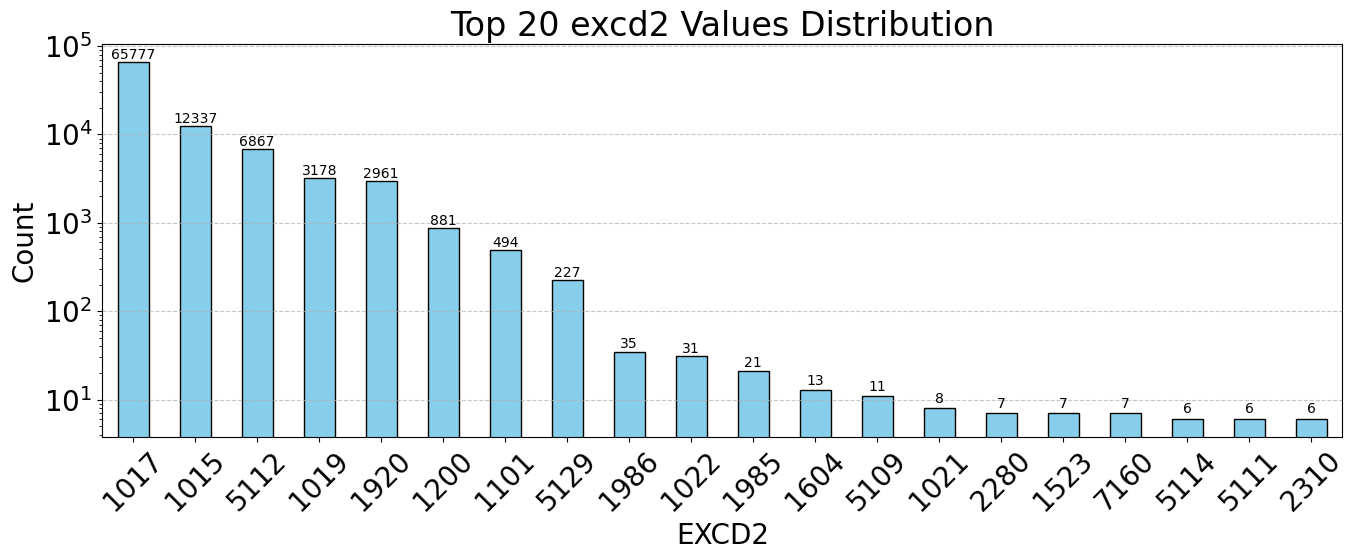

In [212]:
top_20_excd2 = data['EXCD2'].value_counts().head(20)

# Plot
ax = top_20_excd2.plot(kind='bar', color='skyblue', edgecolor='black')

# Add count labels
for i, v in enumerate(top_20_excd2):
    ax.text(i, v + 0.5, str(int(round(v))), ha='center', va='bottom', fontsize=10)

# Fix x-tick labels to show actual excd2 codes
ax.set_xticklabels(top_20_excd2.index.astype(int), rotation=45)

# Log scale and other formatting
plt.yscale('log')
plt.xlabel('EXCD2')
plt.ylabel('Count')
plt.title('Top 20 excd2 Values Distribution')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


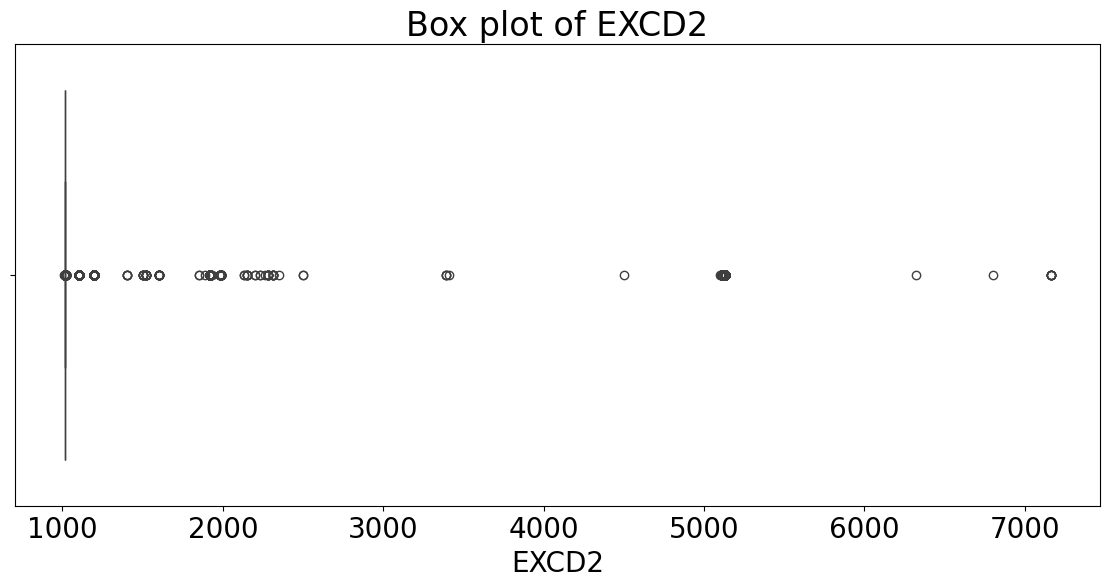

In [182]:
sns.boxplot(x = 'EXCD2', data = data)

plt.xlabel('EXCD2')
plt.title('Box plot of EXCD2')

plt.show()

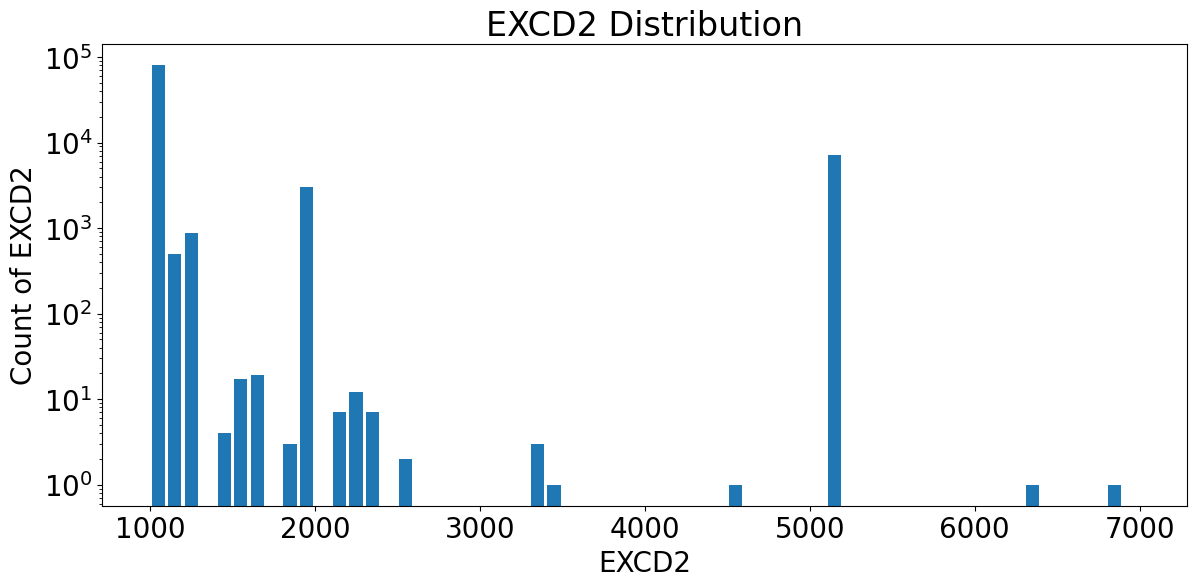

In [183]:
# plotting a histogram
range = (1000, 7000)
bins = 60

plt.hist(data['EXCD2'], bins, range, histtype = 'bar', rwidth = 0.8)

plt.yscale('log')
plt.xlabel('EXCD2')
plt.ylabel('Count of EXCD2')
plt.title('EXCD2 Distribution')
plt.savefig('EXCD2')

plt.savefig('plot')


## PERIOD

In [184]:
len(data['PERIOD'].unique())

1

In [185]:
data['PERIOD'].count() * 100 / numrecords

100.0

In [186]:
data['PERIOD'].value_counts()

PERIOD
FINAL    1070994
Name: count, dtype: int64

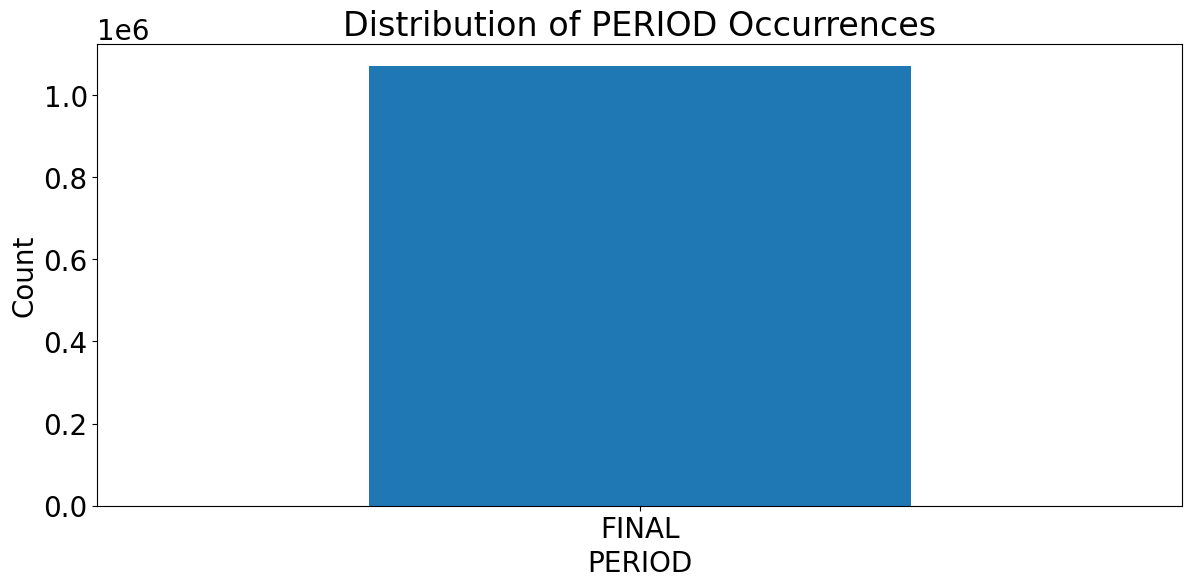

In [187]:
data['PERIOD'].value_counts().plot(kind = 'bar')
plt.xticks(rotation = 0)
# plt.yscale('log')

plt.xlabel('PERIOD')
plt.ylabel('Count')
plt.title('Distribution of PERIOD Occurrences')

plt.savefig('plot')

## YEAR

In [188]:
len(data['YEAR'].unique())

1

In [189]:
data['YEAR'].count() * 100 / numrecords

100.0

In [190]:
data['YEAR'].value_counts()

YEAR
2010/11    1070994
Name: count, dtype: int64

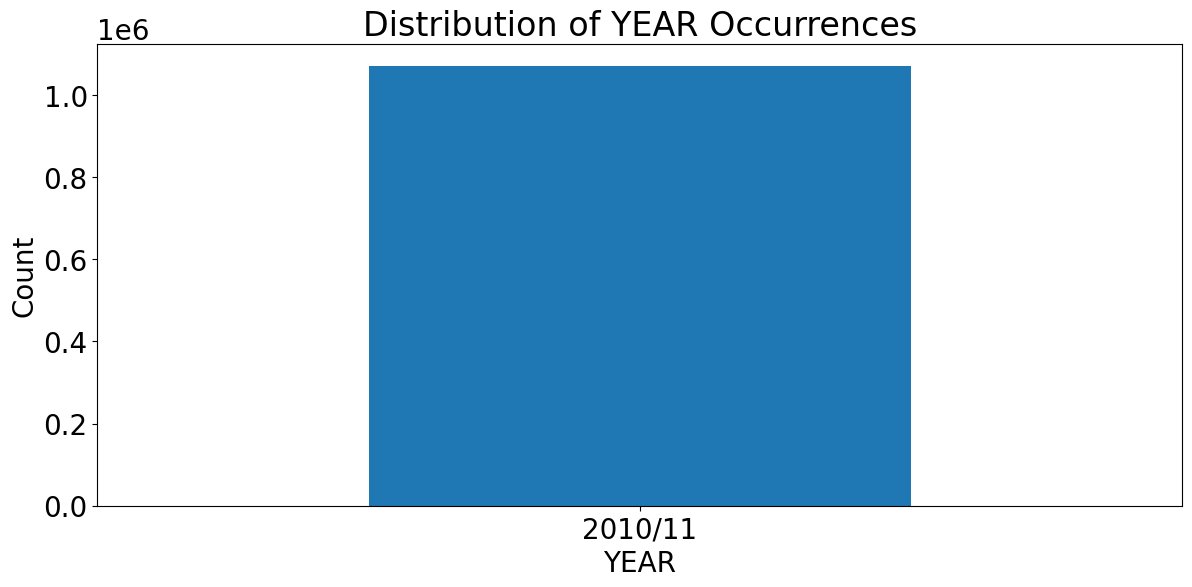

In [191]:
data['YEAR'].value_counts().plot(kind = 'bar')
plt.xticks(rotation = 0)
# plt.yscale('log')

plt.xlabel('YEAR')
plt.ylabel('Count')
plt.title('Distribution of YEAR Occurrences')

plt.savefig('plot')

## VALTYPE

In [192]:
len(data['VALTYPE'].unique())

1

In [193]:
data['VALTYPE'].count() * 100 / numrecords

100.0

In [194]:
data['VALTYPE'].value_counts()

VALTYPE
AC-TR    1070994
Name: count, dtype: int64

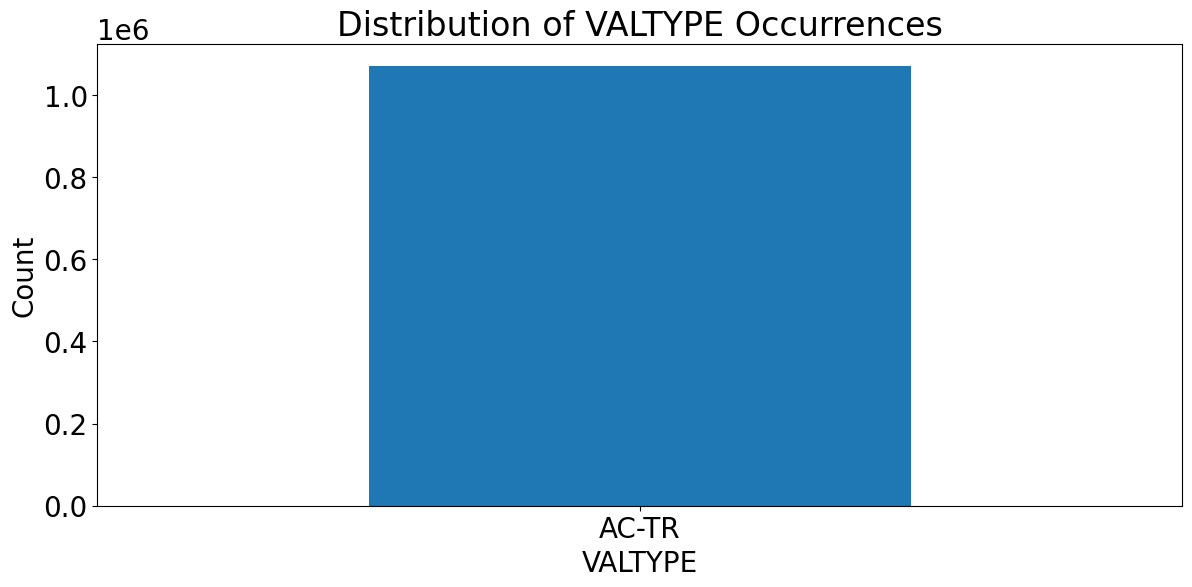

In [195]:
data['VALTYPE'].value_counts().plot(kind = 'bar')
plt.xticks(rotation = 0)
# plt.yscale('log')

plt.xlabel('VALTYPE')
plt.ylabel('Count')
plt.title('Distribution of VALTYPE Occurrences')

plt.savefig('plot')

In [196]:
print('duration: ', dt.datetime.now() - start_time)

duration:  0:02:18.154653
